# Ultrasonic Exploratory Data Analysis with Delay Sequence

This notebook will be exploring data from sensor using the version 2 platform.

The data collection procedure was as following



# Load Data

In [62]:
import os
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [63]:
def get_all_files_in_directory(root_directory):
    file_paths = []
    for root, dirs, files in os.walk(root_directory):
        for file in files:
            file_paths.append(os.path.join(root, file))
    return file_paths

In [64]:
# Define the folder path
folder_path = '../ultra_sonic_sensor/fully_automate/data_v4.1.1'
file_paths = get_all_files_in_directory(folder_path)

In [65]:
def merge_csv_files(file_paths):
    """
    Merge multiple CSV files into a single DataFrame.

    Parameters:
    file_paths (list of str): List of file paths to the CSV files.

    Returns:
    DataFrame: Merged DataFrame containing data from all input CSV files.
    """
    dataframes = []
    for file in file_paths:
        df = pd.read_csv(file)
        dataframes.append(df)

    # Concatenate all DataFrames
    merged_df = pd.concat(dataframes, ignore_index=True)
    
    return merged_df

In [66]:
# Merge CSV files
merged_df = merge_csv_files(file_paths)
merged_df

Trial  Ping Duration  Distance (cm)  Ping Time (us)  Delay (us)  \
0          0           1680          13.39             763       16800   
1          1           1664          13.46             767       16800   
2          2           1672          13.46             767       16800   
3          3           1664          13.39             763       16800   
4          4           1664          13.46             767       16800   
...      ...            ...            ...             ...         ...   
87676     45           6580          53.60            3055        3000   
87677     46           6604          54.02            3079        3000   
87678     47           6552          53.18            3031        3000   
87679     48           6552          53.25            3035        3000   
87680     49           6576          53.67            3059        3000   

         Steps  Arduino ID  Sensor ID  Range (cm)  Sensor length (cm)  ...  \
0      12576.0           1         32          13                 0.8  ...   
1      12576.0           1         32          13                 0.8  ...   
2      12576.0           1         32          13                 0.8  ...   
3      12576.0           1         32          13                 0.8  ...   
4      12576.0           1         32          13                 0.8  ...   
...        ...         ...        ...         ...                 ...  ...   
87676      0.0           1         50          53                 0.8  ...   
87677      0.0           1         50          53                 0.8  ...   
87678      0.0           1         50          53                 0.8  ...   
87679      0.0           1         50          53                 0.8  ...   
87680      0.0           1         50          53                 0.8  ...   

      Angle on XY plane  side a (cm)  side b (cm)  side c (cm)  \
0                     0         18.3         18.3            0   
1                     0         18.3         18.3            0   
2                     0         18.3         18.3            0   
3                     0         18.3         18.3            0   
4                     0         18.3         18.3            0   
...                 ...          ...          ...          ...   
87676                 0         18.3         18.3            0   
87677                 0         18.3         18.3            0   
87678                 0         18.3         18.3            0   
87679                 0         18.3         18.3            0   
87680                 0         18.3         18.3            0   

       Angle on YZ plane  Sensor Configuration Sensor Angle  Surface material  \
0                      0                   HTR           90              wood   
1                      0                   HTR           90              wood   
2                      0                   HTR           90              wood   
3                      0                   HTR           90              wood   
4                      0                   HTR           90              wood   
...                  ...                   ...          ...               ...   
87676                  0                   HTR           90              wood   
87677                  0                   HTR           90              wood   
87678                  0                   HTR           90              wood   
87679                  0                   HTR           90              wood   
87680                  0                   HTR           90              wood   

      Surface Length (cm)  Surface Width (cm)  
0                      31                30.5  
1                      31                30.5  
2                      31                30.5  
3                      31                30.5  
4                      31                30.5  
...                   ...                 ...  
87676                  31                30.5  
87677                  31      

In [67]:
merged_df.columns

Index(['Trial', 'Ping Duration', 'Distance (cm)', 'Ping Time (us)',
       'Delay (us)', 'Steps', 'Arduino ID', 'Sensor ID', 'Range (cm)',
       'Sensor length (cm)', 'Color of sensor', 'Angle on XY plane',
       'side a (cm)', 'side b (cm)', 'side c (cm)', 'Angle on YZ plane',
       'Sensor Configuration', 'Sensor Angle', 'Surface material',
       'Surface Length (cm)', 'Surface Width (cm)'],
      dtype='object')

### Investigate Null

In [68]:
# Step 1: Check for NaNs
nan_columns = merged_df.isnull().any()

# Step 2: Filter Columns with NaNs
columns_with_nans = nan_columns[nan_columns].index.tolist()

# Print the result
print("Columns with NaNs:", columns_with_nans)

Columns with NaNs: ['Color of sensor']


Investigate Manually Inputted Datas

In [69]:
merged_df["Sensor ID"].unique()

array([32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48,
       49, 50], dtype=int64)

In [70]:
merged_df["Range (cm)"].unique()

array([13, 18, 23, 28, 33, 38, 43, 48, 53], dtype=int64)

In [71]:
merged_df["Color of sensor"].unique()

array(['b', 'B', 'g', nan], dtype=object)

In [72]:
print(merged_df[merged_df["Color of sensor"] == "b" ]["Sensor ID"].unique())
print(merged_df[merged_df["Color of sensor"] == "B" ]["Sensor ID"].unique())
print(merged_df[(merged_df["Color of sensor"] != "b") & (merged_df["Color of sensor"] != "B")& (merged_df["Color of sensor"] != "g")]["Sensor ID"].unique())

[32 33 34 35 36 37 38 39 40 41 42 43 44 45 46 47 48 49 50]
[34]
[46]


In [73]:
merged_df[merged_df["Color of sensor"] == "B" ]["Range (cm)"].unique()

array([13, 18, 23, 28, 33, 38, 43, 48], dtype=int64)

Deal with NaNs

In [75]:
# Step 1: Identify Columns with NaNs
nan_columns = merged_df.columns[merged_df.isnull().any()]

# Step 2: Find Mode and Replace NaNs
for col in nan_columns:
    if merged_df[col].dtype == object:  # Check if the column is categorical
        mode_value = merged_df[col].mode()[0]  # Find the mode value (most frequent value)\
        merged_df[col].fillna(mode_value, inplace=True)  # Replace NaNs with the mode value


print(merged_df[(merged_df["Color of sensor"] != "b") & (merged_df["Color of sensor"] != "B")& (merged_df["Color of sensor"] != "g")]["Sensor ID"].unique())

[]


In [77]:
merged_df["Color of sensor"] = merged_df["Color of sensor"].str.lower()
merged_df["Color of sensor"].unique()

array(['b', 'g'], dtype=object)

This time we will only keeping delay of 16800,10000,8000,6000,3000

In [128]:
values_to_keep = [16800,10000,8000,6000,3000]
cleaned_df = merged_df[merged_df["Delay (us)"].isin(values_to_keep)]

In [129]:
cleaned_df["Delay (us)"].unique()

array([16800, 10000,  8000,  6000,  3000], dtype=int64)

# Visual analysis on effect of delay and range on Ping Time 

### Visualization by Range

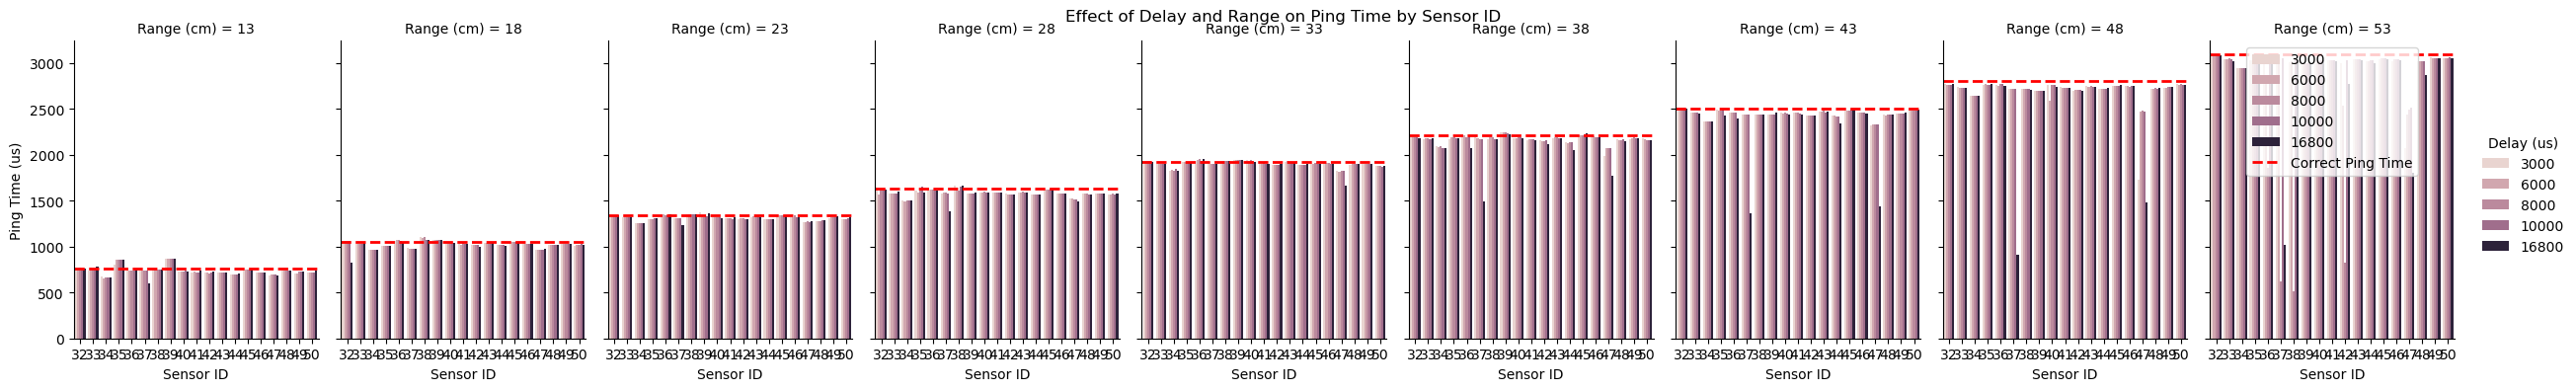

In [130]:
# Function to visualize the effect of delay and range on ping time
def visualize_delay_and_range_effect_on_ping_time_one(df):
    """
    Visualize the effect of delay and range on ping time.

    Parameters:
    df (DataFrame): The DataFrame containing the data.
    """
    
    # Group by sensor ID, delay, and range, then calculate the mean ping time
    grouped_df = df.groupby(['Sensor ID', 'Delay (us)', 'Range (cm)'])['Ping Time (us)'].mean().reset_index()
    
    # Create the visualization
    g = sns.catplot(
        x='Sensor ID', 
        y='Ping Time (us)', 
        hue='Delay (us)', 
        col='Range (cm)', 
        data=grouped_df, 
        kind='bar', 
        height=4, 
        aspect=0.7
    )
    
    # Add horizontal lines for correct ping times based on range
    for ax in g.axes.flatten():
        range_val = float(ax.get_title().split('=')[1].strip())
        correct_ping_time = (2 * range_val / 100) / 343 * 1e6
        ax.axhline(correct_ping_time, color='red', linestyle='--', linewidth=2, label='Correct Ping Time')
    
    plt.subplots_adjust(top=0.9)
    plt.suptitle('Effect of Delay and Range on Ping Time by Sensor ID')
    plt.legend()
    plt.show()


# Visualize the effect of delay and range on ping time
visualize_delay_and_range_effect_on_ping_time_one(cleaned_df)


we can see there are notable outliers present for each sensor in particular ranges. Most notable thing from this graph is sensor 4 where sometime it gives over and under measurement while it is on delay 16800. Later will be printing bigger graph to investigate this further. 

So far there are some distinct characteristics been catured and this will later be captured through machine learning method for characterization. 

In [131]:
# Function to visualize the effect of delay and range on ping time
def visualize_delay_and_range_effect_on_ping_time(df, target = 0):
    """
    Visualize the effect of delay and range on ping time.

    Parameters:
    df (DataFrame): The DataFrame containing the data.
    """
    # Group by sensor ID, delay, and range, then calculate the mean ping time
    grouped_df = df.groupby(['Sensor ID', 'Delay (us)', 'Range (cm)'])['Ping Time (us)'].mean().reset_index()
    # Create individual plots for each range
    unique_ranges = grouped_df['Range (cm)'].unique()
    
    if target == 0:
        for range_val in unique_ranges:
            subset_df = grouped_df[grouped_df['Range (cm)'] == range_val]
            plt.figure(figsize=(14, 10))
            sns.barplot(
                x='Sensor ID', 
                y='Ping Time (us)', 
                hue='Delay (us)', 
                data=subset_df
            )
            
            correct_ping_time = (2 * range_val / 100) / 343 * 1e6
            plt.axhline(correct_ping_time, color='red', linestyle='--', linewidth=2, label='Correct Ping Time')
            
            plt.title(f'Effect of Delay on Ping Time by Sensor ID for Range {range_val} cm')
            plt.xlabel('Sensor ID')
            plt.ylabel('Mean Ping Time (us)')
            plt.legend(title='Delay (us)')
            plt.xticks(rotation=45)
            # Adjust y-axis limits and ticks for better precision
            min_ping_time = subset_df['Ping Time (us)'].min()
            max_ping_time = subset_df['Ping Time (us)'].max()
            plt.ylim(min_ping_time - 50, max_ping_time + 50)  # Adjust the limits as needed
            plt.yticks(range(int(min_ping_time) - 50, int(max_ping_time) + 50, 50))  # Adjust the step as needed
            plt.show()
    else:
        if target in unique_ranges:
            subset_df = grouped_df[grouped_df['Range (cm)'] == target]
            plt.figure(figsize=(14, 10))
            sns.barplot(
                x='Sensor ID', 
                y='Ping Time (us)', 
                hue='Delay (us)', 
                data=subset_df
            )
            
            correct_ping_time = (2 * target / 100) / 343 * 1e6
            plt.axhline(correct_ping_time, color='red', linestyle='--', linewidth=2, label='Correct Ping Time')
            
            plt.title(f'Effect of Delay on Ping Time by Sensor ID for Range {target} cm')
            plt.xlabel('Sensor ID')
            plt.ylabel('Mean Ping Time (us)')
            plt.legend(title='Delay (us)')
            plt.xticks(rotation=45)
            # Adjust y-axis limits and ticks for better precision
            min_ping_time = subset_df['Ping Time (us)'].min()
            max_ping_time = subset_df['Ping Time (us)'].max()
            plt.ylim(min_ping_time - 50, max_ping_time + 50)  # Adjust the limits as needed
            plt.yticks(range(int(min_ping_time) - 50, int(max_ping_time) + 50, 50))  # Adjust the step as needed
            plt.show()

This function will be generating graph in bigger scale for better analysis.

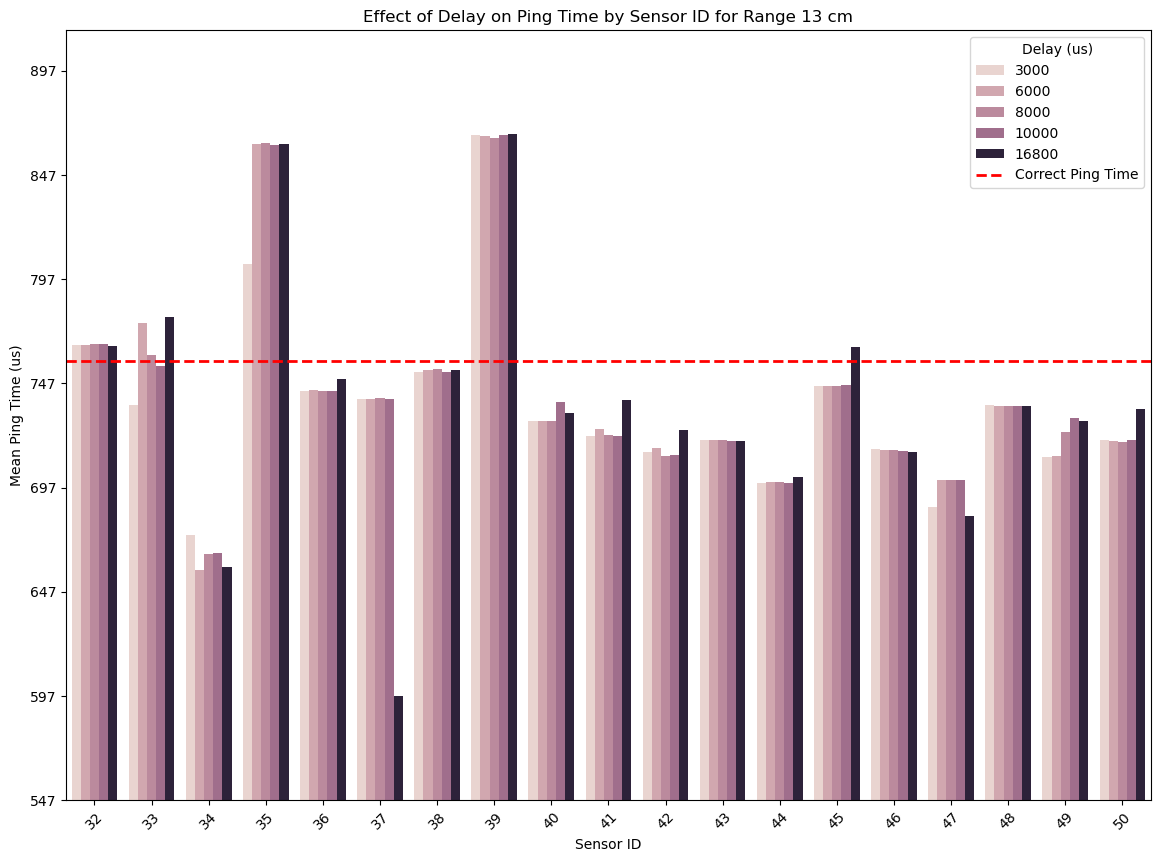

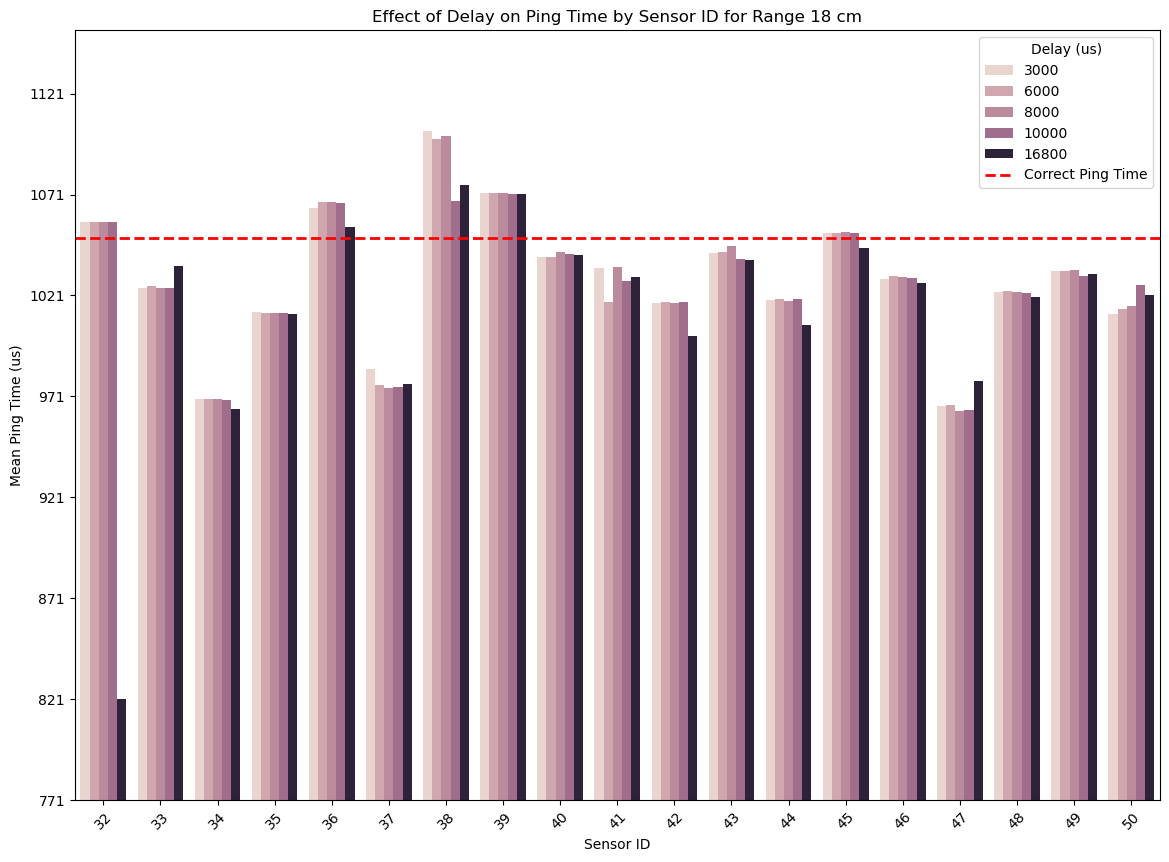

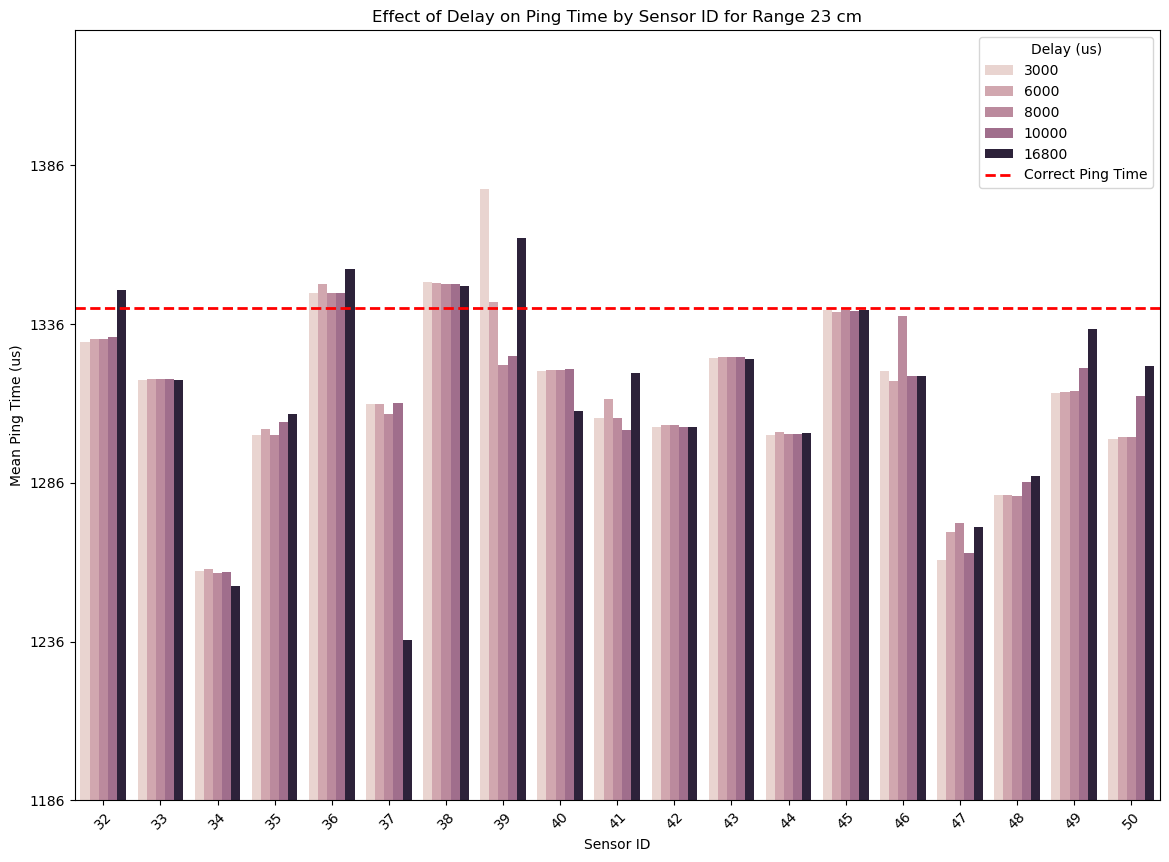

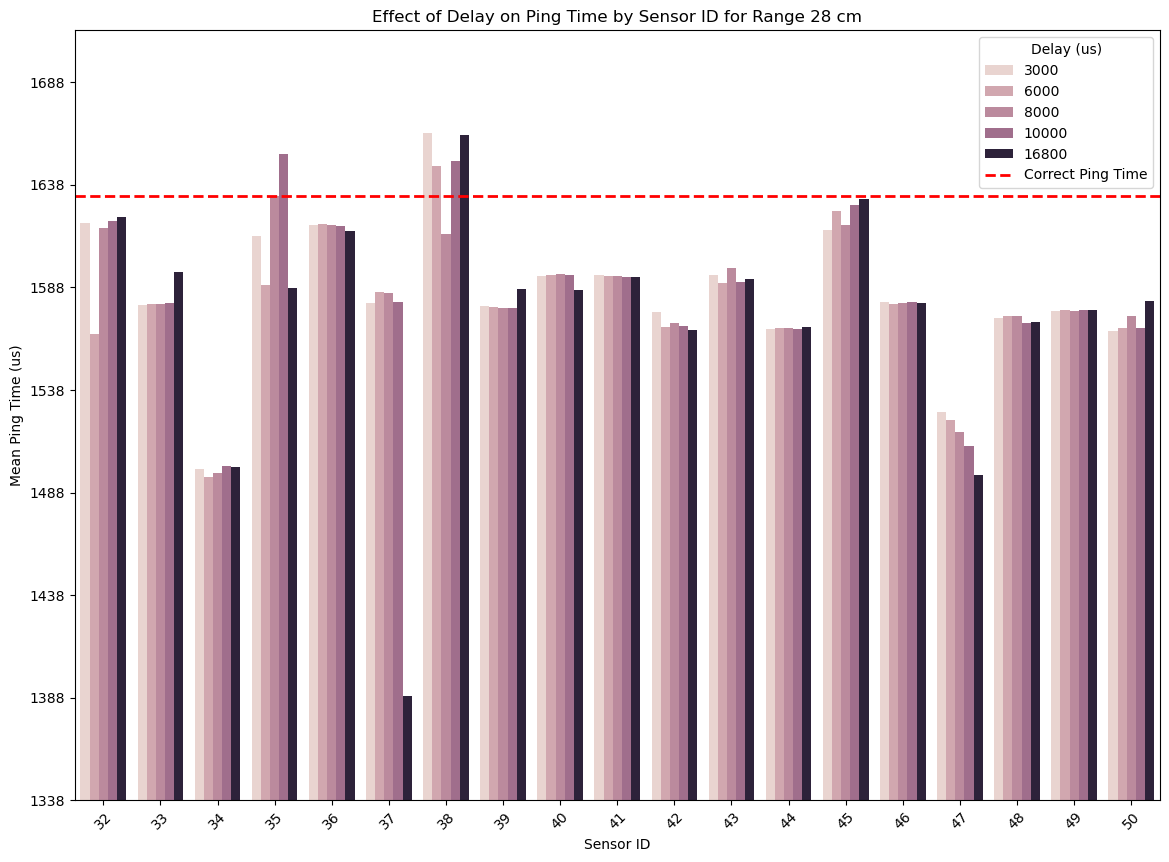

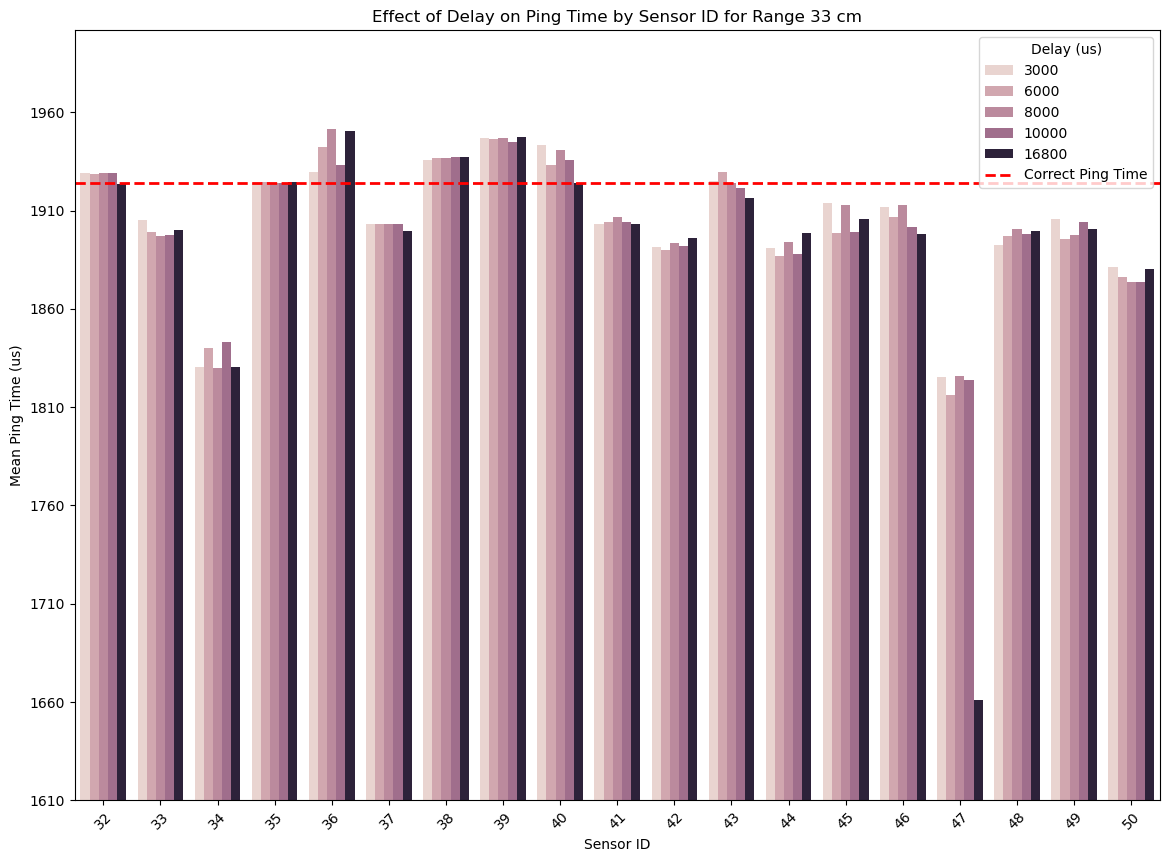

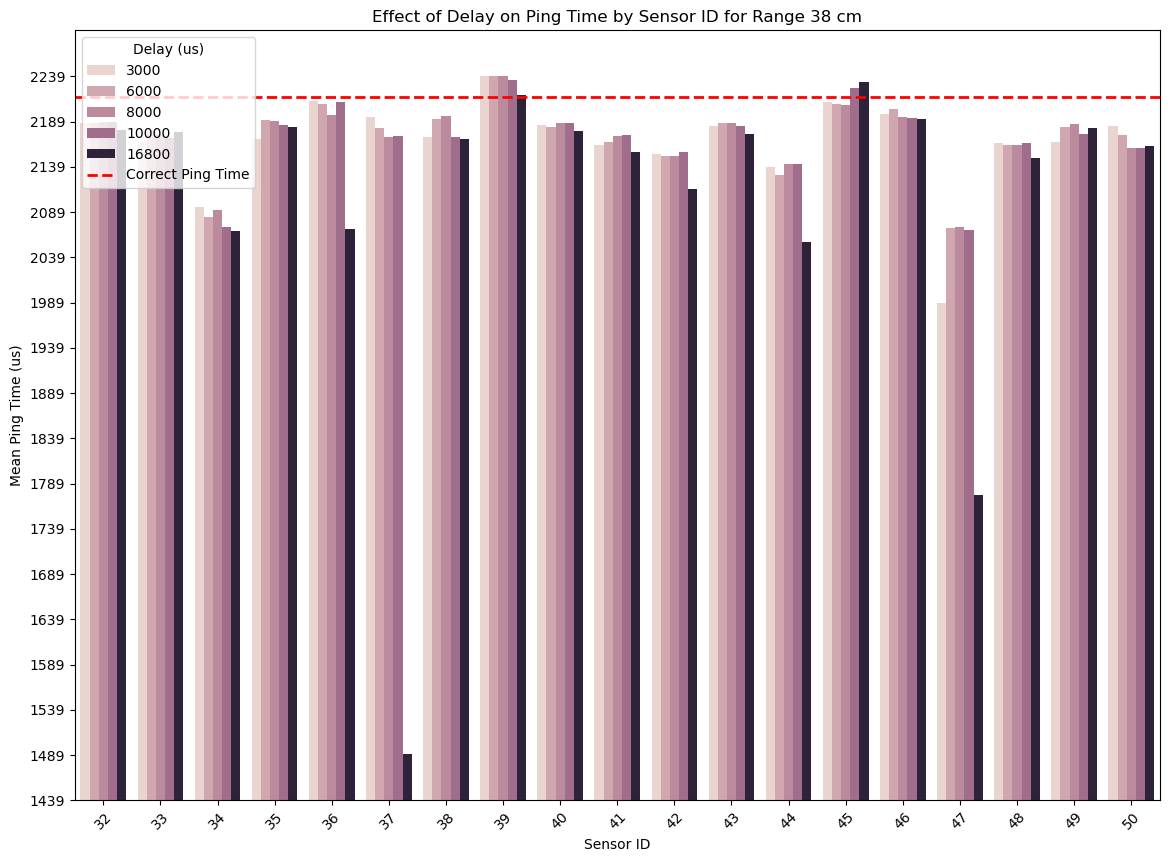

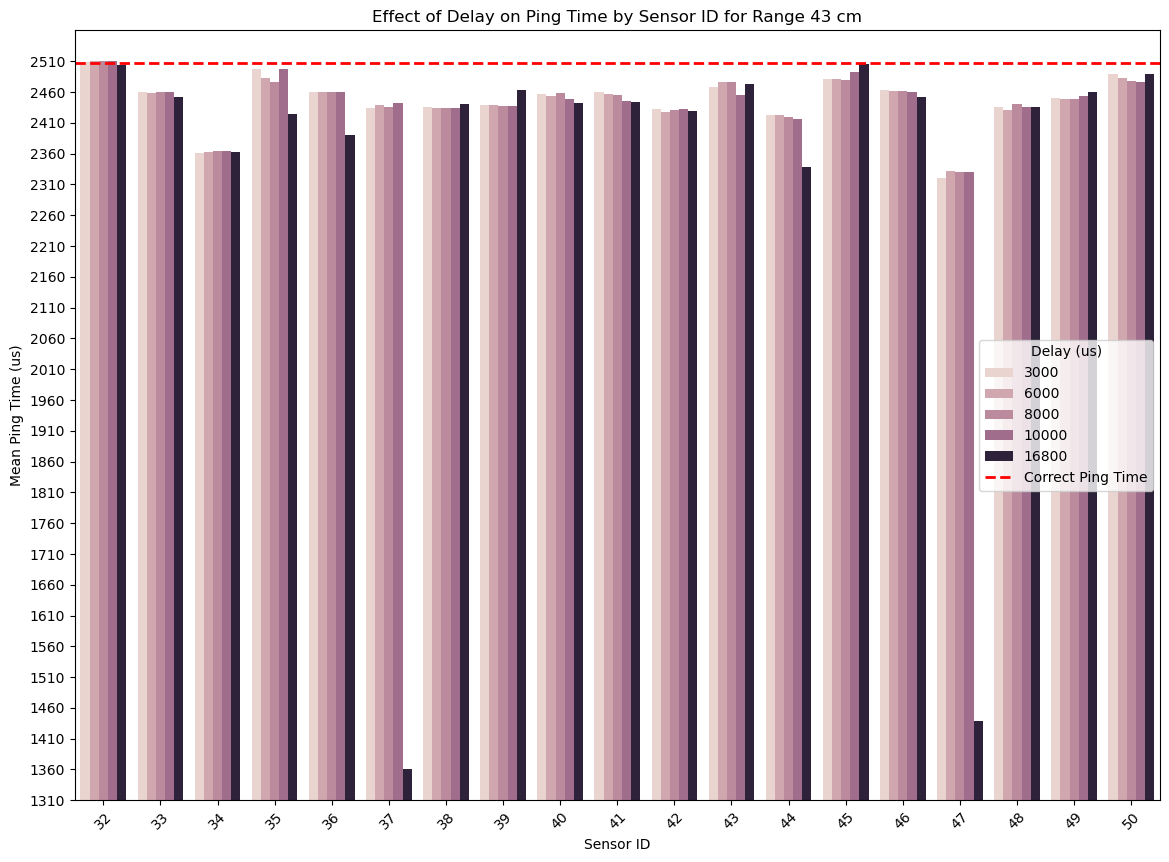

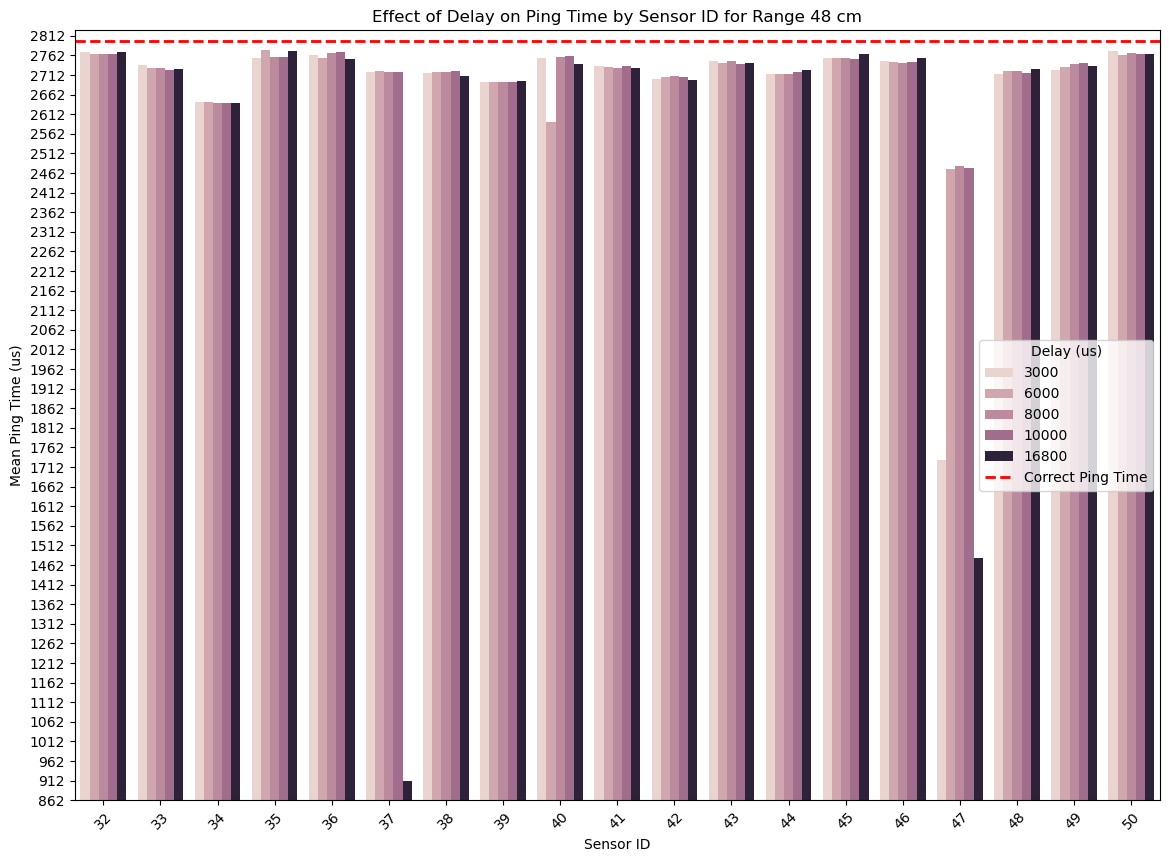

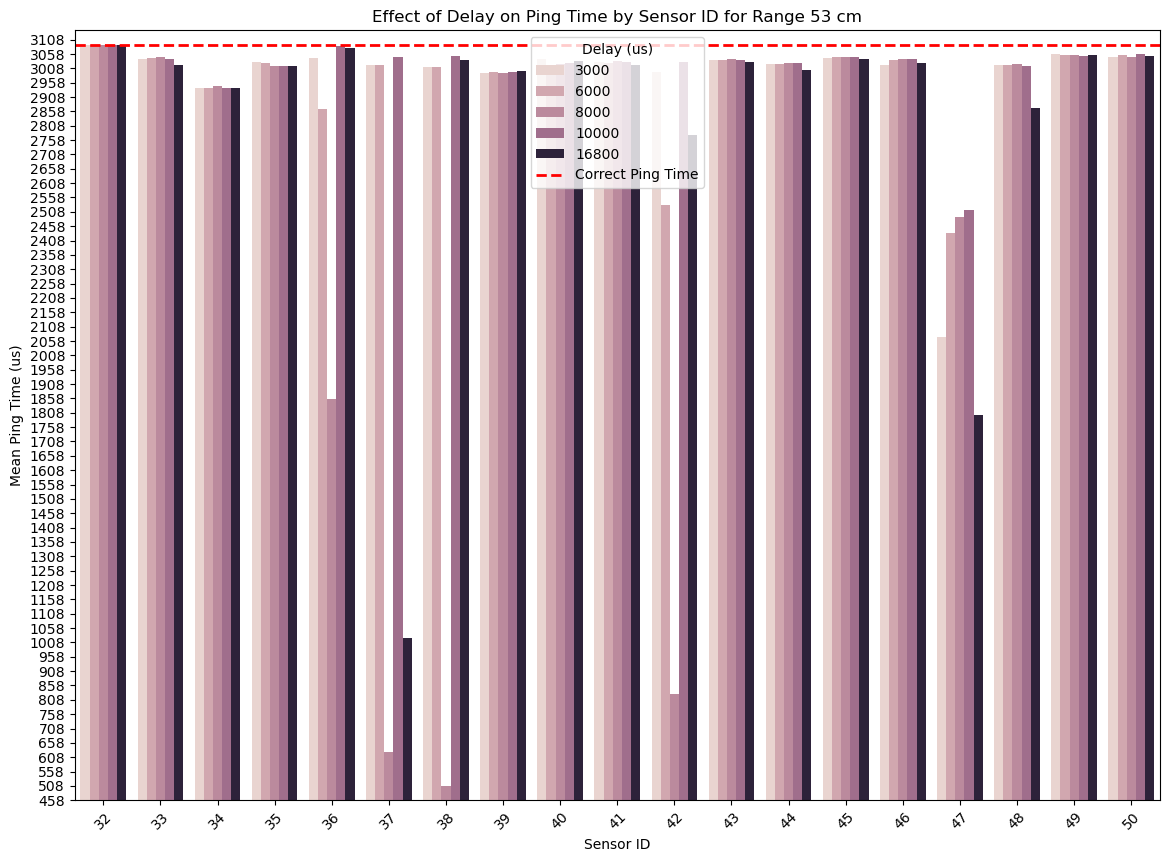

In [132]:
# Print all
visualize_delay_and_range_effect_on_ping_time(cleaned_df)

Things that standout:
1. At range 53 they seems to be struggling especially when delay is at 8000
2. There are some that over measurement but general trend is under measurement was prevalent
3. 16800us Delay seems to still give close enough data to the where the ping time should be
4. This may have been caused by the outlier since this is just a mean so we have to investigaste further

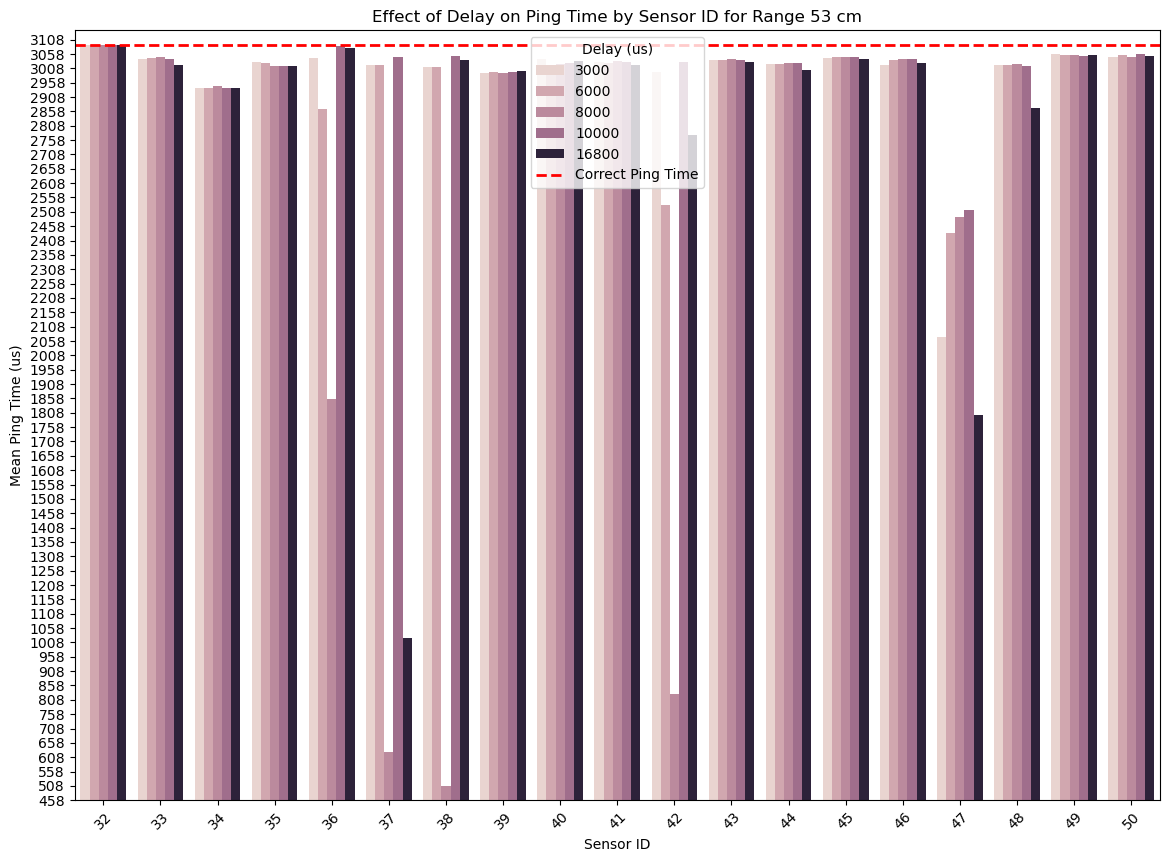

In [134]:
visualize_delay_and_range_effect_on_ping_time(cleaned_df, 53)

### Visualization by Sensor

Do another analysis based on sensors

In [148]:
# Function to visualize the effect of delay and range on ping time
def visualize_effect_on_ping_time_sensors(df, target = 0):
    """
    Visualize the effect of delay and range on ping time.

    Parameters:
    df (DataFrame): The DataFrame containing the data.
    """
    # Group by sensor ID, delay, and range, then calculate the mean ping time
    grouped_df = df.groupby(['Sensor ID', 'Delay (us)', 'Range (cm)'])['Ping Time (us)'].mean().reset_index()
    # Create individual plots for each range
    unique_sensors = grouped_df['Sensor ID'].unique()
    
    if target == 0:
        for id_val in unique_sensors:
            subset_df = grouped_df[grouped_df['Sensor ID'] == id_val]
            plt.figure(figsize=(14, 10))
            sns.barplot(
                x='Range (cm)', 
                y='Ping Time (us)', 
                hue='Delay (us)', 
                data=subset_df
            )
            
            plt.title(f'Effect of Delay on Ping Time by Range on Sensor {id_val}')
            plt.xlabel('Range (cm)')
            plt.ylabel('Mean Ping Time (us)')
            plt.legend(title='Delay (us)')
            plt.xticks(rotation=45)
            # Adjust y-axis limits and ticks for better precision
            min_ping_time = subset_df['Ping Time (us)'].min()
            max_ping_time = subset_df['Ping Time (us)'].max()
            plt.ylim(min_ping_time - 50, max_ping_time + 50)  # Adjust the limits as needed
            plt.yticks(range(int(min_ping_time) - 50, int(max_ping_time) + 50, 50))  # Adjust the step as needed
            plt.show()
    else:
        if target in unique_sensors:
            subset_df = grouped_df[grouped_df['Sensor ID'] == target]
            plt.figure(figsize=(14, 10))
            sns.barplot(
                x='Range (cm)', 
                y='Ping Time (us)', 
                hue='Delay (us)', 
                data=subset_df
            )
            
            plt.title(f'Effect of Delay on Ping Time by Range on Sensor {target}')
            plt.xlabel('Range (cm)')
            plt.ylabel('Mean Ping Time (us)')
            plt.legend(title='Delay (us)')
            plt.xticks(rotation=45)
            # Adjust y-axis limits and ticks for better precision
            min_ping_time = subset_df['Ping Time (us)'].min()
            max_ping_time = subset_df['Ping Time (us)'].max()
            plt.ylim(min_ping_time - 50, max_ping_time + 50)  # Adjust the limits as needed
            plt.yticks(range(int(min_ping_time) - 50, int(max_ping_time) + 50, 50))  # Adjust the step as needed
            plt.show()

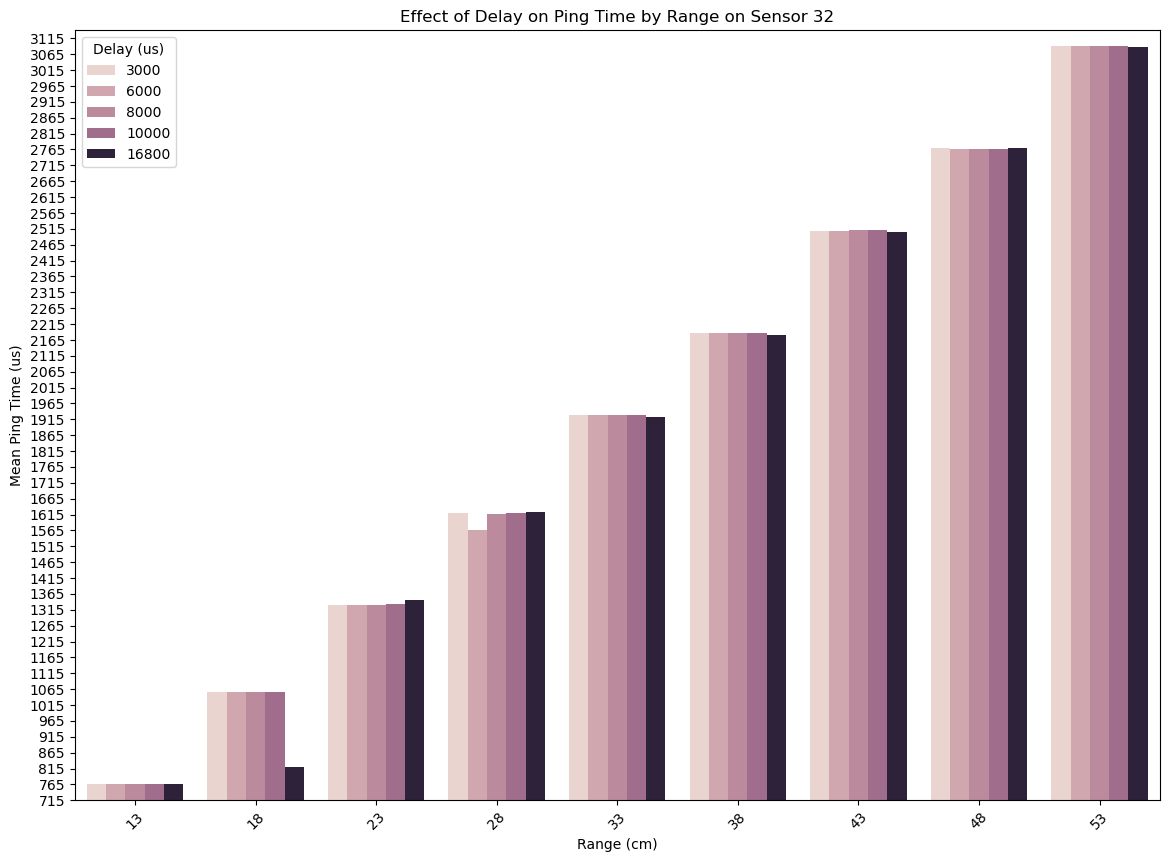

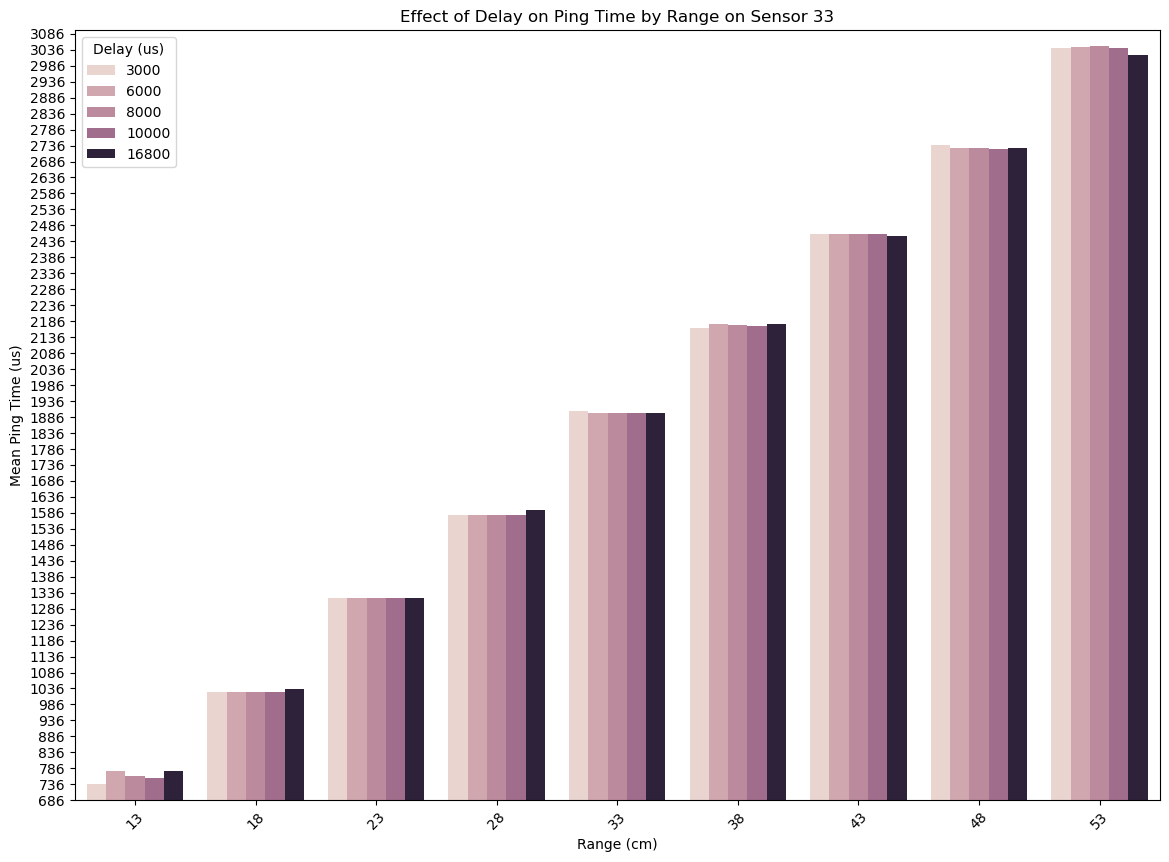

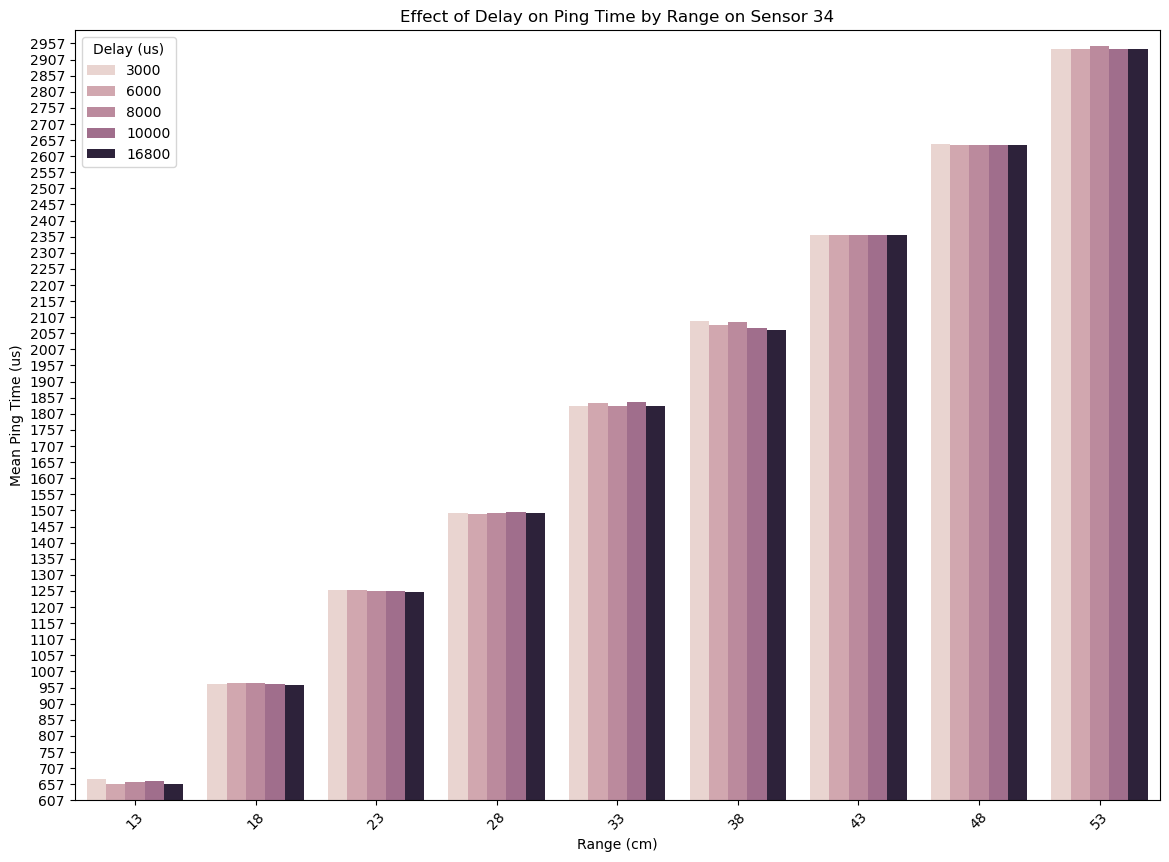

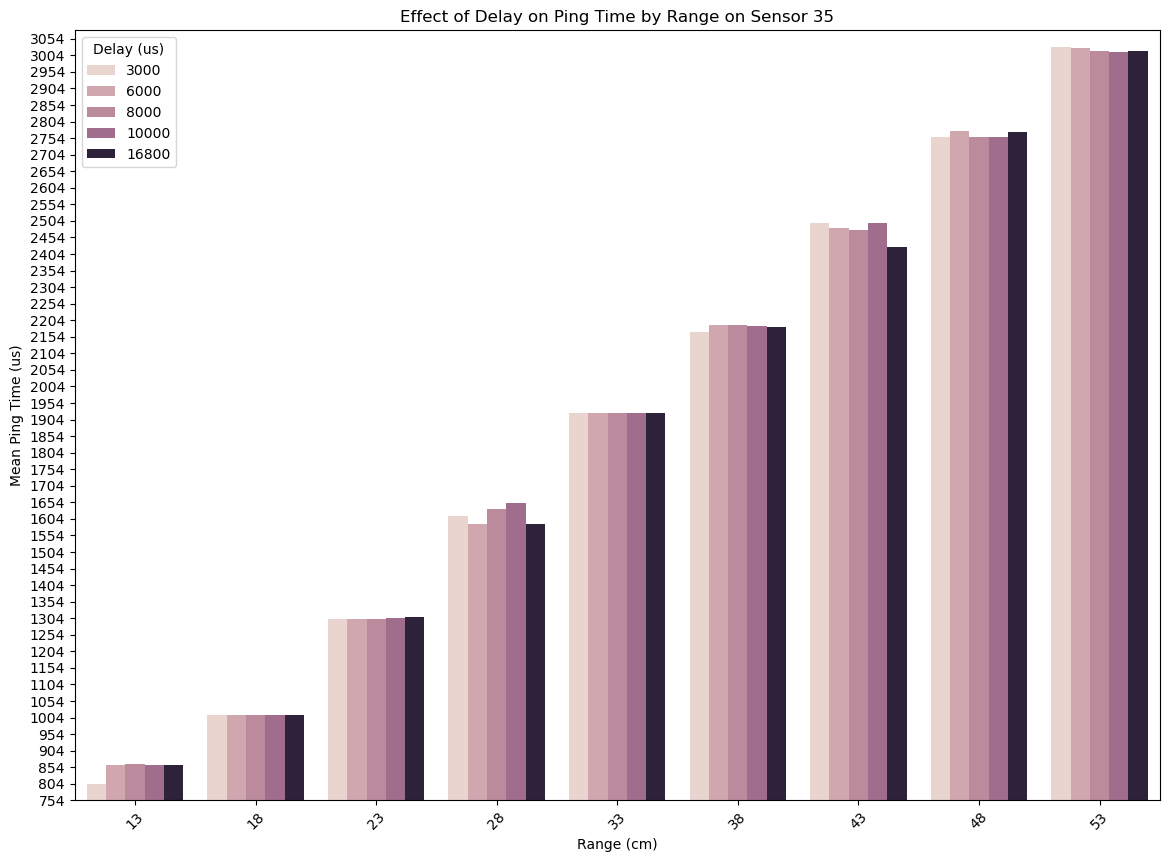

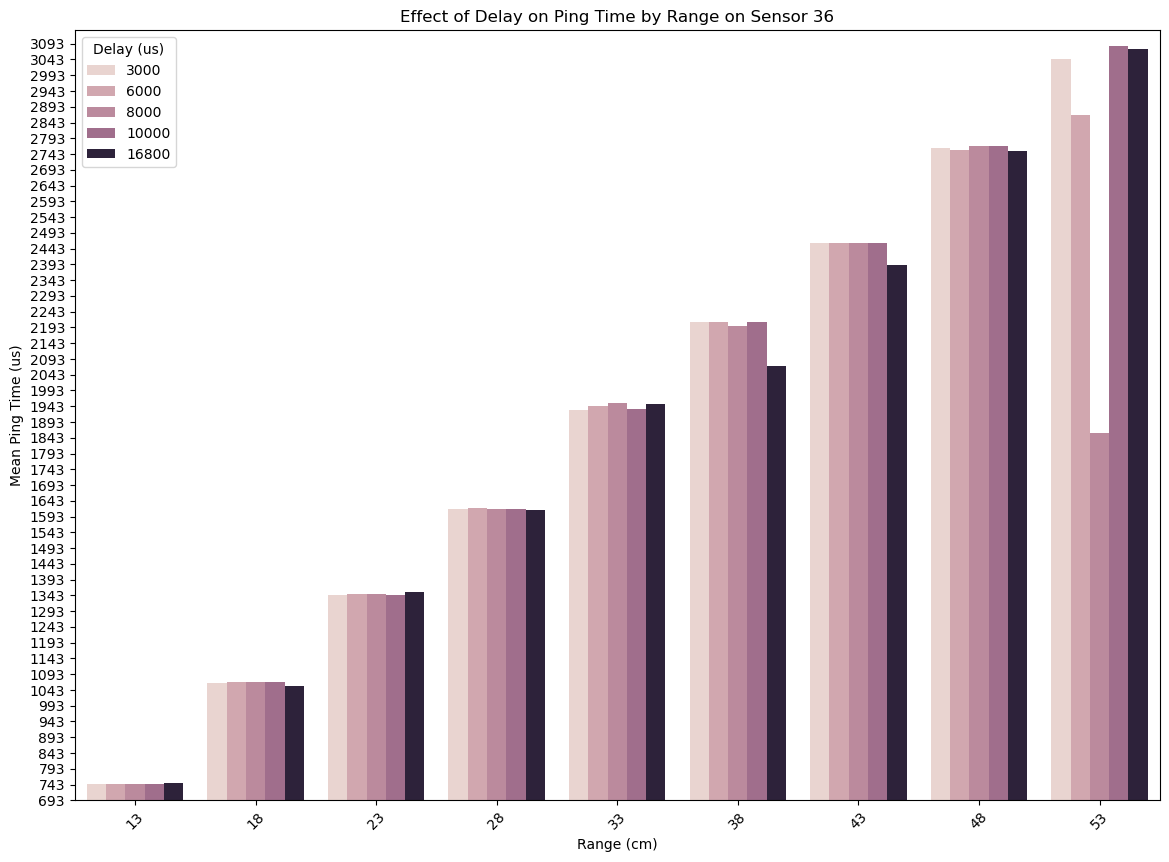

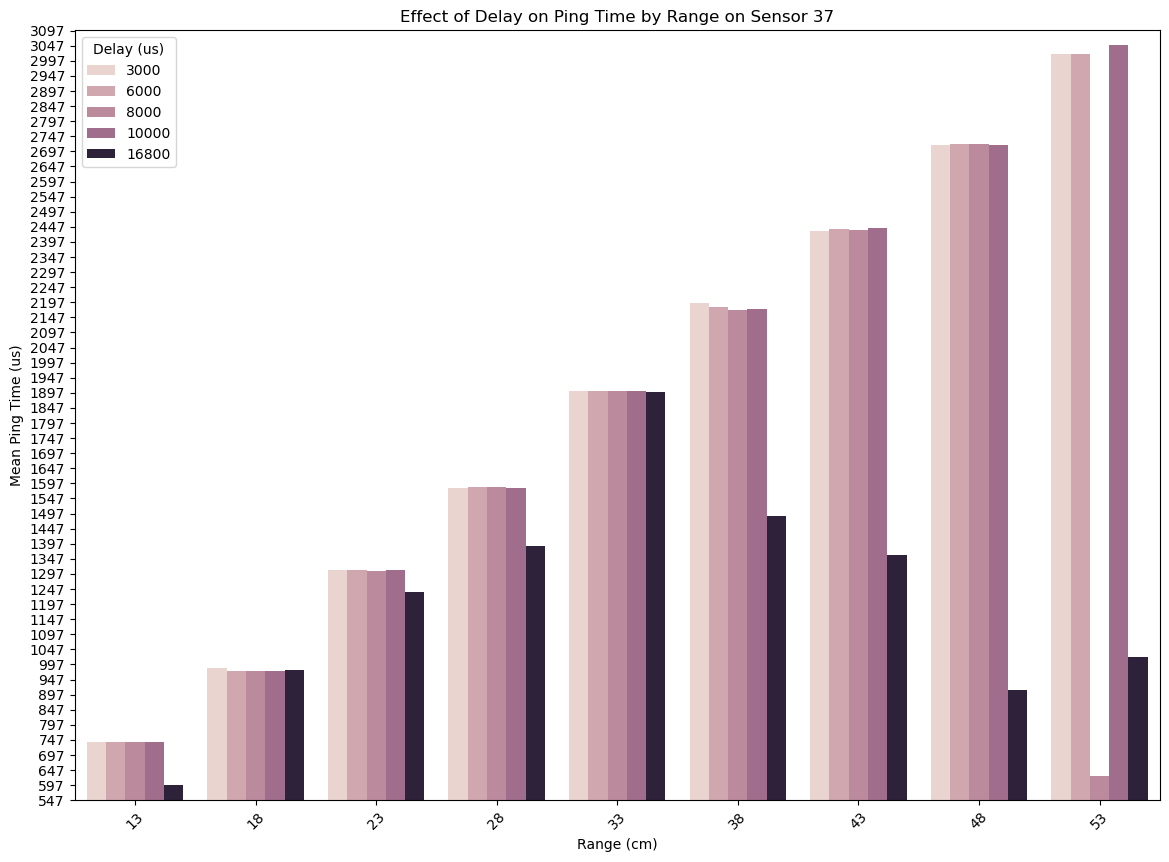

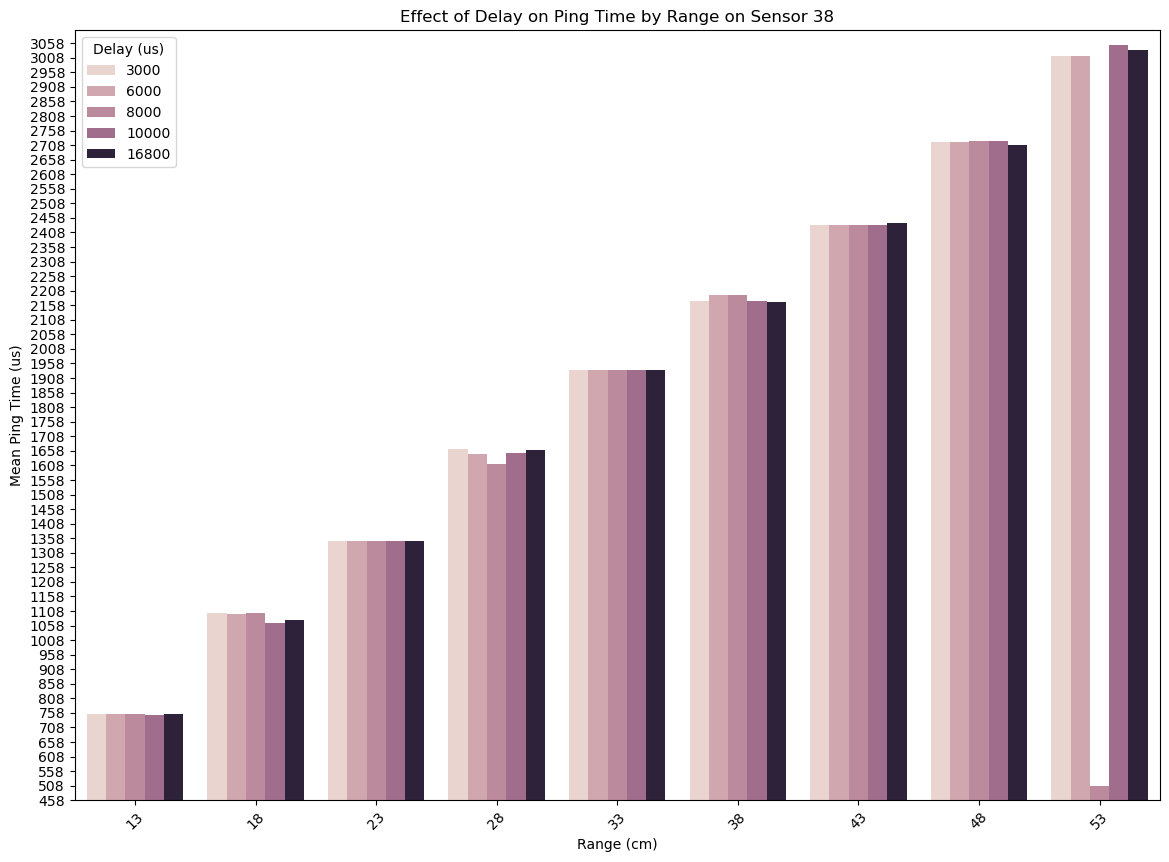

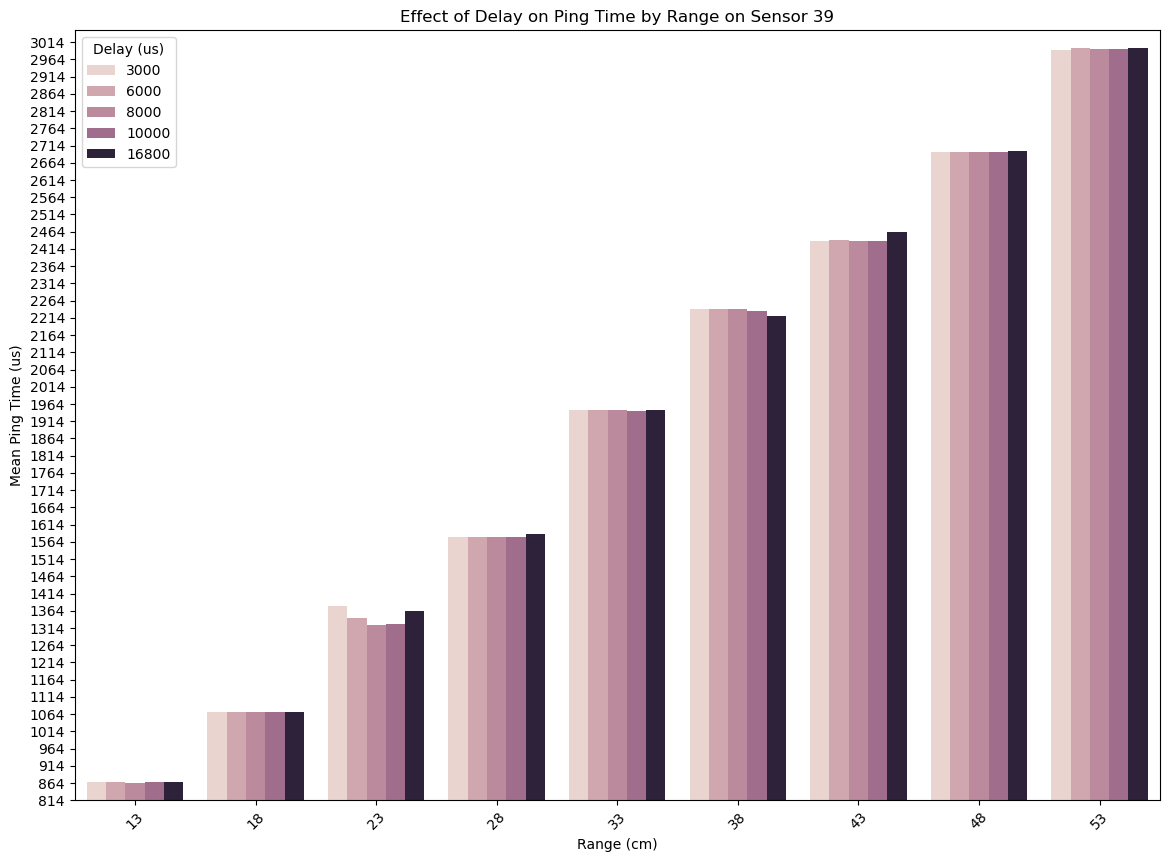

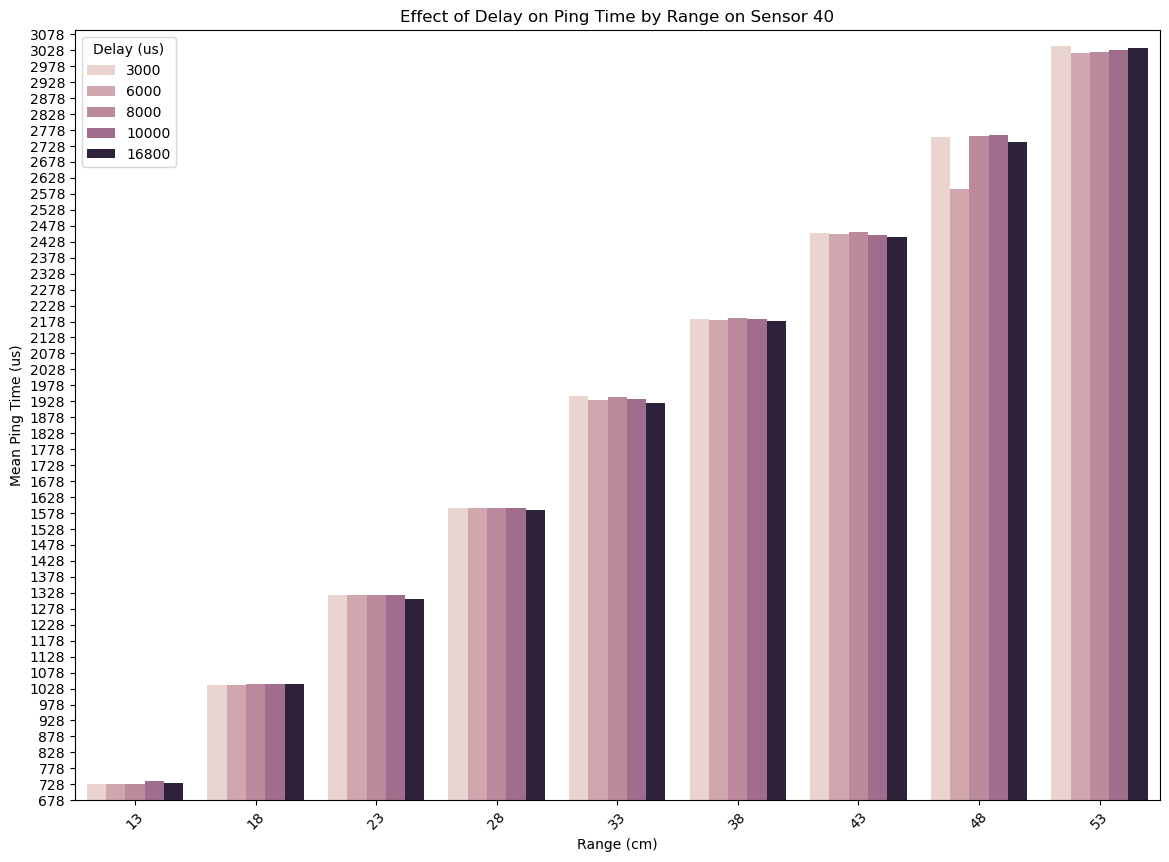

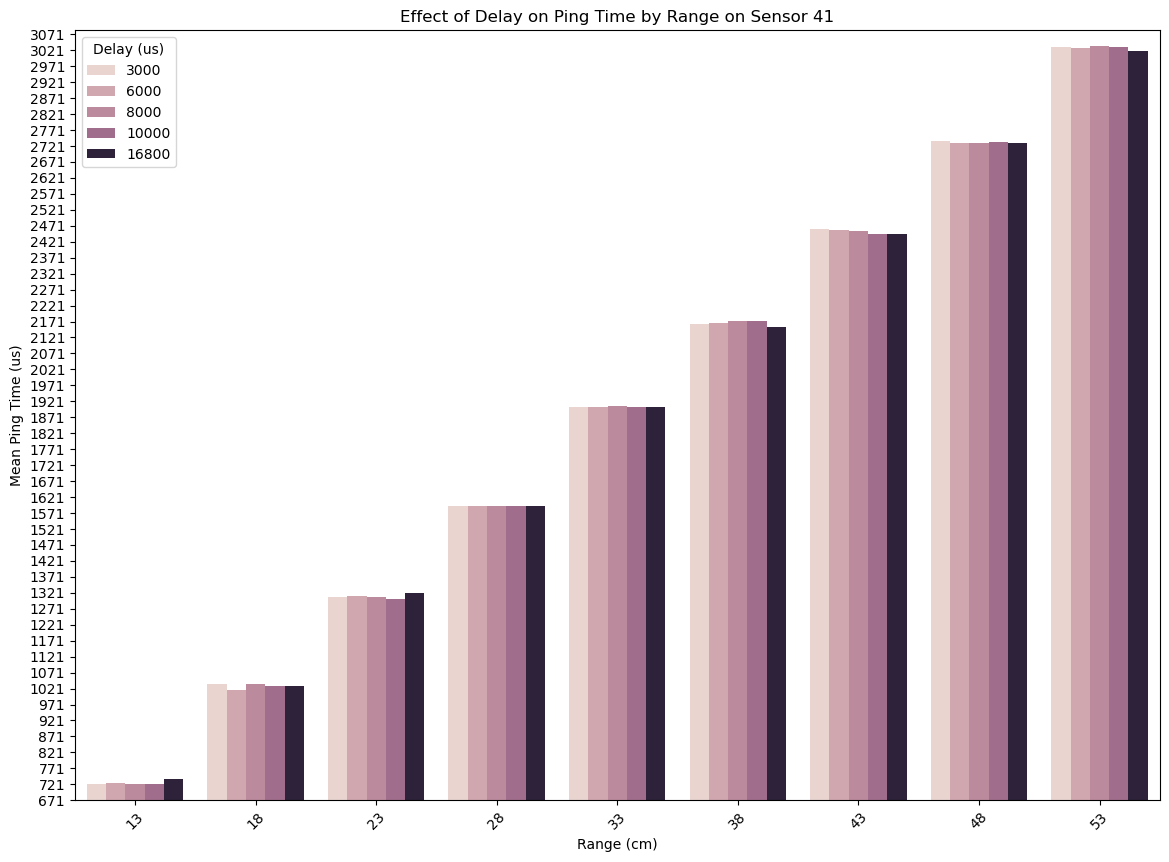

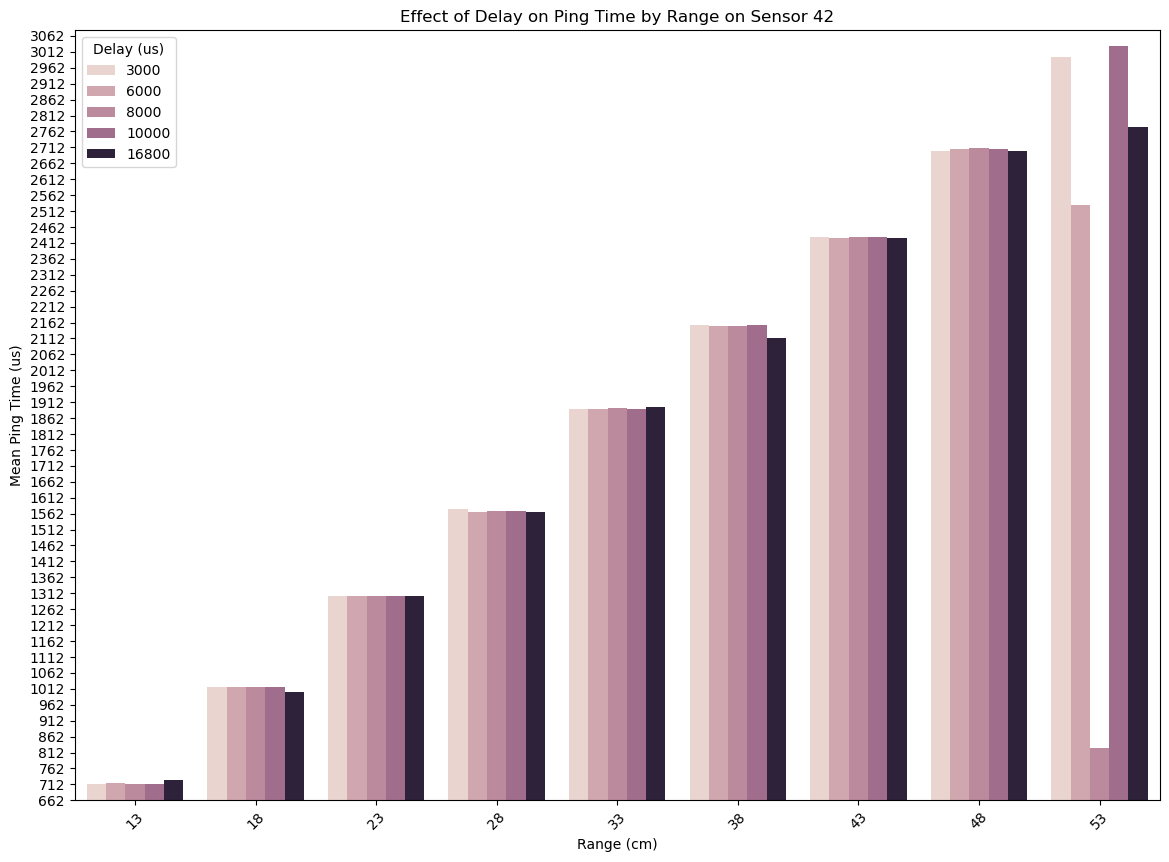

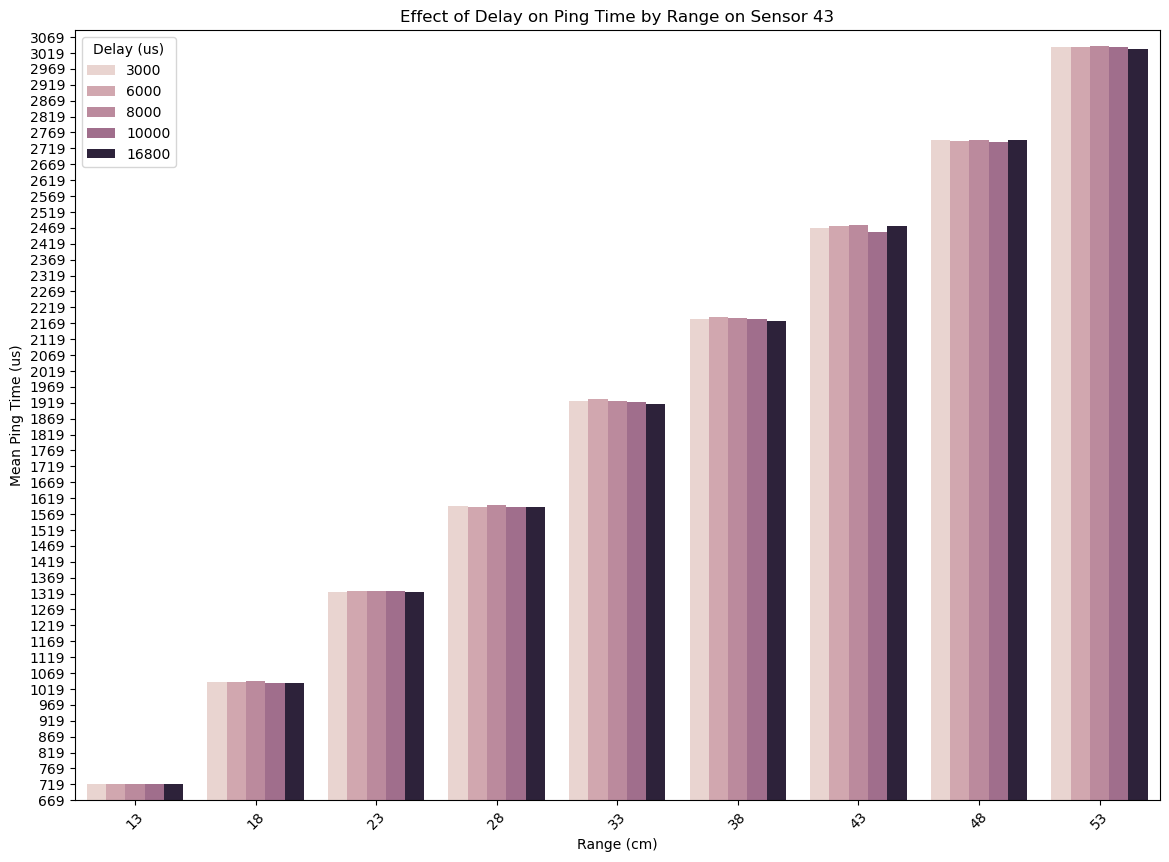

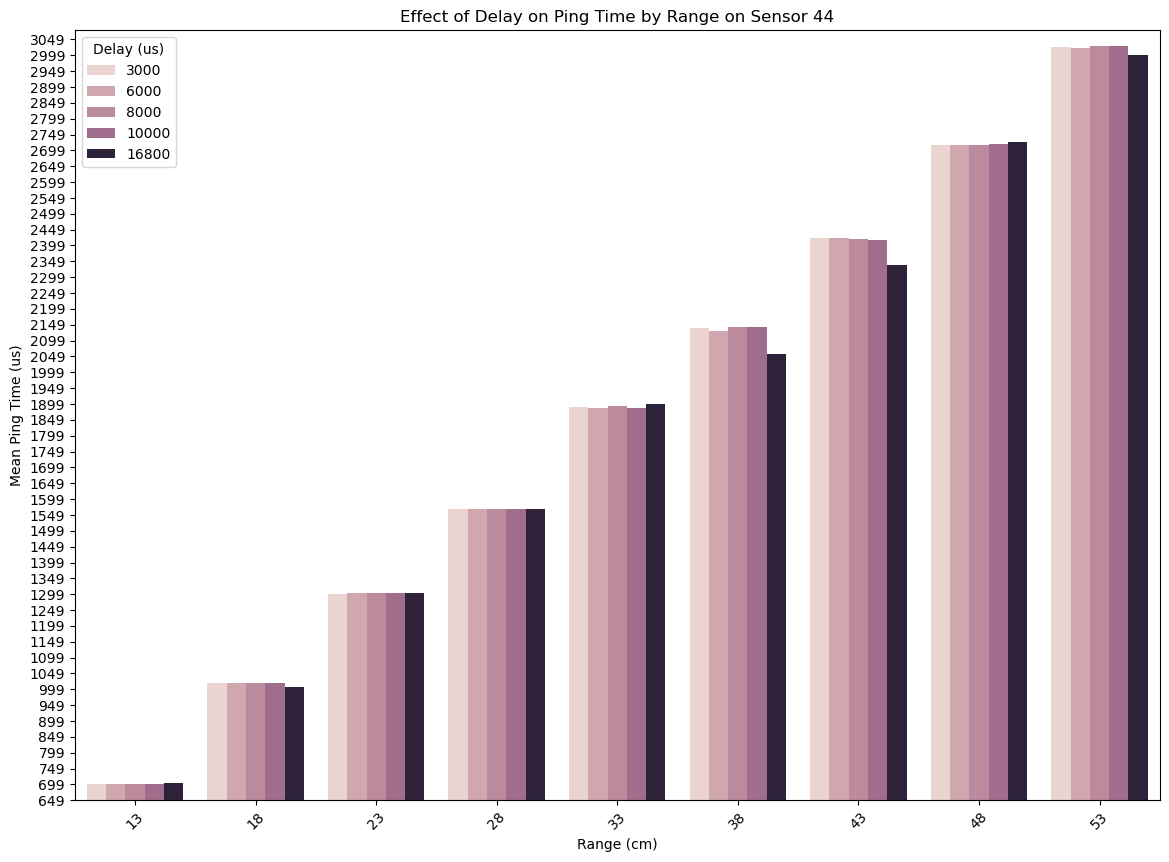

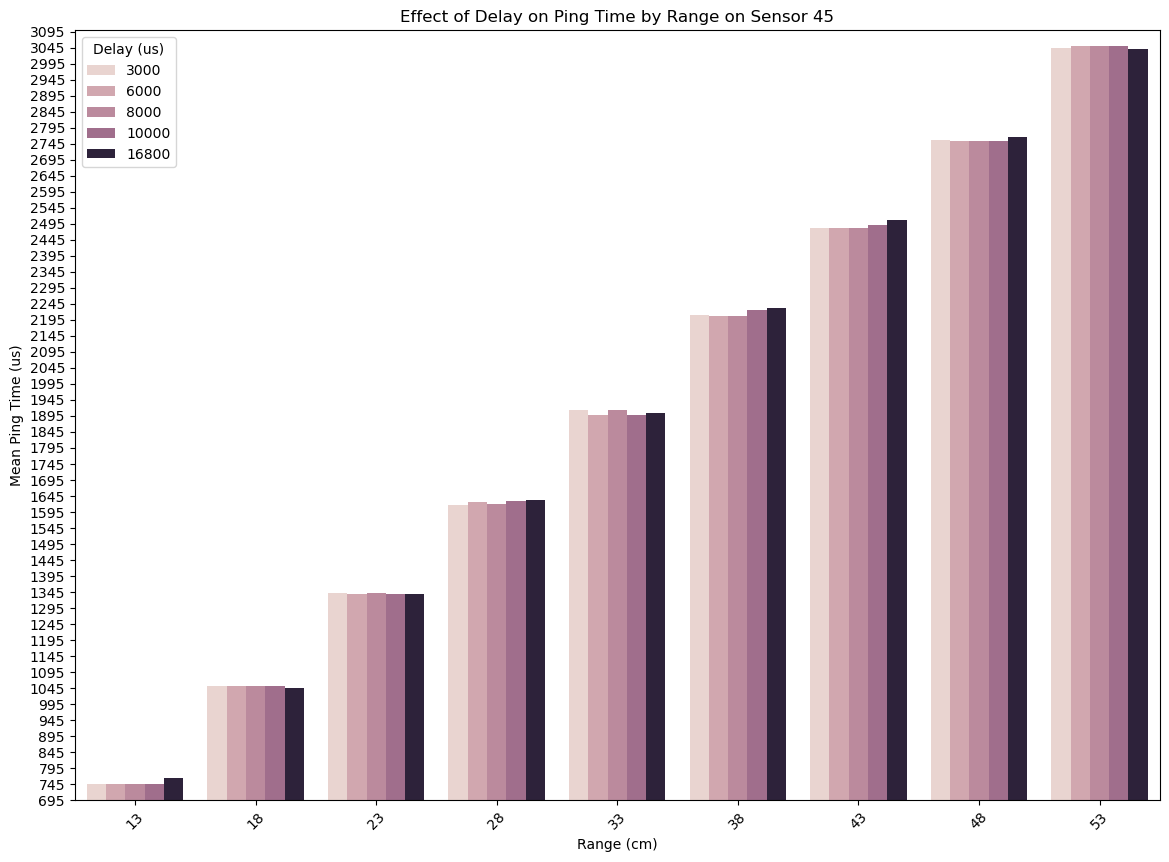

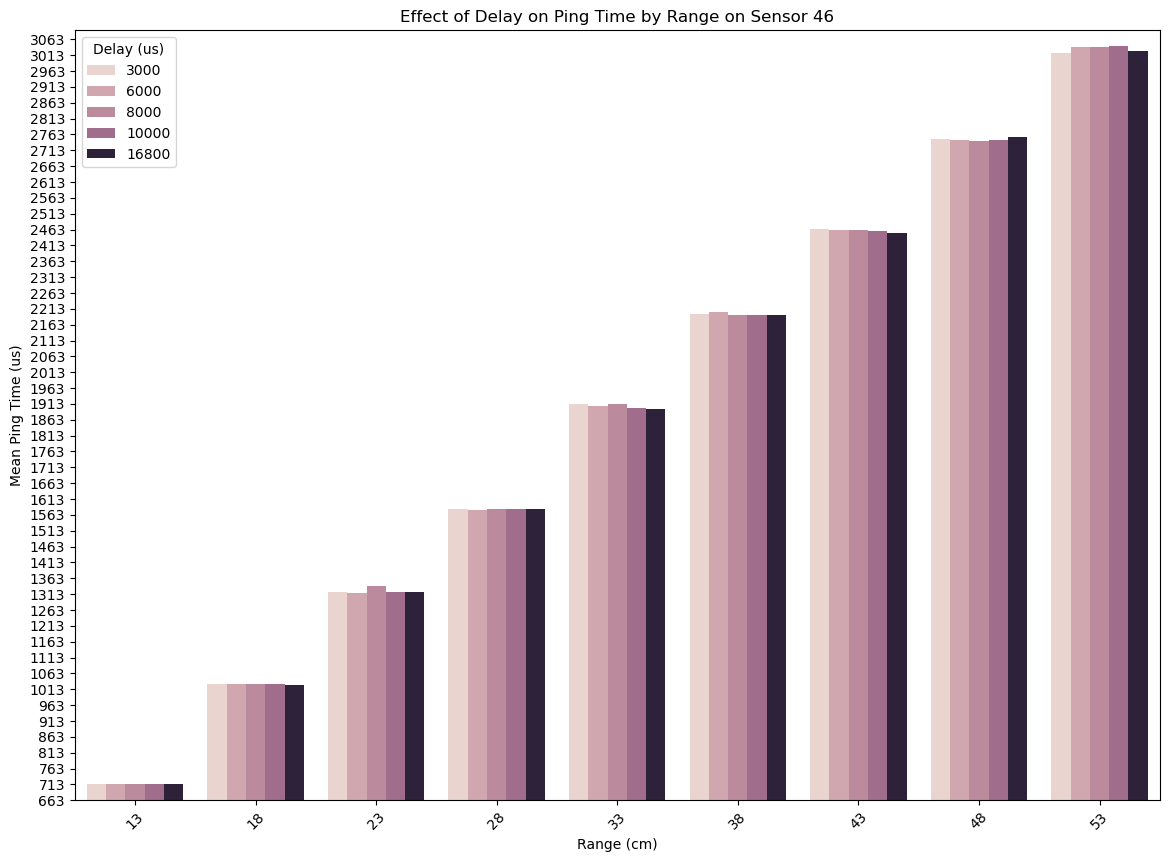

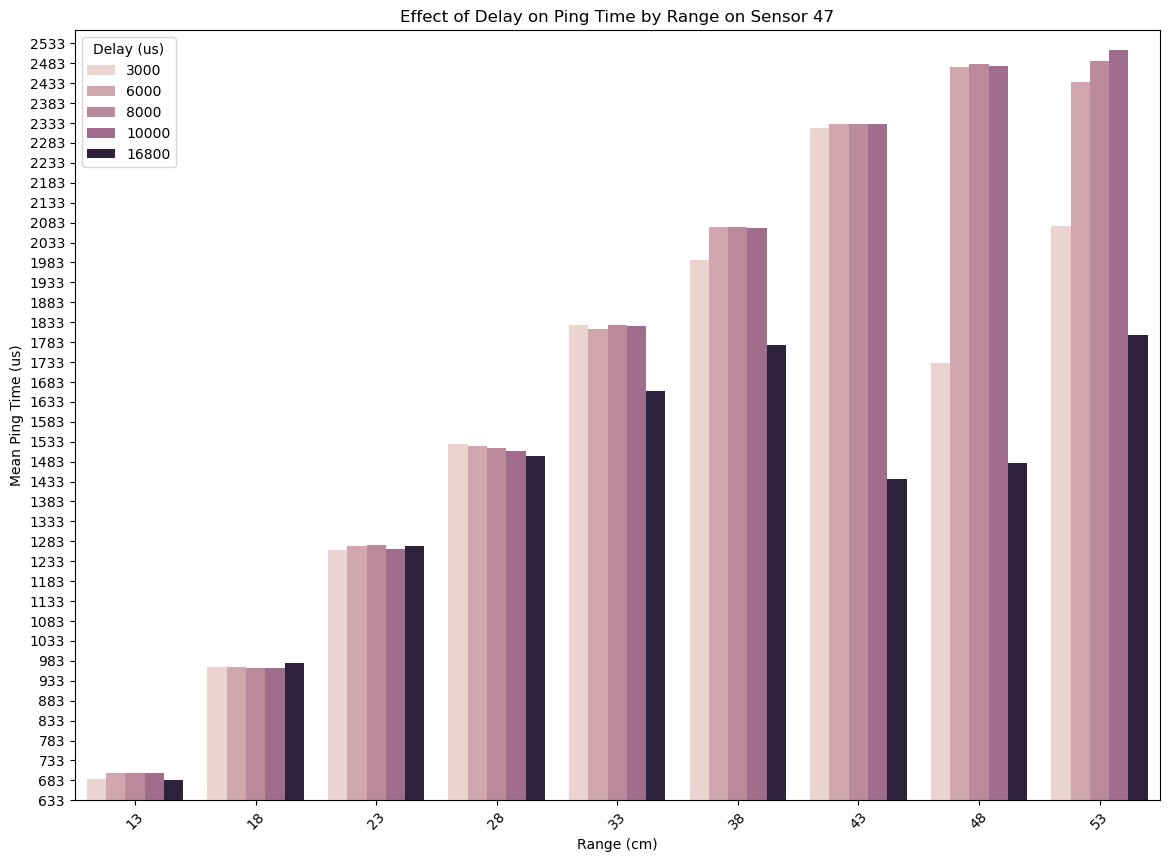

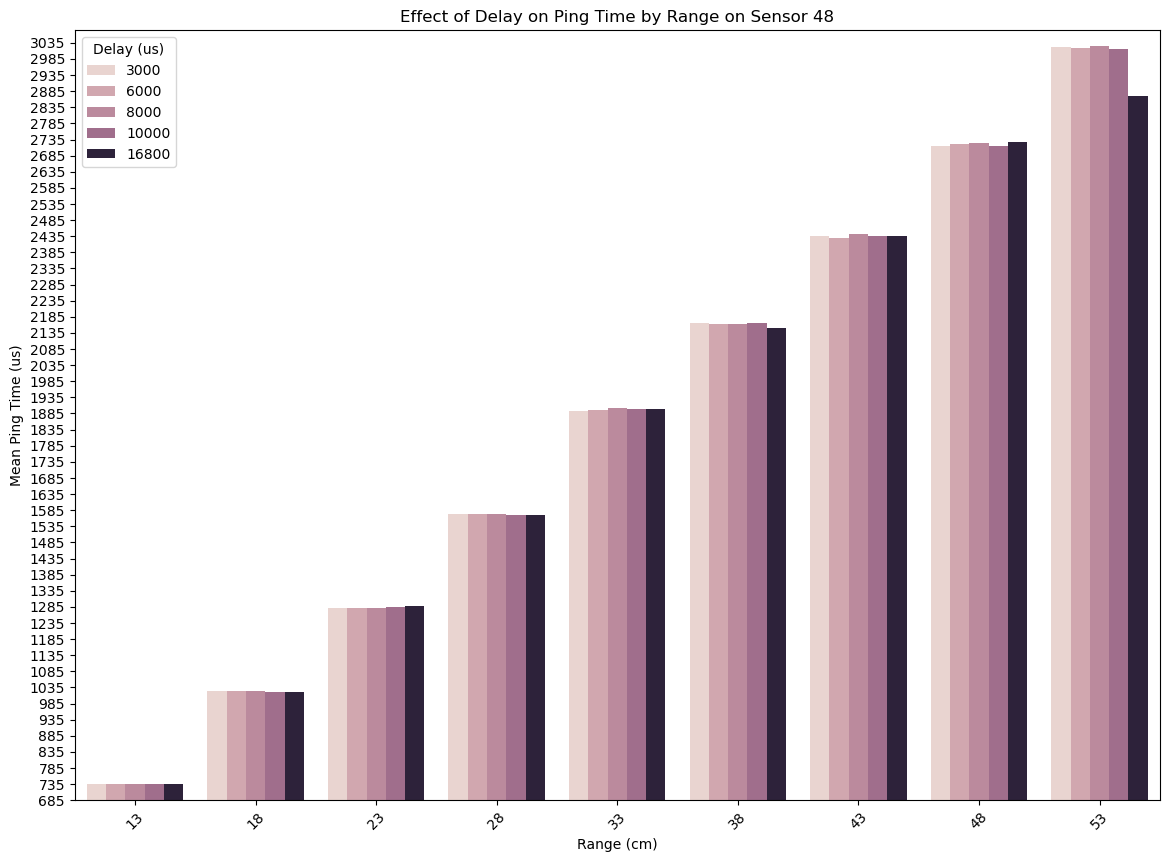

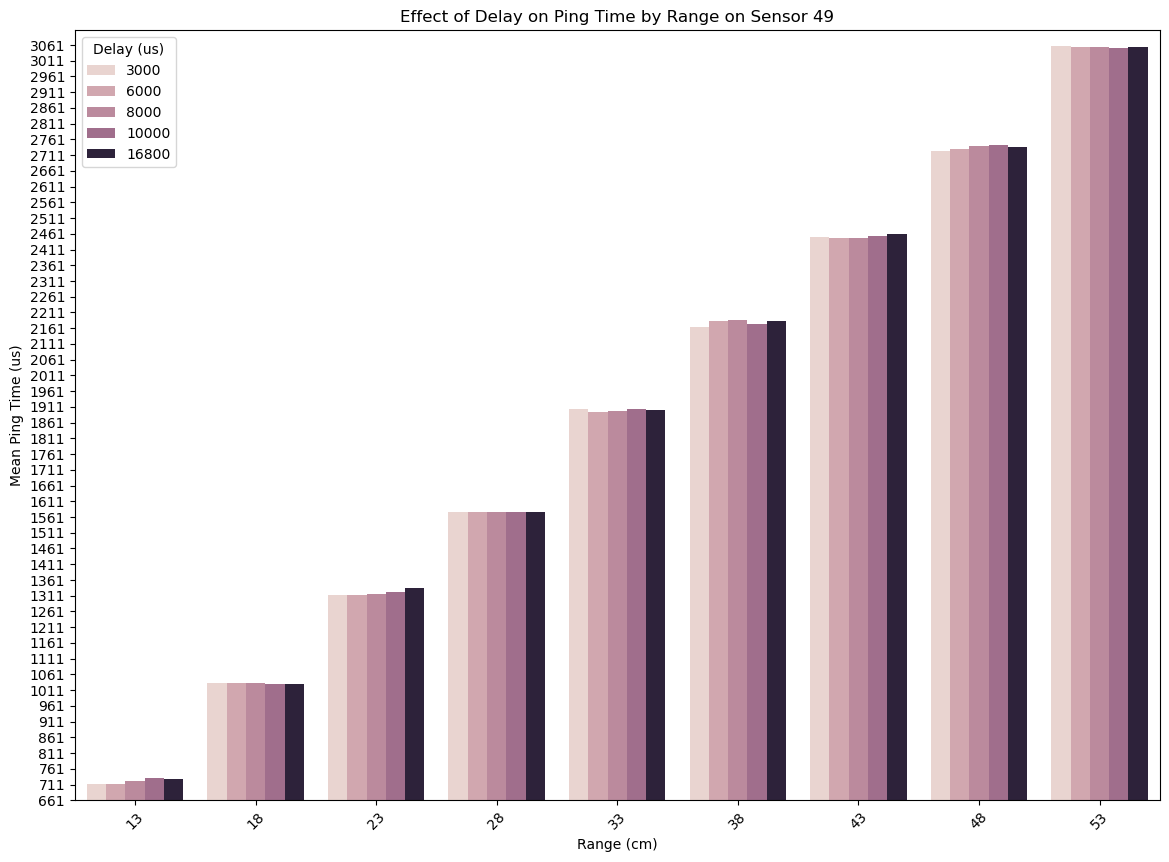

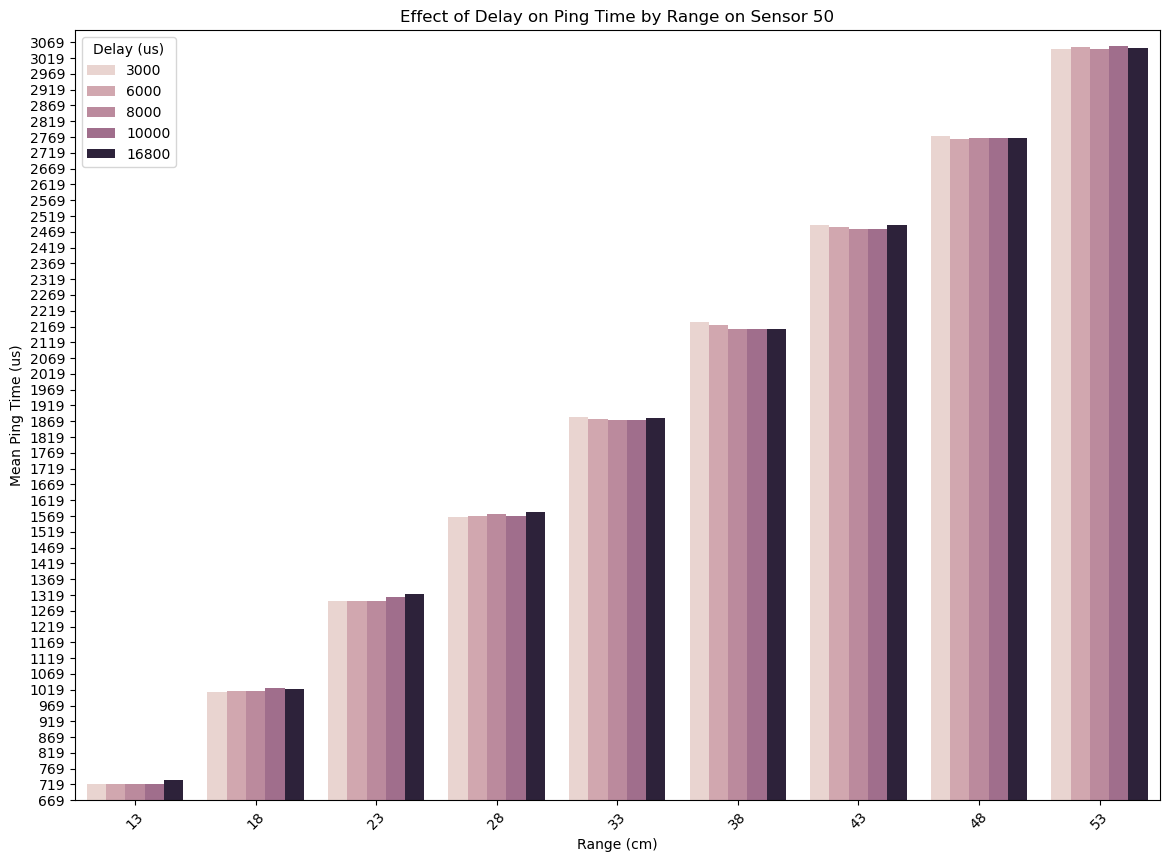

In [135]:
visualize_effect_on_ping_time_sensors(cleaned_df)

From these graph we can see that the each sensor have distinct graph shapes. This make the outlook of the project to characterize the sensor more promising.

### Line plot by range

This plot will show how they generally look of the measurement actually look like. This is also more effective to show linear relationship.

In [136]:
import pandas as pd
import numpy as np
import plotly.express as px
import plotly.graph_objects as go

def visualize_lineplot_ping_time_with_variability(df):
    """
    Visualize the effect of range on ping time for each delay separately with variability.

    Parameters:
    df (DataFrame): The DataFrame containing the data.
    """
    # Group by sensor ID, delay, and range, then calculate the mean and standard deviation of ping time
    grouped_df = df.groupby(['Sensor ID', 'Delay (us)', 'Range (cm)']).agg(
        mean_ping_time=('Ping Time (us)', 'mean'),
        std_ping_time=('Ping Time (us)', 'std')
    ).reset_index()

    # Get unique delays
    unique_delays = grouped_df['Delay (us)'].unique()

    for delay in unique_delays:
        subset_df = grouped_df[grouped_df['Delay (us)'] == delay]

        fig = px.line(
            subset_df,
            x='Range (cm)',
            y='mean_ping_time',
            color='Sensor ID',
            markers=True,
            title=f'Effect of Range on Ping Time for Delay {delay} us with Variability'
        )

        # Adding error bars
        for sensor_id in subset_df['Sensor ID'].unique():
            sensor_data = subset_df[subset_df['Sensor ID'] == sensor_id]
            fig.add_trace(
                go.Scatter(
                    x=sensor_data['Range (cm)'],
                    y=sensor_data['mean_ping_time'],
                    mode='lines+markers',
                    name=f'Sensor {sensor_id}',
                    error_y=dict(
                        type='data',
                        array=sensor_data['std_ping_time'],
                        visible=True
                    )
                )
            )

        # Plot reference line
        ranges = np.linspace(subset_df['Range (cm)'].min(), subset_df['Range (cm)'].max(), 100)
        reference_ping_times = 57 * ranges
        fig.add_trace(
            go.Scatter(
                x=ranges,
                y=reference_ping_times,
                mode='lines',
                line=dict(color='red', dash='dash'),
                name='Reference Line'
            )
        )

        fig.update_layout(
            xaxis_title='Range (cm)',
            yaxis_title='Mean Ping Time (us)',
            legend_title='Sensor ID',
            template='plotly_white'
        )

        fig.show()

# Call the function to visualize the plot
visualize_lineplot_ping_time_with_variability(cleaned_df)


Observations on each delays

3000: every sensor except for 47 they seems to give consistent result 

6000: This delay give more variability where sensor 47 36, and 40 gave huge variability.

8000: there were huge variability and huge dip but this usually happened at the end of the range

10000: one of the most stable delay

16800: This delay also reveals characteristics of the sensor 

# Identifying outliers and doing outlier analysis


#### Visualize Box Plot

In [137]:
def visualize_stacked_box_plots(df):
    """
    Visualize the effect of range on ping time using stacked box plots for each delay.

    Parameters:
    df (DataFrame): The DataFrame containing the data.
    """
    # Get unique delay values
    unique_ranges = df['Range (cm)'].unique()
    
    for range_val in unique_ranges:
        subset_df = df[df['Range (cm)'] == range_val]
        plt.figure(figsize=(16, 12))
        sns.boxplot(
            x='Sensor ID', 
            y='Ping Time (us)', 
            hue='Delay (us)', 
            data=subset_df
        )
        correct_ping_time = (2 * range_val / 100) / 343 * 1e6
        plt.axhline(correct_ping_time, color='red', linestyle='--', linewidth=2, label='Correct Ping Time')
                
        plt.title(f'Stacked Box Plot of Ping Time (us) Grouped by Delay (us) for Range {range_val} cm')
        plt.xlabel('Sensor ID')
        plt.ylabel('Ping Time (us)')
        plt.legend(title='Sensor ID', bbox_to_anchor=(1.05, 1), loc='upper left')
        plt.grid(True)
        plt.xticks(rotation=45)
        # Adjust y-axis limits for better precision
        min_ping_time = subset_df['Ping Time (us)'].min()
        max_ping_time = subset_df['Ping Time (us)'].max()
        plt.ylim(min_ping_time - 50, max_ping_time + 50)  # Adjust the limits as needed
        plt.show()

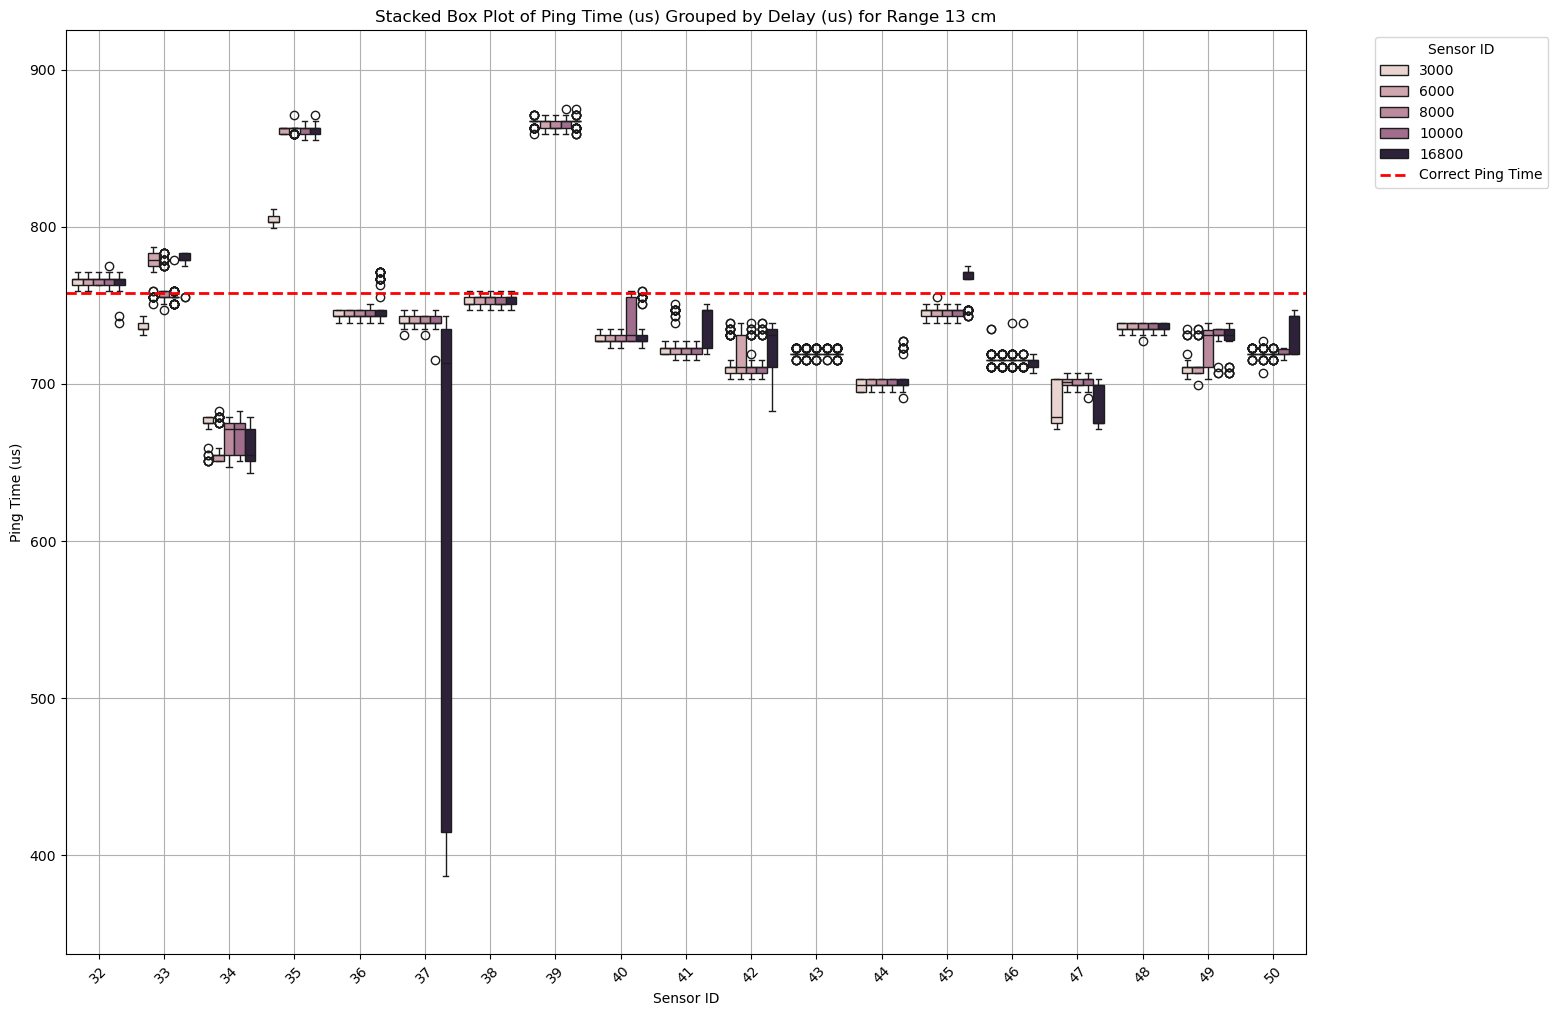

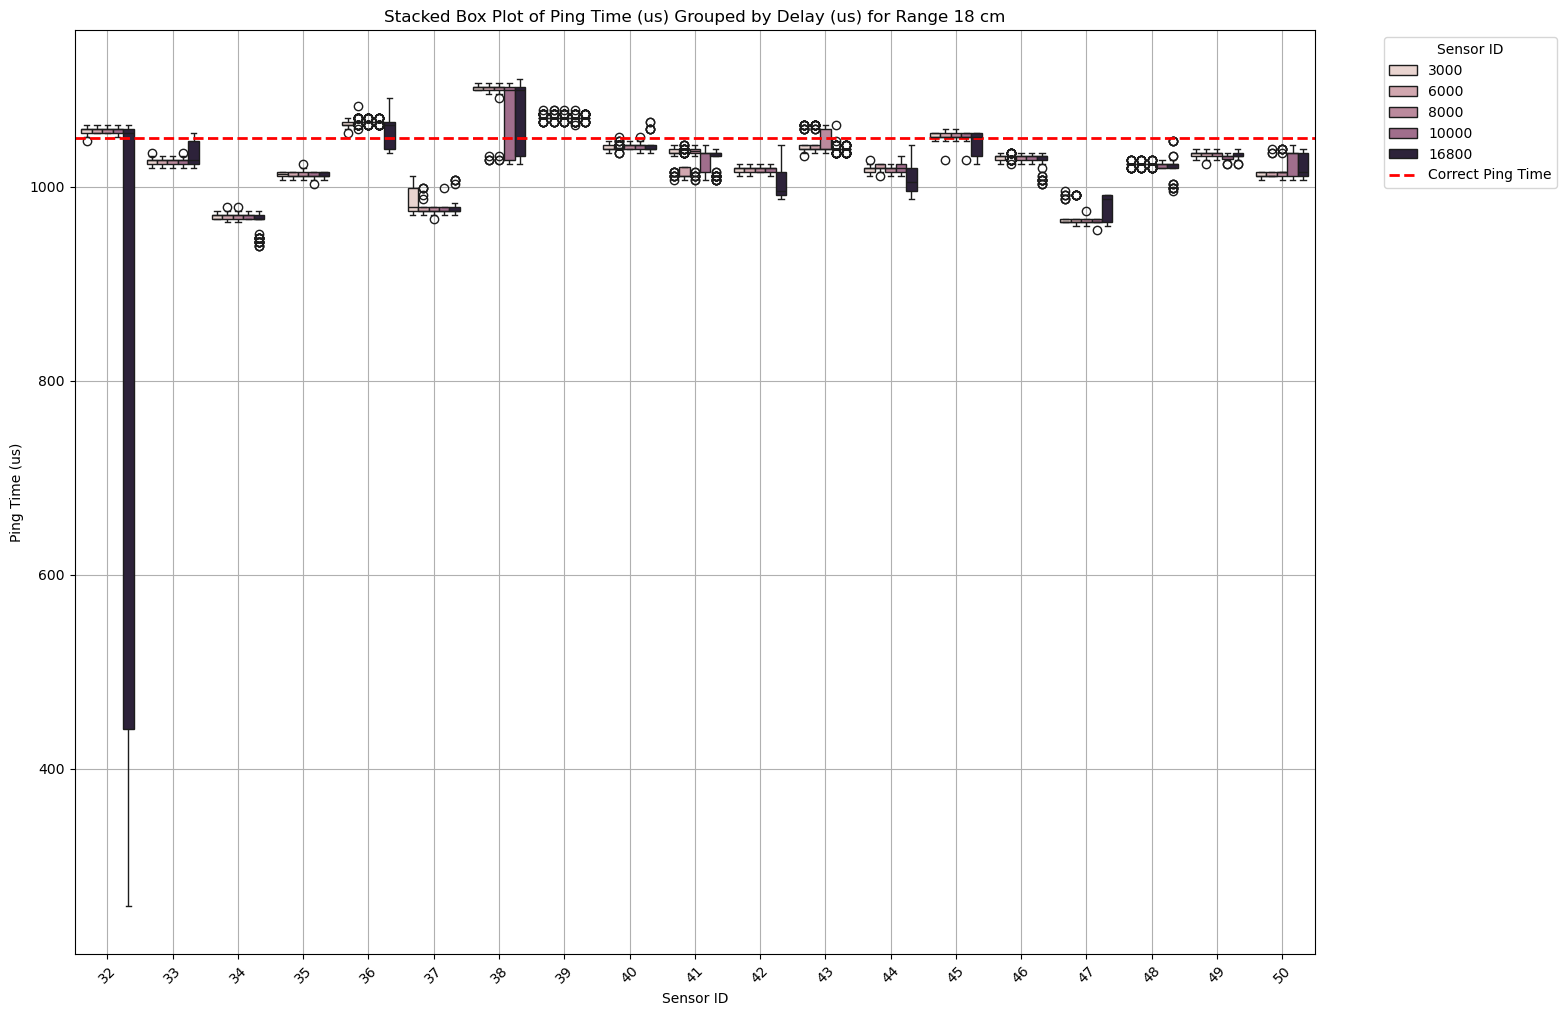

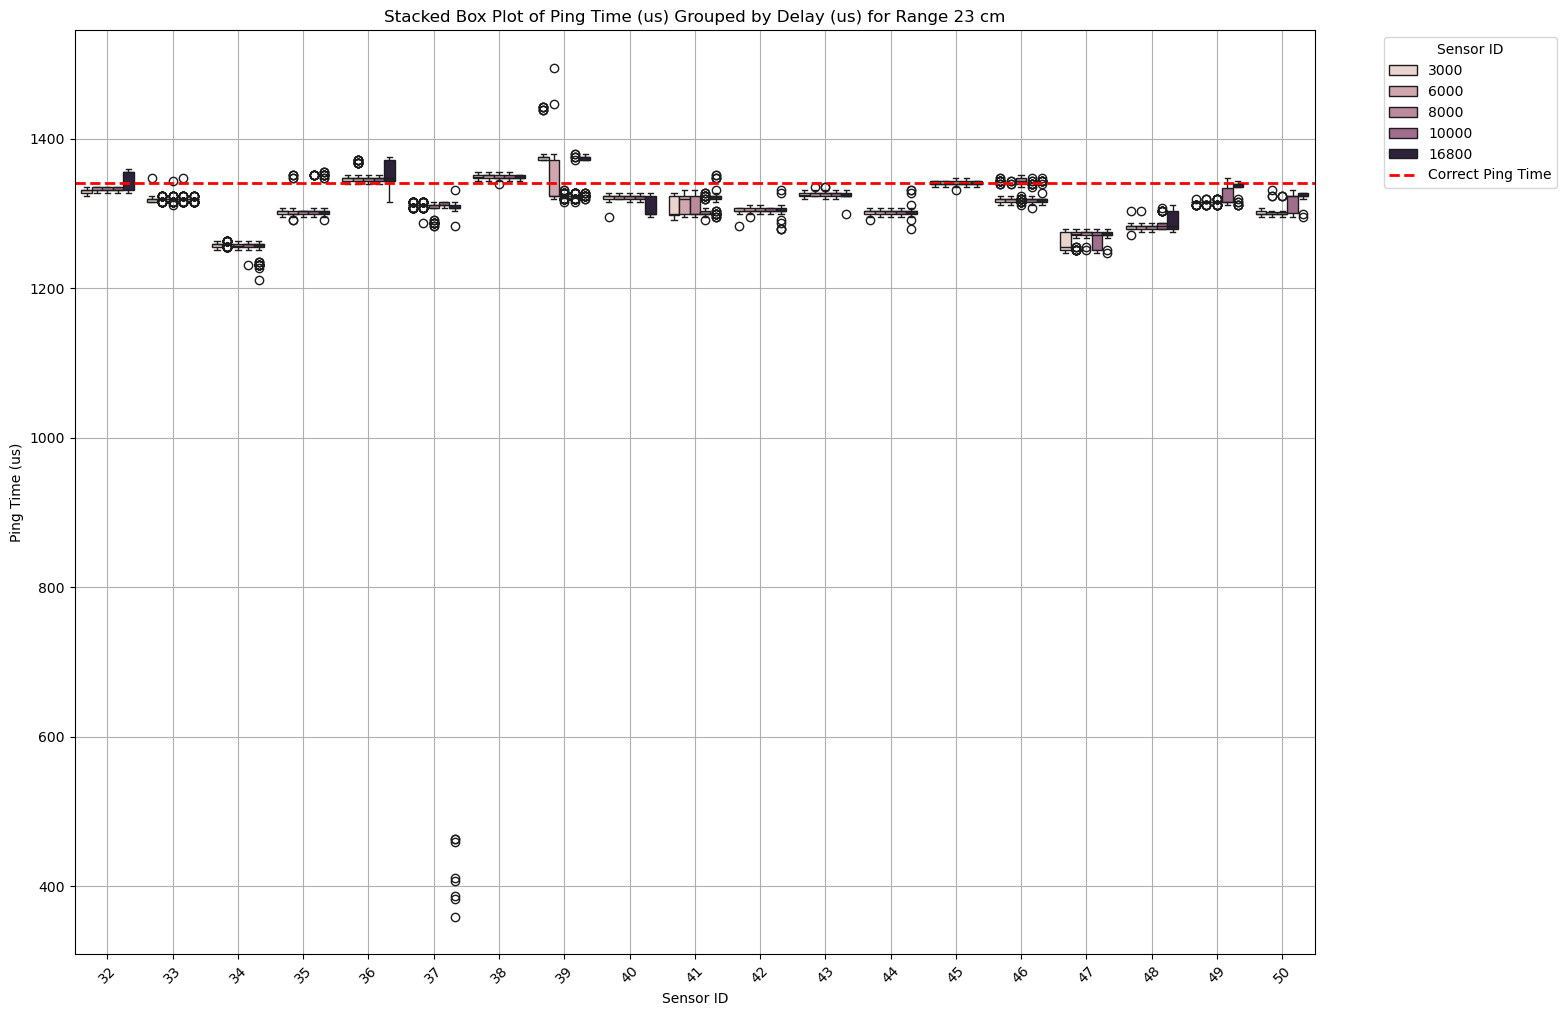

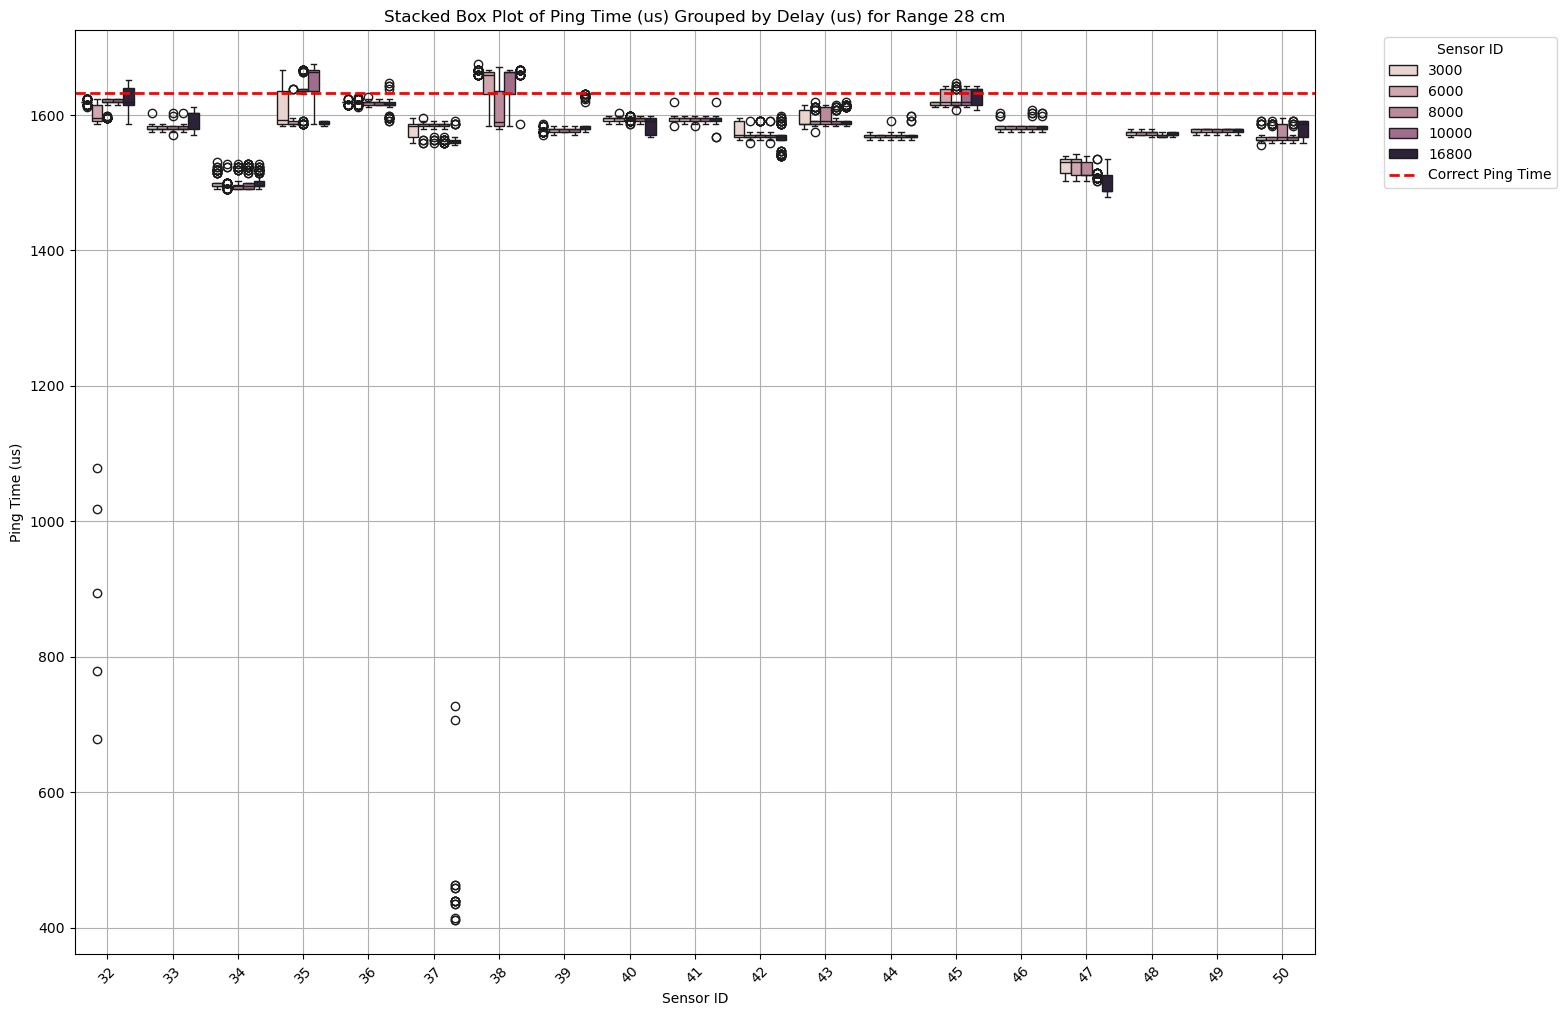

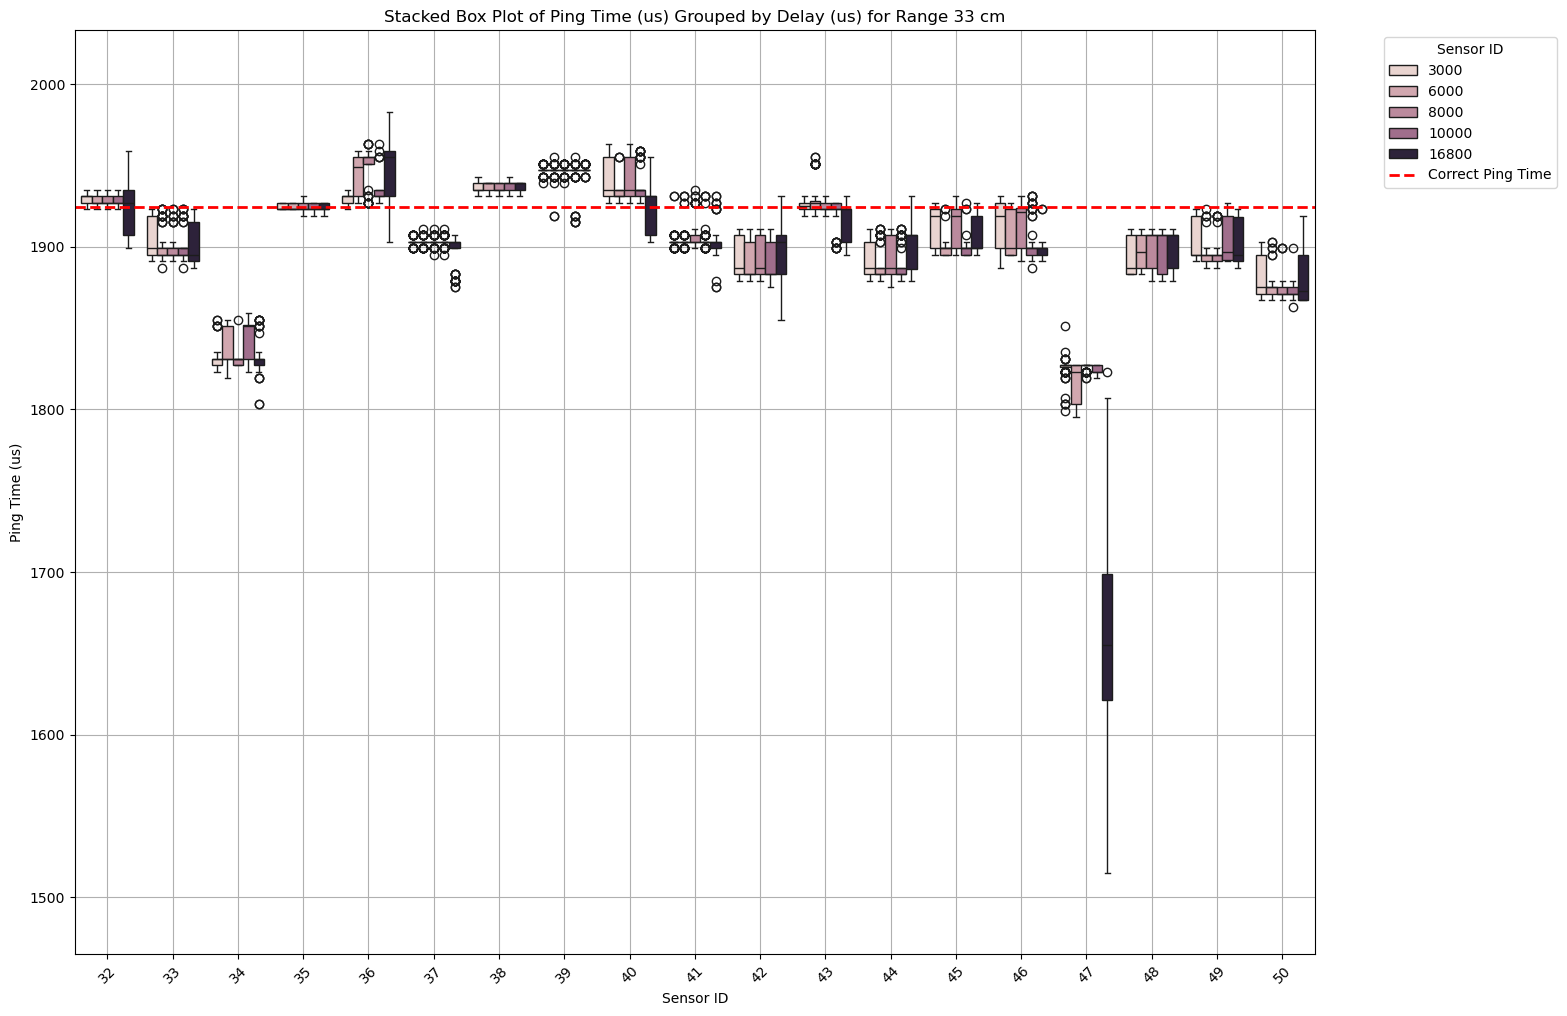

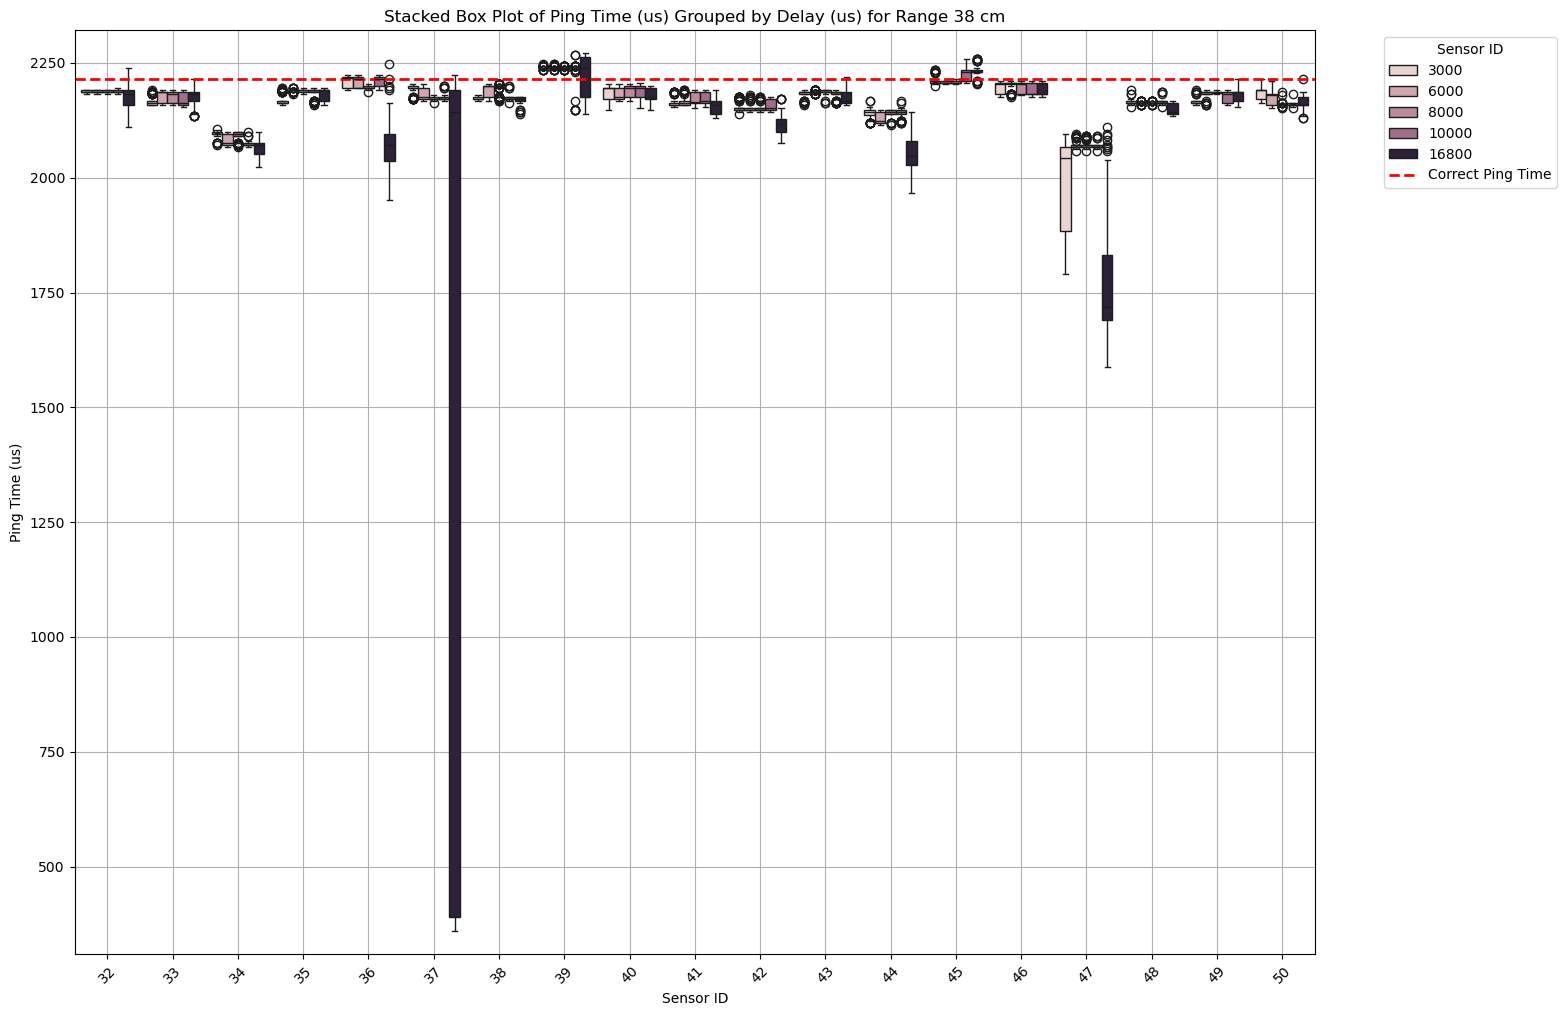

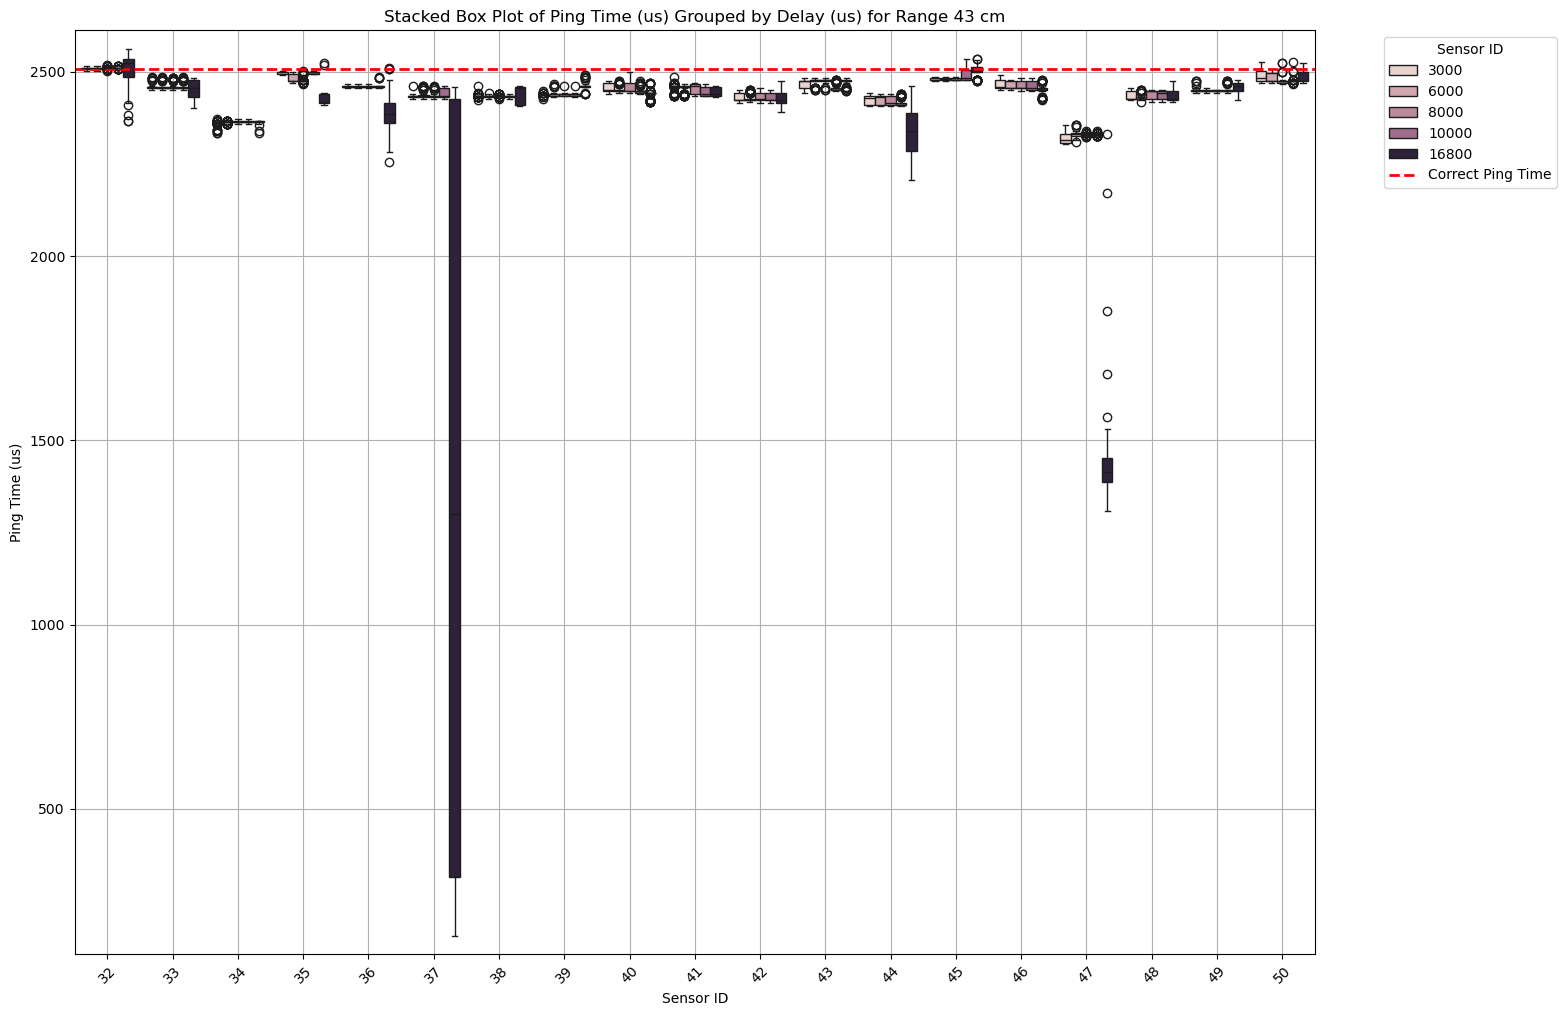

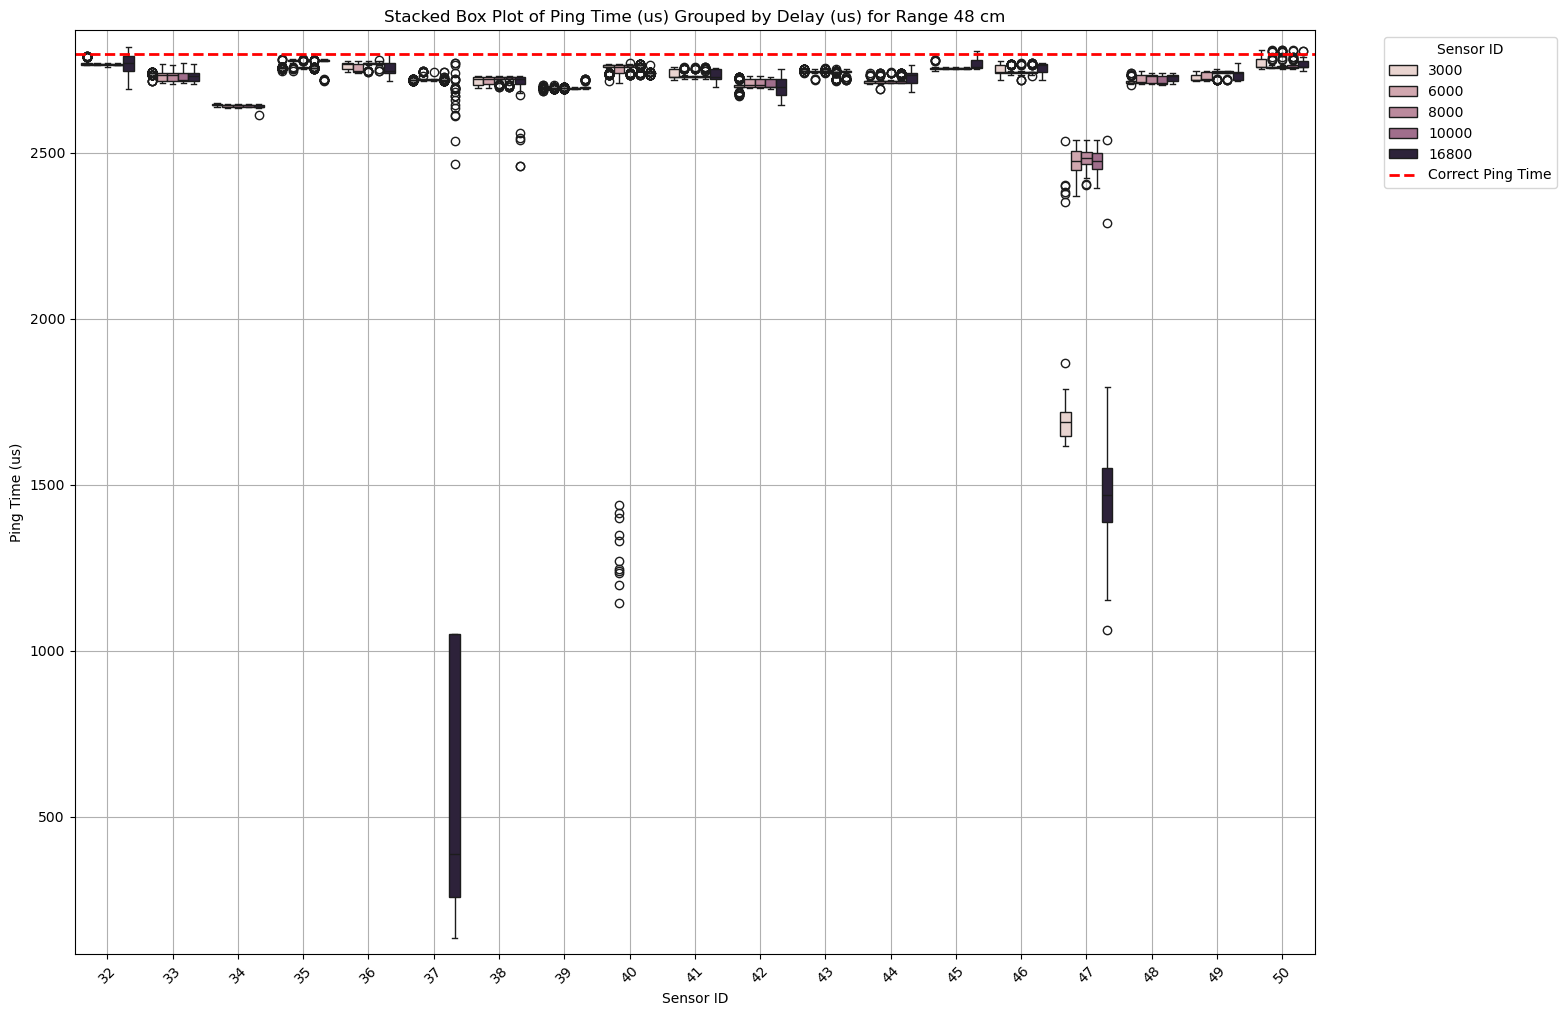

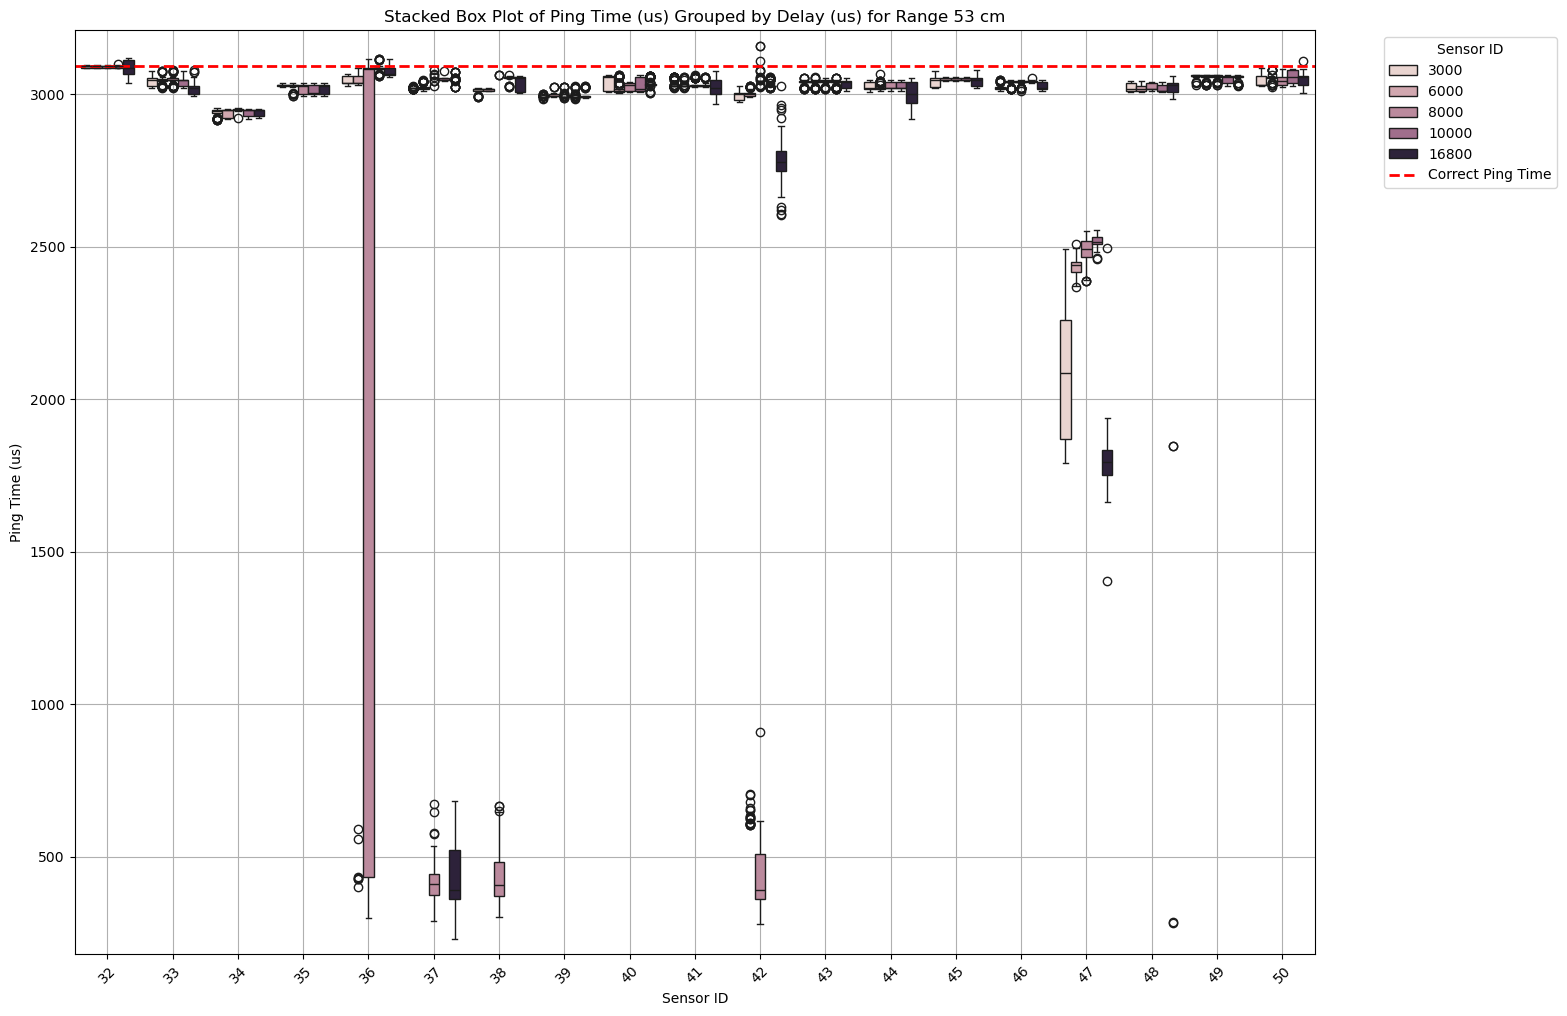

In [138]:
visualize_stacked_box_plots(cleaned_df)

#### Getting data ready


Even though this project has a some aspect of anamoly detection we will separate lower bound and upper bound to do the analysis.

To do so we will use the box plot where it will take lower 25% and upper 25%.

In [139]:
def identify_and_remove_outliers(df, column):
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    df_no_outliers = df[(df[column] >= lower_bound) & (df[column] <= upper_bound)]
    df_outliers_lower = df[(df[column] <= lower_bound)]
    df_outliers_upper = df[(df[column] >= upper_bound)]
    return df_no_outliers,df_outliers_lower,df_outliers_upper

To remove outliers it will be done by groups where we group by 'Sensor ID', 'Delay (us)' and 'Range (cm)'. 
This will treat one stationary data collection done during sequence data collection command as a group and from those group we will identify outliers.

This will ensure fairness of removing process rather than doing as a whole.

In [140]:
# Group the data by 'Sensor ID', 'Delay (us)', and 'Range (cm)'
cleaned_data = cleaned_df.copy()
grouped = cleaned_data.groupby(['Sensor ID', 'Delay (us)', 'Range (cm)'])

# Identify and remove outliers for each group
middle_quartile = []
lower_quartile = []
upper_quartile = []

for name, group in grouped:
    cleaned_group = group.copy()
    for column in ['Ping Time (us)']:
        middle_quartile_group,lower_quartile_group,upper_quartile_group = identify_and_remove_outliers(cleaned_group, column)
    middle_quartile.append(middle_quartile_group)
    lower_quartile.append(lower_quartile_group)
    upper_quartile.append(upper_quartile_group)

In [141]:
# Combine the cleaned groups into a single DataFrame
df_removed_outliers = pd.concat(middle_quartile)
df_outliers_lower = pd.concat(lower_quartile)
df_outliers_upper = pd.concat(upper_quartile)

Result of the split

In [142]:
df_removed_outliers

Trial  Ping Duration  Distance (cm)  Ping Time (us)  Delay (us)  \
500        0           4292          13.46             767        3000   
501        1           4288          13.46             767        3000   
502        2           4280          13.39             763        3000   
503        3           4288          13.32             759        3000   
504        4           4288          13.39             763        3000   
...      ...            ...            ...             ...         ...   
87476     45           4008          54.02            3079       16800   
87477     46           4008          54.09            3083       16800   
87478     47           3972          53.53            3051       16800   
87479     48           4000          54.09            3083       16800   
87480     49           4000          54.02            3079       16800   

         Steps  Arduino ID  Sensor ID  Range (cm)  Sensor length (cm)  ...  \
500    12576.0           1         32          13                 0.8  ...   
501    12576.0           1         32          13                 0.8  ...   
502    12576.0           1         32          13                 0.8  ...   
503    12576.0           1         32          13                 0.8  ...   
504    12576.0           1         32          13                 0.8  ...   
...        ...         ...        ...         ...                 ...  ...   
87476      0.0           1         50          53                 0.8  ...   
87477      0.0           1         50          53                 0.8  ...   
87478      0.0           1         50          53                 0.8  ...   
87479      0.0           1         50          53                 0.8  ...   
87480      0.0           1         50          53                 0.8  ...   

      Angle on XY plane  side a (cm)  side b (cm)  side c (cm)  \
500                   0         18.3         18.3            0   
501                   0         18.3         18.3            0   
502                   0         18.3         18.3            0   
503                   0         18.3         18.3            0   
504                   0         18.3         18.3            0   
...                 ...          ...          ...          ...   
87476                 0         18.3         18.3            0   
87477                 0         18.3         18.3            0   
87478                 0         18.3         18.3            0   
87479                 0         18.3         18.3            0   
87480                 0         18.3         18.3            0   

       Angle on YZ plane  Sensor Configuration Sensor Angle  Surface material  \
500                    0                   HTR           90              wood   
501                    0                   HTR           90              wood   
502                    0                   HTR           90              wood   
503                    0                   HTR           90              wood   
504                    0                   HTR           90              wood   
...                  ...                   ...          ...               ...   
87476                  0                   HTR           90              wood   
87477                  0                   HTR           90              wood   
87478                  0                   HTR           90              wood   
87479                  0                   HTR           90              wood   
87480                  0                   HTR           90              wood   

      Surface Length (cm)  Surface Width (cm)  
500                    31                30.5  
501                    31                30.5  
502                    31                30.5  
503                    31                30.5  
504                    31                30.5  
...                   ...                 ...  
87476                  31                30.5  
87477                  31      

In [143]:
df_outliers_lower

Trial  Ping Duration  Distance (cm)  Ping Time (us)  Delay (us)  \
1234      34           4548          18.37            1047        3000   
2600       0           5144          28.40            1619        3000   
2601       1           5144          28.40            1619        3000   
2602       2           5144          28.40            1619        3000   
2603       3           5136          28.40            1619        3000   
...      ...            ...            ...             ...         ...   
86686      5           3064          37.39            2131       16800   
86688      7           3052          37.46            2135       16800   
86689      8           3056          37.46            2135       16800   
86705     24           3064          37.39            2131       16800   
86707     26           3052          37.46            2135       16800   

         Steps  Arduino ID  Sensor ID  Range (cm)  Sensor length (cm)  ...  \
1234   11266.0           1         32          18                 0.8  ...   
2600    8646.0           1         32          28                 0.8  ...   
2601    8646.0           1         32          28                 0.8  ...   
2602    8646.0           1         32          28                 0.8  ...   
2603    8646.0           1         32          28                 0.8  ...   
...        ...         ...        ...         ...                 ...  ...   
86686   3915.0           1         50          38                 0.8  ...   
86688   3915.0           1         50          38                 0.8  ...   
86689   3915.0           1         50          38                 0.8  ...   
86705   3915.0           1         50          38                 0.8  ...   
86707   3915.0           1         50          38                 0.8  ...   

      Angle on XY plane  side a (cm)  side b (cm)  side c (cm)  \
1234                  0         18.3         18.3            0   
2600                  0         18.3         18.3            0   
2601                  0         18.3         18.3            0   
2602                  0         18.3         18.3            0   
2603                  0         18.3         18.3            0   
...                 ...          ...          ...          ...   
86686                 0         18.3         18.3            0   
86688                 0         18.3         18.3            0   
86689                 0         18.3         18.3            0   
86705                 0         18.3         18.3            0   
86707                 0         18.3         18.3            0   

       Angle on YZ plane  Sensor Configuration Sensor Angle  Surface material  \
1234                   0                   HTR           90              wood   
2600                   0                   HTR           90              wood   
2601                   0                   HTR           90              wood   
2602                   0                   HTR           90              wood   
2603                   0                   HTR           90              wood   
...                  ...                   ...          ...               ...   
86686                  0                   HTR           90              wood   
86688                  0                   HTR           90              wood   
86689                  0                   HTR           90              wood   
86705                  0                   HTR           90              wood   
86707                  0                   HTR           90              wood   

      Surface Length (cm)  Surface Width (cm)  
1234                   31                30.5  
2600                   31                30.5  
2601                   31                30.5  
2602                   31                30.5  
2603                   31                30.5  
...                   ...                 ...  
86686                  31                30.5  
86688                  31      

In [144]:
df_outliers_upper

Trial  Ping Duration  Distance (cm)  Ping Time (us)  Delay (us)  \
2600       0           5144          28.40            1619        3000   
2601       1           5144          28.40            1619        3000   
2602       2           5144          28.40            1619        3000   
2603       3           5136          28.40            1619        3000   
2604       4           5144          28.40            1619        3000   
...      ...            ...            ...             ...         ...   
87275     44          13352          48.89            2787       10000   
86693     12           3132          38.86            2215       16800   
87217     36           3732          49.25            2807       16800   
87229     48           3732          49.25            2807       16800   
87444     13           4020          54.51            3107       16800   

        Steps  Arduino ID  Sensor ID  Range (cm)  Sensor length (cm)  ...  \
2600   8646.0           1         32          28                 0.8  ...   
2601   8646.0           1         32          28                 0.8  ...   
2602   8646.0           1         32          28                 0.8  ...   
2603   8646.0           1         32          28                 0.8  ...   
2604   8646.0           1         32          28                 0.8  ...   
...       ...         ...        ...         ...                 ...  ...   
87275  1305.0           1         50          48                 0.8  ...   
86693  3915.0           1         50          38                 0.8  ...   
87217  1305.0           1         50          48                 0.8  ...   
87229  1305.0           1         50          48                 0.8  ...   
87444     0.0           1         50          53                 0.8  ...   

      Angle on XY plane  side a (cm)  side b (cm)  side c (cm)  \
2600                  0         18.3         18.3            0   
2601                  0         18.3         18.3            0   
2602                  0         18.3         18.3            0   
2603                  0         18.3         18.3            0   
2604                  0         18.3         18.3            0   
...                 ...          ...          ...          ...   
87275                 0         18.3         18.3            0   
86693                 0         18.3         18.3            0   
87217                 0         18.3         18.3            0   
87229                 0         18.3         18.3            0   
87444                 0         18.3         18.3            0   

       Angle on YZ plane  Sensor Configuration Sensor Angle  Surface material  \
2600                   0                   HTR           90              wood   
2601                   0                   HTR           90              wood   
2602                   0                   HTR           90              wood   
2603                   0                   HTR           90              wood   
2604                   0                   HTR           90              wood   
...                  ...                   ...          ...               ...   
87275                  0                   HTR           90              wood   
86693                  0                   HTR           90              wood   
87217                  0                   HTR           90              wood   
87229                  0                   HTR           90              wood   
87444                  0                   HTR           90              wood   

      Surface Length (cm)  Surface Width (cm)  
2600                   31                30.5  
2601                   31                30.5  
2602                   31                30.5  
2603                   31                30.5  
2604                   31                30.5  
...                   ...                 ...  
87275                  31                30.5  
86693                  31                30

#### Visualize Effect of delay and range

This will show how middle quartile where there are no outliers would portray similar shape of graphs. 

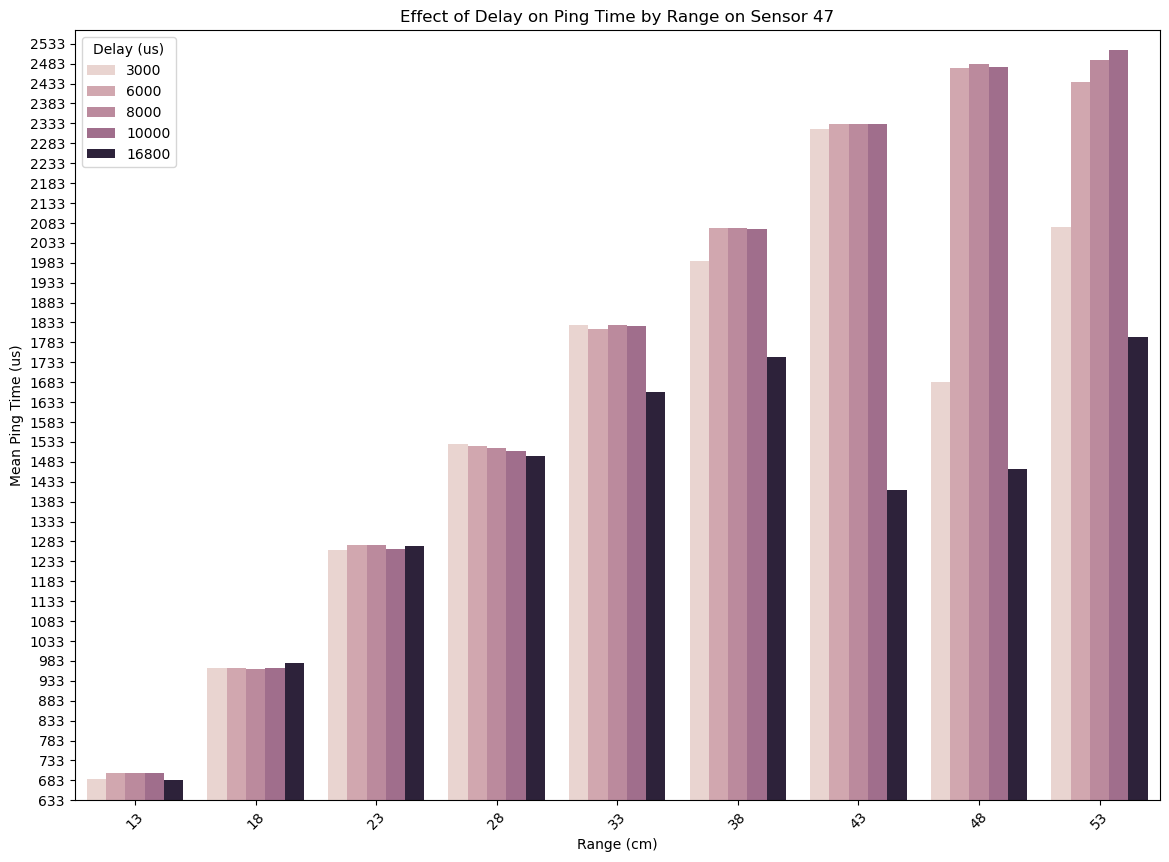

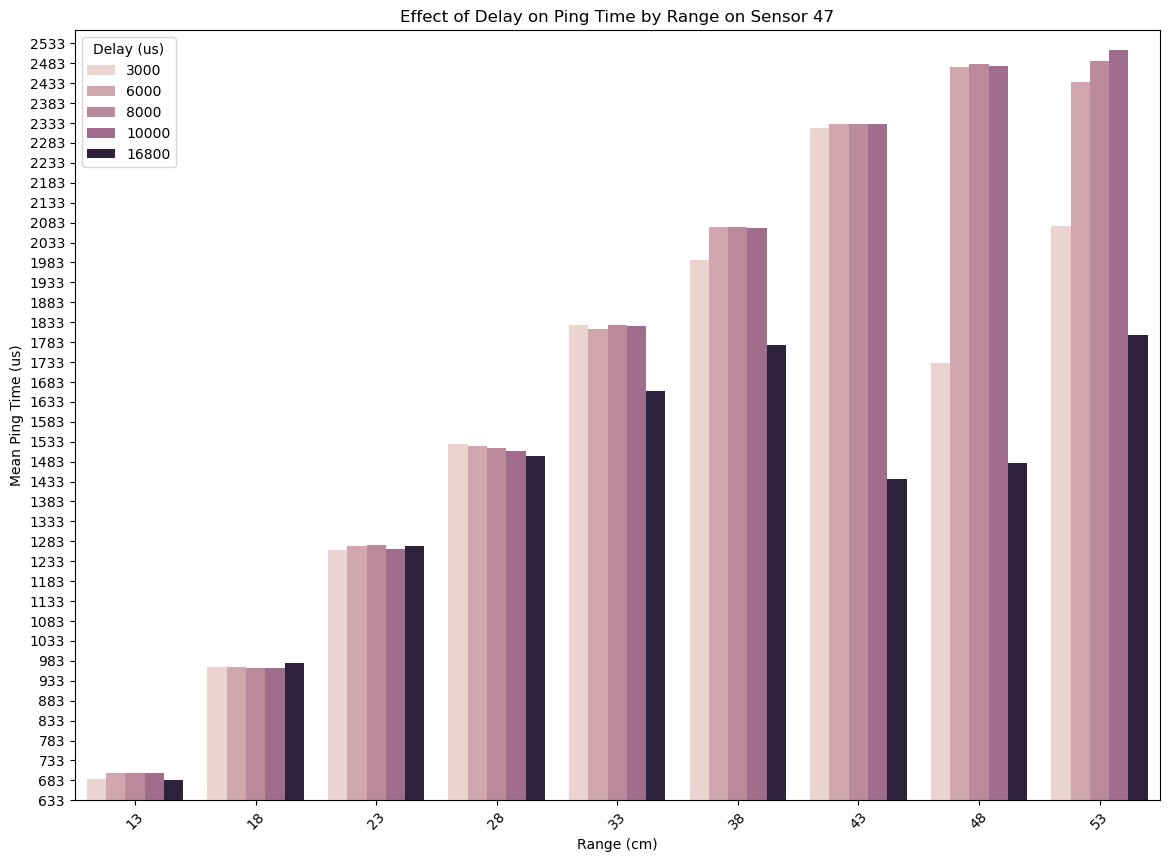

In [151]:
# visualize sensor 1
visualize_effect_on_ping_time_sensors(df_removed_outliers,47)
visualize_effect_on_ping_time_sensors(cleaned_df,47)

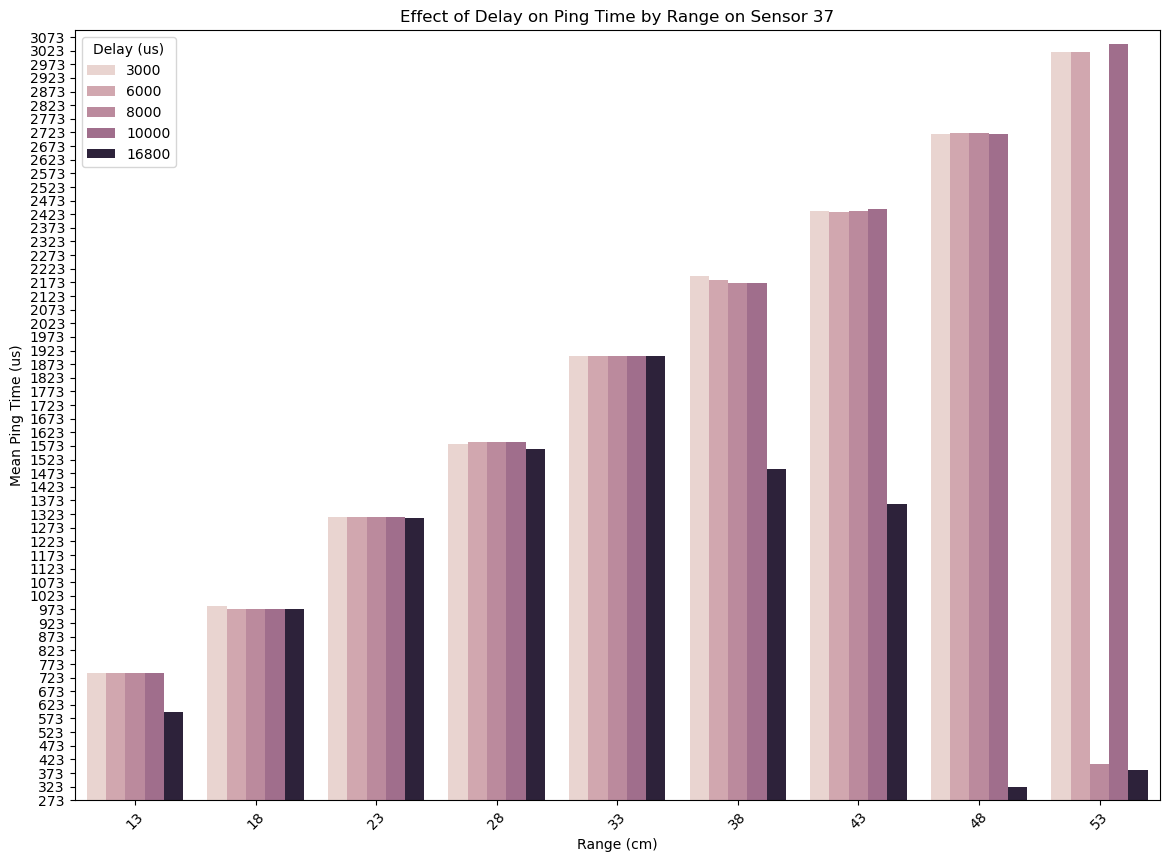

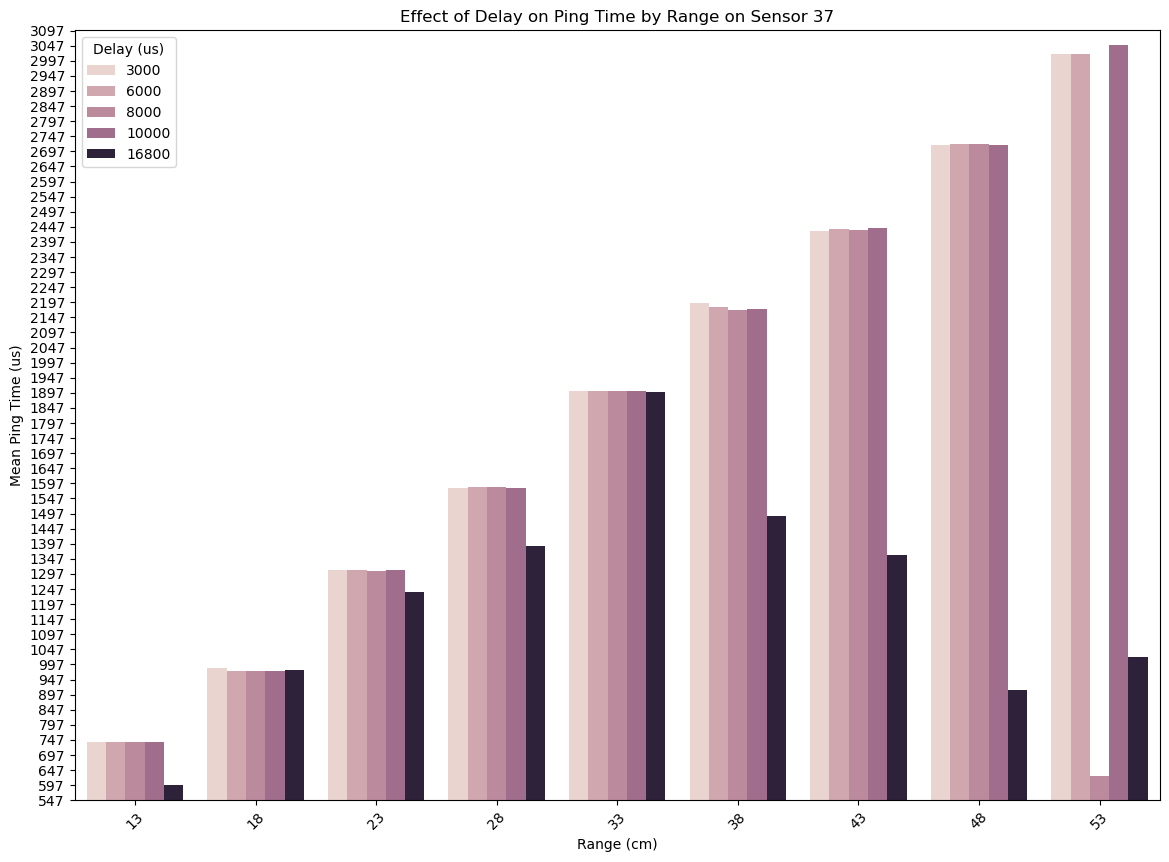

In [152]:
# visualize sensor 2
visualize_effect_on_ping_time_sensors(df_removed_outliers,37)
visualize_effect_on_ping_time_sensors(cleaned_df,37)

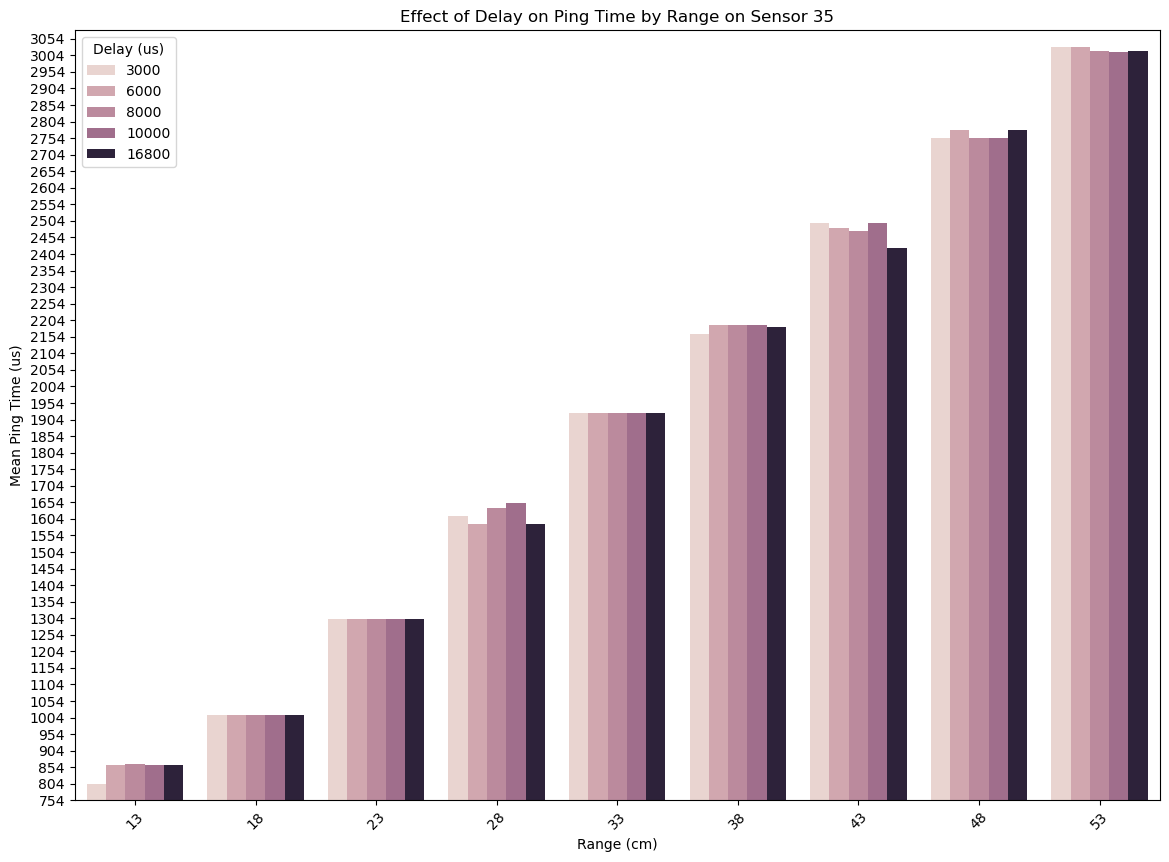

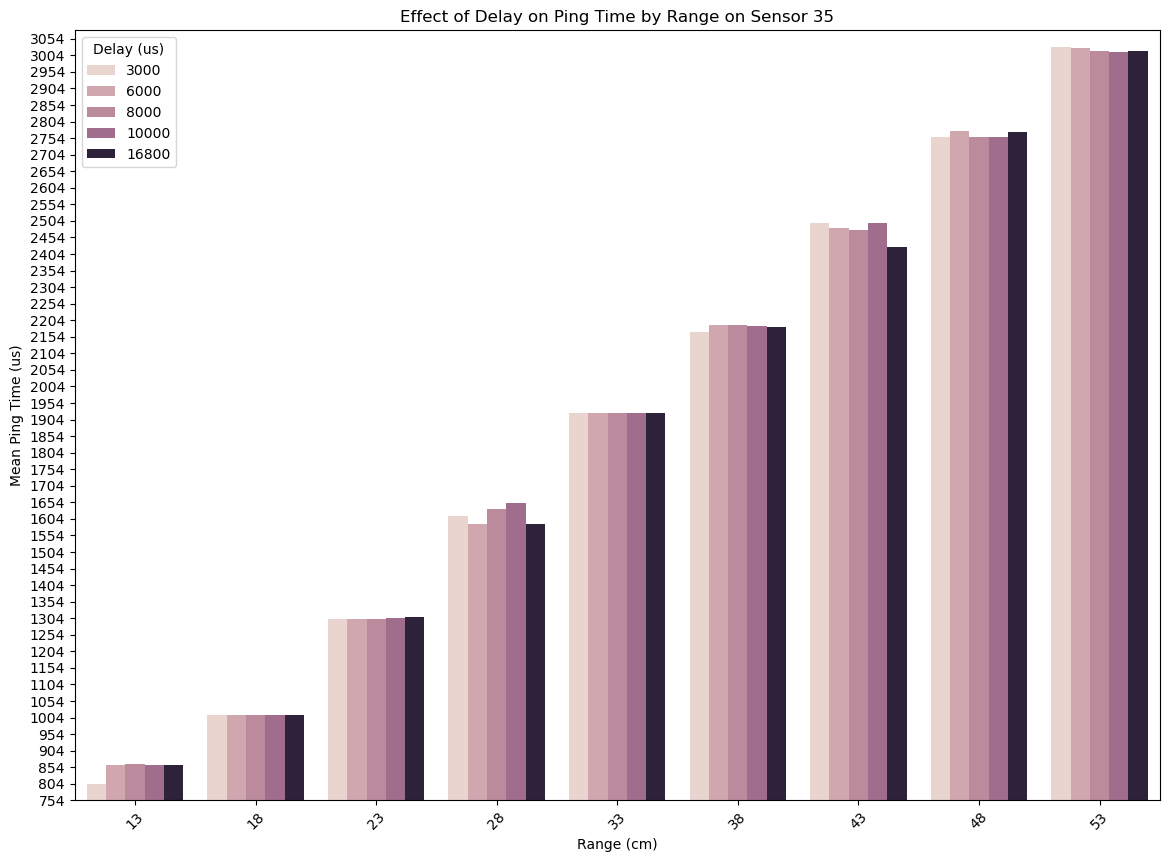

In [153]:
visualize_effect_on_ping_time_sensors(df_removed_outliers,35)
visualize_effect_on_ping_time_sensors(cleaned_df,35)

Removing the upper and lower bound didn't really affect much. However they marginalize it better

In [155]:
visualize_lineplot_ping_time_with_variability(df_removed_outliers)

So it cuts out variability but some still has it. this lead us to investigate lower and upper bounds 

### Investigate lower and upper bounds

From this analysis we will see if they will express characters

In [46]:
df_outliers_lower

Trial  Ping Duration  Distance (cm)  Ping Time (us)  Delay (us)  \
1396      96           3520          18.09            1031        2000   
2756      56           4112          28.26            1611        2000   
4100       0           4692          38.37            2187        2000   
4101       1           4700          38.37            2187        2000   
4102       2           4696          38.37            2187        2000   
...      ...            ...            ...             ...         ...   
86686      5           3064          37.39            2131       16800   
86688      7           3052          37.46            2135       16800   
86689      8           3056          37.46            2135       16800   
86705     24           3064          37.39            2131       16800   
86707     26           3052          37.46            2135       16800   

         Steps  Arduino ID  Sensor ID  Range (cm)  Sensor length (cm)  \
1396   11266.0           1         32          18                 0.8   
2756    8646.0           1         32          28                 0.8   
4100    6550.0           1         32          38                 0.8   
4101    6550.0           1         32          38                 0.8   
4102    6550.0           1         32          38                 0.8   
...        ...         ...        ...         ...                 ...   
86686   3915.0           1         50          38                 0.8   
86688   3915.0           1         50          38                 0.8   
86689   3915.0           1         50          38                 0.8   
86705   3915.0           1         50          38                 0.8   
86707   3915.0           1         50          38                 0.8   

       Angle on XY plane  side a (cm)  side b (cm)  side c (cm)  \
1396                   0         18.3         18.3            0   
2756                   0         18.3         18.3            0   
4100                   0         18.3         18.3            0   
4101                   0         18.3         18.3            0   
4102                   0         18.3         18.3            0   
...                  ...          ...          ...          ...   
86686                  0         18.3         18.3            0   
86688                  0         18.3         18.3            0   
86689                  0         18.3         18.3            0   
86705                  0         18.3         18.3            0   
86707                  0         18.3         18.3            0   

       Angle on YZ plane Sensor Configuration  Sensor Angle Surface material  \
1396                   0                  HTR            90             wood   
2756                   0                  HTR            90             wood   
4100                   0                  HTR            90             wood   
4101                   0                  HTR            90             wood   
4102                   0                  HTR            90             wood   
...                  ...                  ...           ...              ...   
86686                  0                  HTR            90             wood   
86688                  0                  HTR            90             wood   
86689                  0                  HTR            90             wood   
86705                  0                  HTR            90             wood   
86707                  0                  HTR            90             wood   

       Surface Length (cm)  Surface Width (cm)  
1396                    31                30.5  
2756                    31                30.5  
4100                    31                30.5  
4101                    31                30.5  
4102                    31                30.5  
...                    ...                 ...  
86686                   31                30.5  
86688                   31                30.5  
86689                   31        

In [47]:
df_outliers_upper

Trial  Ping Duration  Distance (cm)  Ping Time (us)  Delay (us)  \
2009       9           3860          23.77            1355        2000   
2010      10           3864          23.77            1355        2000   
2014      14           3860          23.77            1355        2000   
2015      15           3864          23.77            1355        2000   
2016      16           3868          23.84            1359        2000   
...      ...            ...            ...             ...         ...   
87275     44          13352          48.89            2787       10000   
86693     12           3132          38.86            2215       16800   
87217     36           3732          49.25            2807       16800   
87229     48           3732          49.25            2807       16800   
87444     13           4020          54.51            3107       16800   

        Steps  Arduino ID  Sensor ID  Range (cm)  Sensor length (cm)  \
2009   9956.0           1         32          23                 0.8   
2010   9956.0           1         32          23                 0.8   
2014   9956.0           1         32          23                 0.8   
2015   9956.0           1         32          23                 0.8   
2016   9956.0           1         32          23                 0.8   
...       ...         ...        ...         ...                 ...   
87275  1305.0           1         50          48                 0.8   
86693  3915.0           1         50          38                 0.8   
87217  1305.0           1         50          48                 0.8   
87229  1305.0           1         50          48                 0.8   
87444     0.0           1         50          53                 0.8   

       Angle on XY plane  side a (cm)  side b (cm)  side c (cm)  \
2009                   0         18.3         18.3            0   
2010                   0         18.3         18.3            0   
2014                   0         18.3         18.3            0   
2015                   0         18.3         18.3            0   
2016                   0         18.3         18.3            0   
...                  ...          ...          ...          ...   
87275                  0         18.3         18.3            0   
86693                  0         18.3         18.3            0   
87217                  0         18.3         18.3            0   
87229                  0         18.3         18.3            0   
87444                  0         18.3         18.3            0   

       Angle on YZ plane Sensor Configuration  Sensor Angle Surface material  \
2009                   0                  HTR            90             wood   
2010                   0                  HTR            90             wood   
2014                   0                  HTR            90             wood   
2015                   0                  HTR            90             wood   
2016                   0                  HTR            90             wood   
...                  ...                  ...           ...              ...   
87275                  0                  HTR            90             wood   
86693                  0                  HTR            90             wood   
87217                  0                  HTR            90             wood   
87229                  0                  HTR            90             wood   
87444                  0                  HTR            90             wood   

       Surface Length (cm)  Surface Width (cm)  
2009                    31                30.5  
2010                    31                30.5  
2014                    31                30.5  
2015                    31                30.5  
2016                    31                30.5  
...                    ...                 ...  
87275                   31                30.5  
86693                   31                30.5  
87217                   31                30.5

#### Visualize the lower bound and upper bound effect on ping time

First we will look at the effect on ping time graph

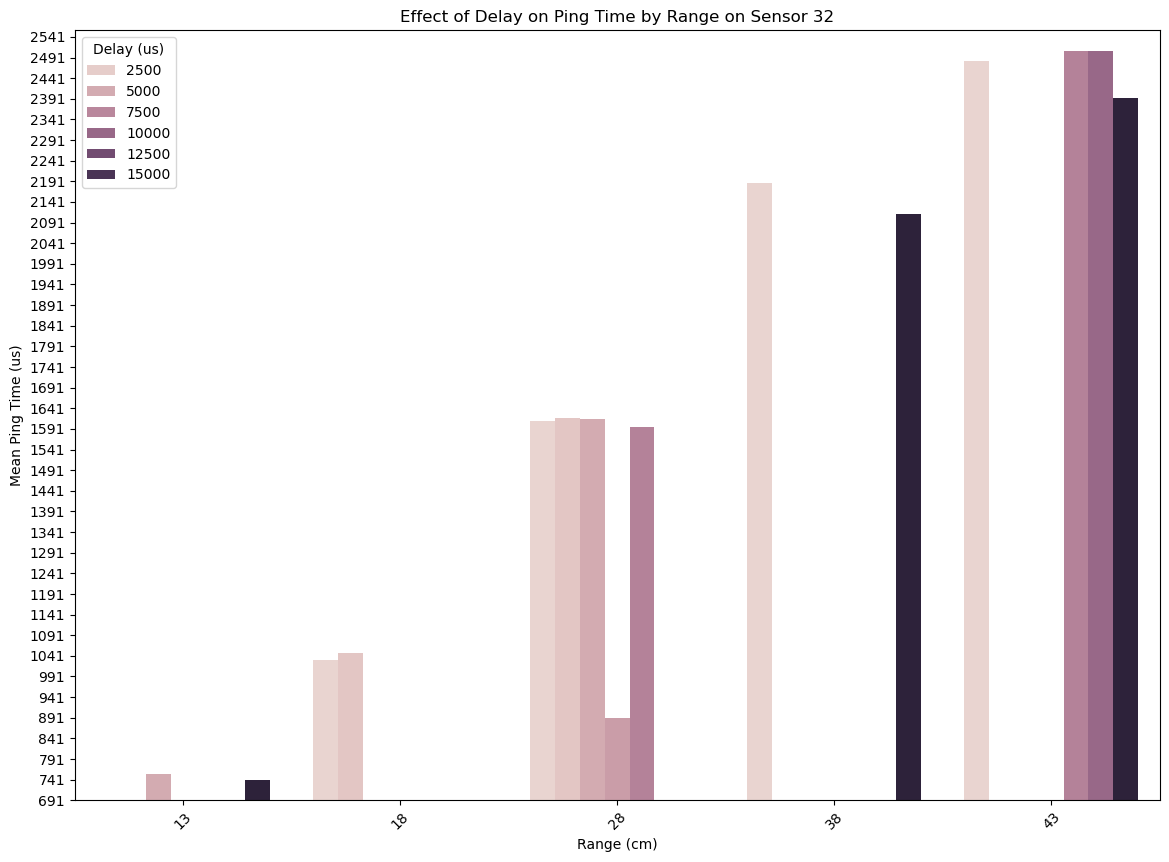

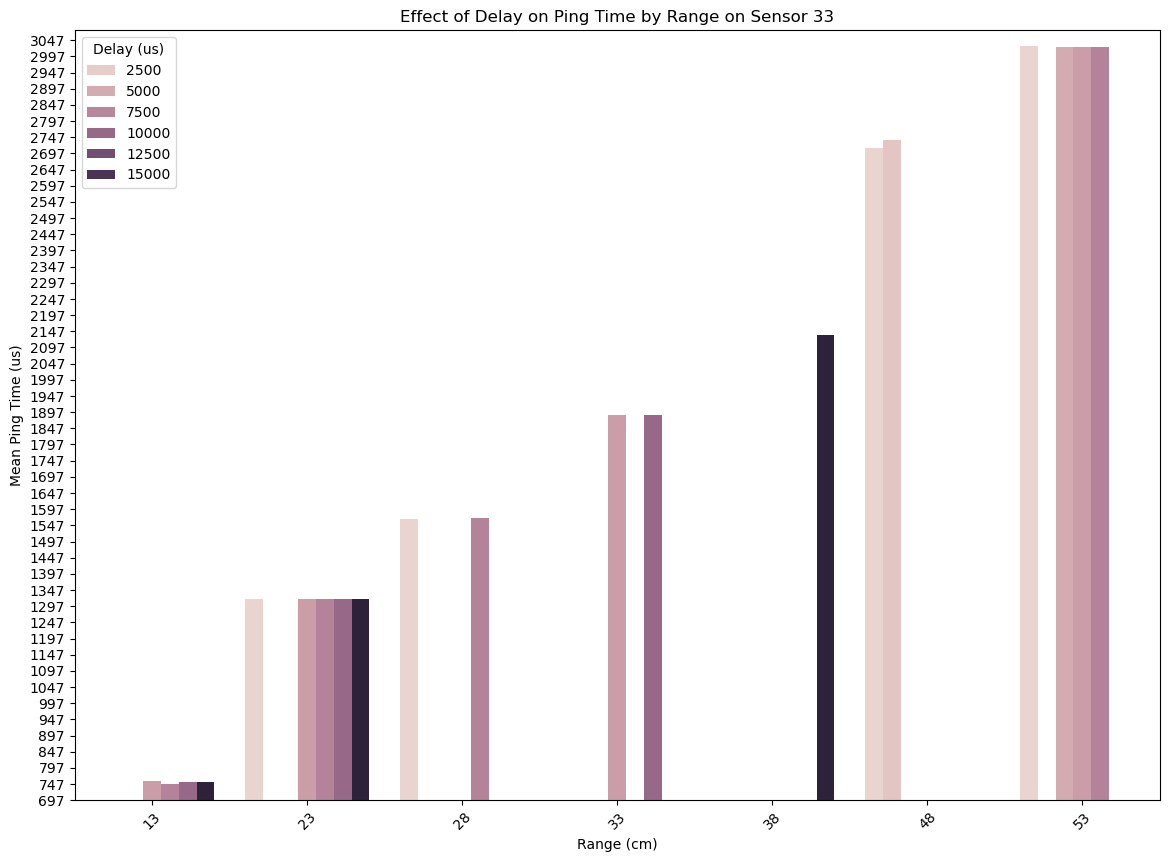

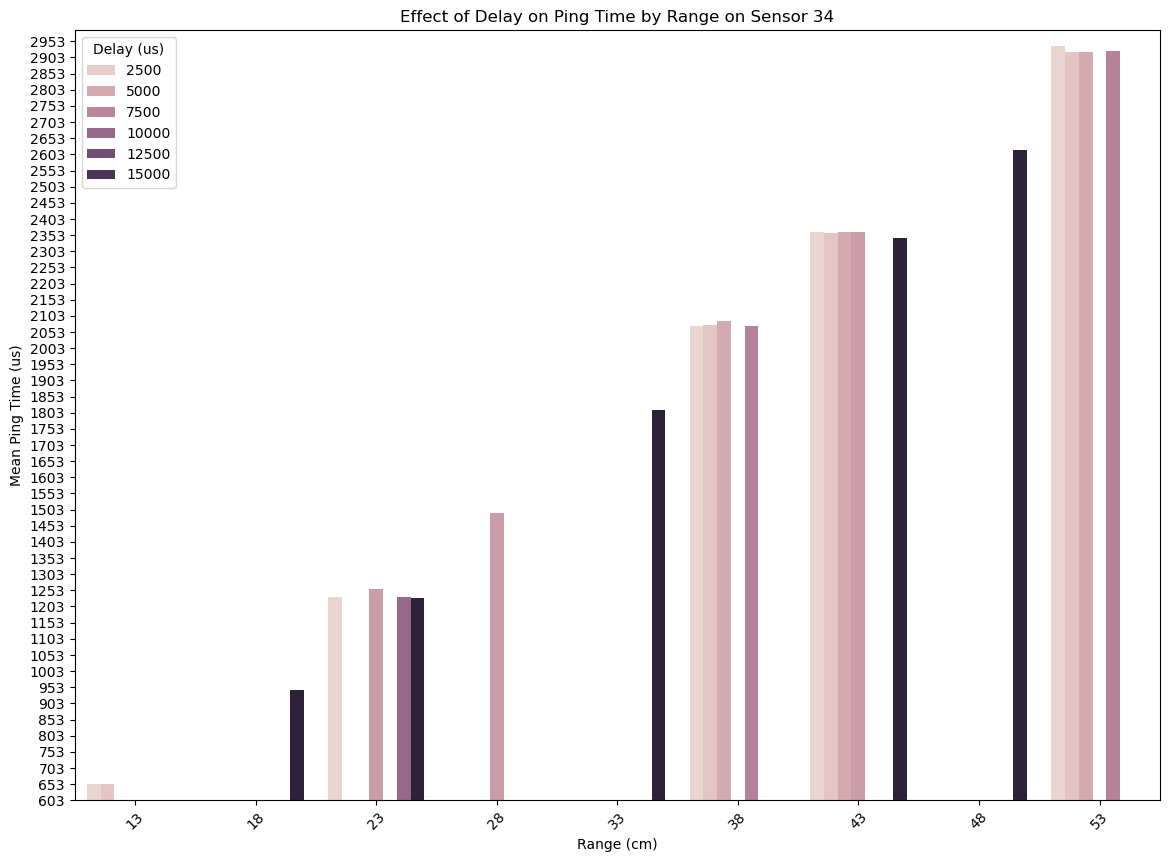

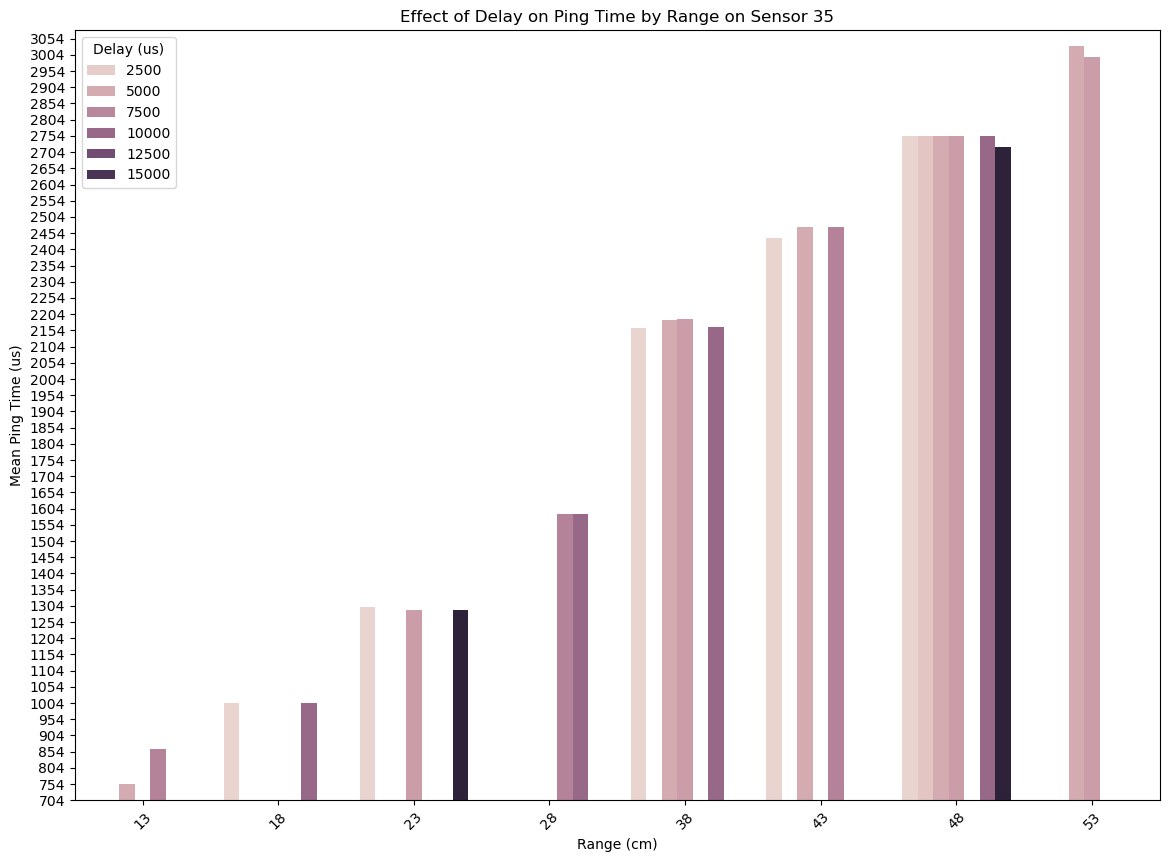

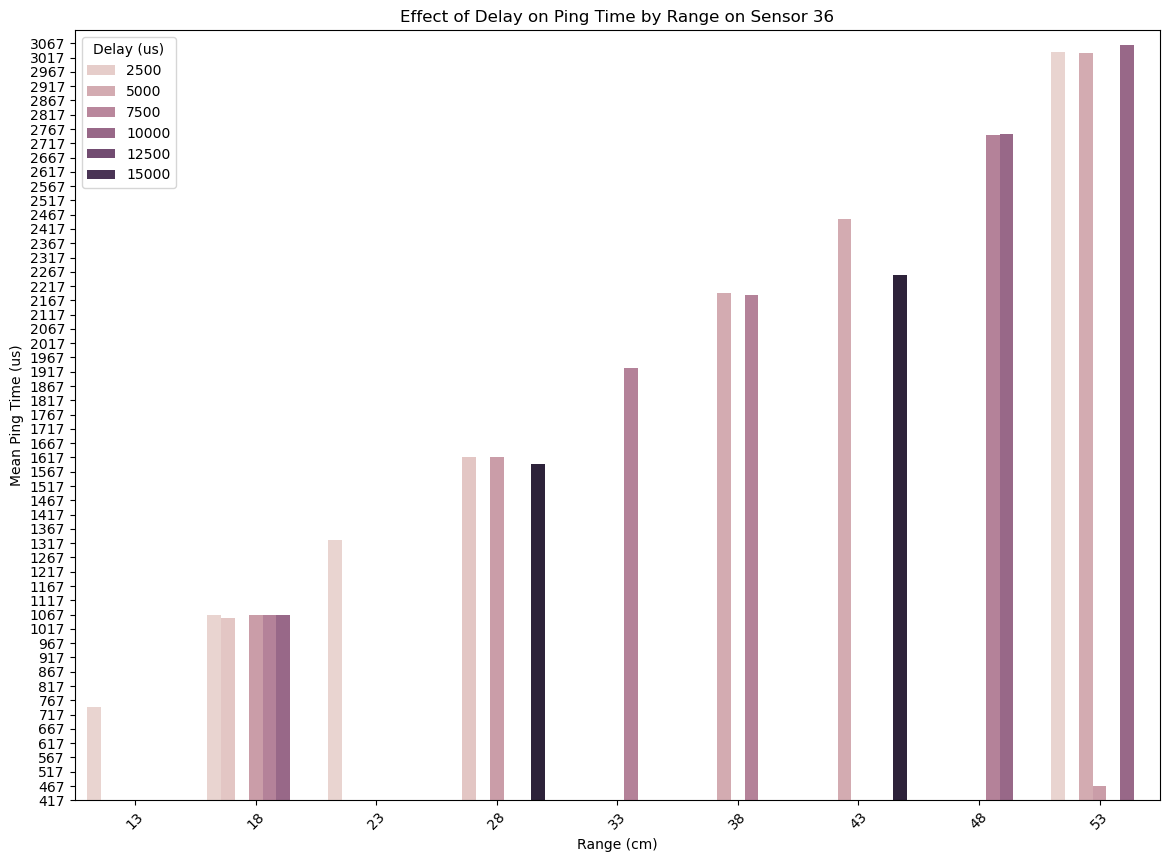

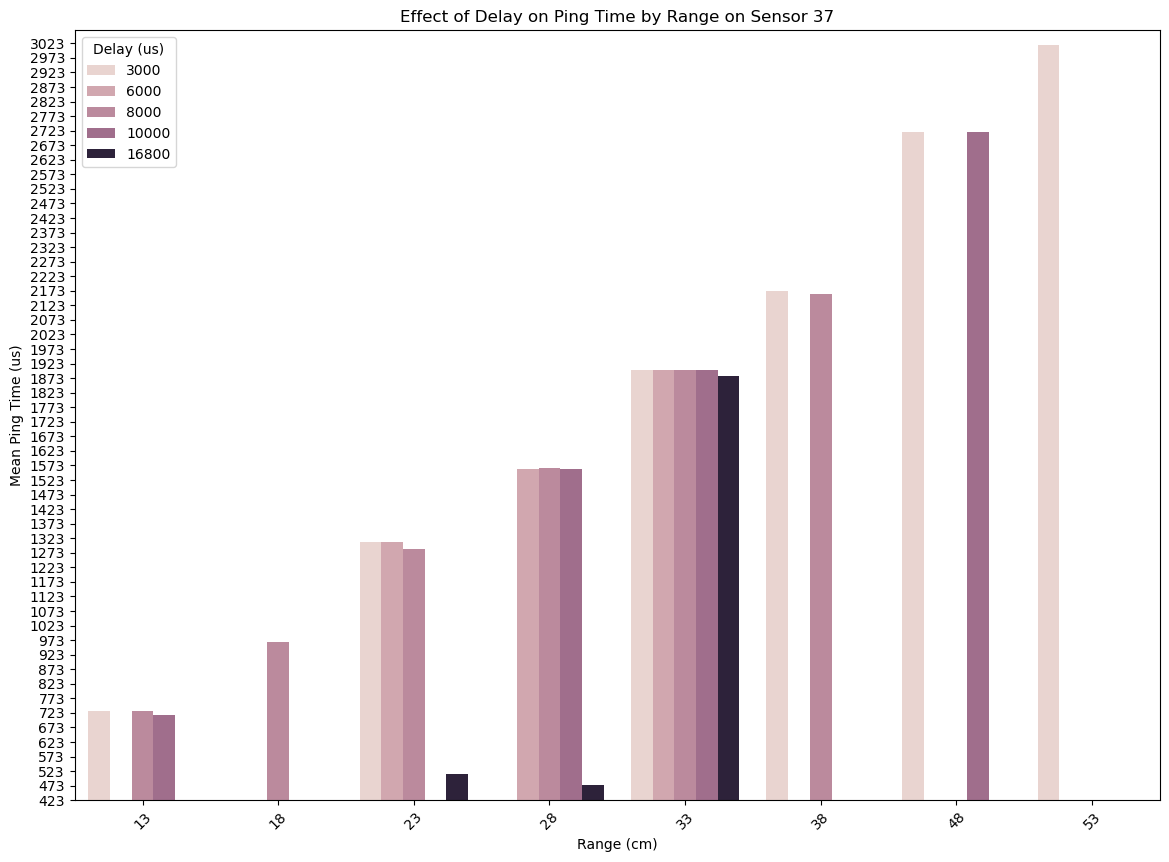

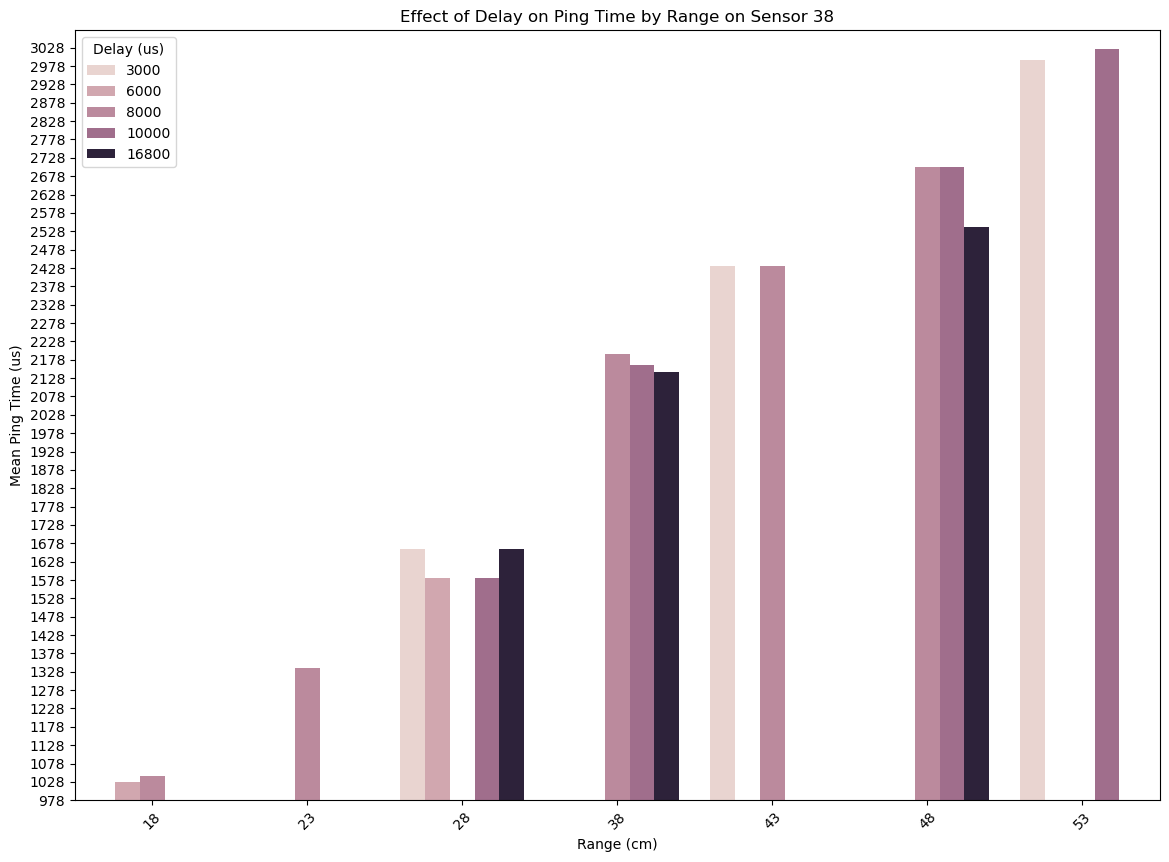

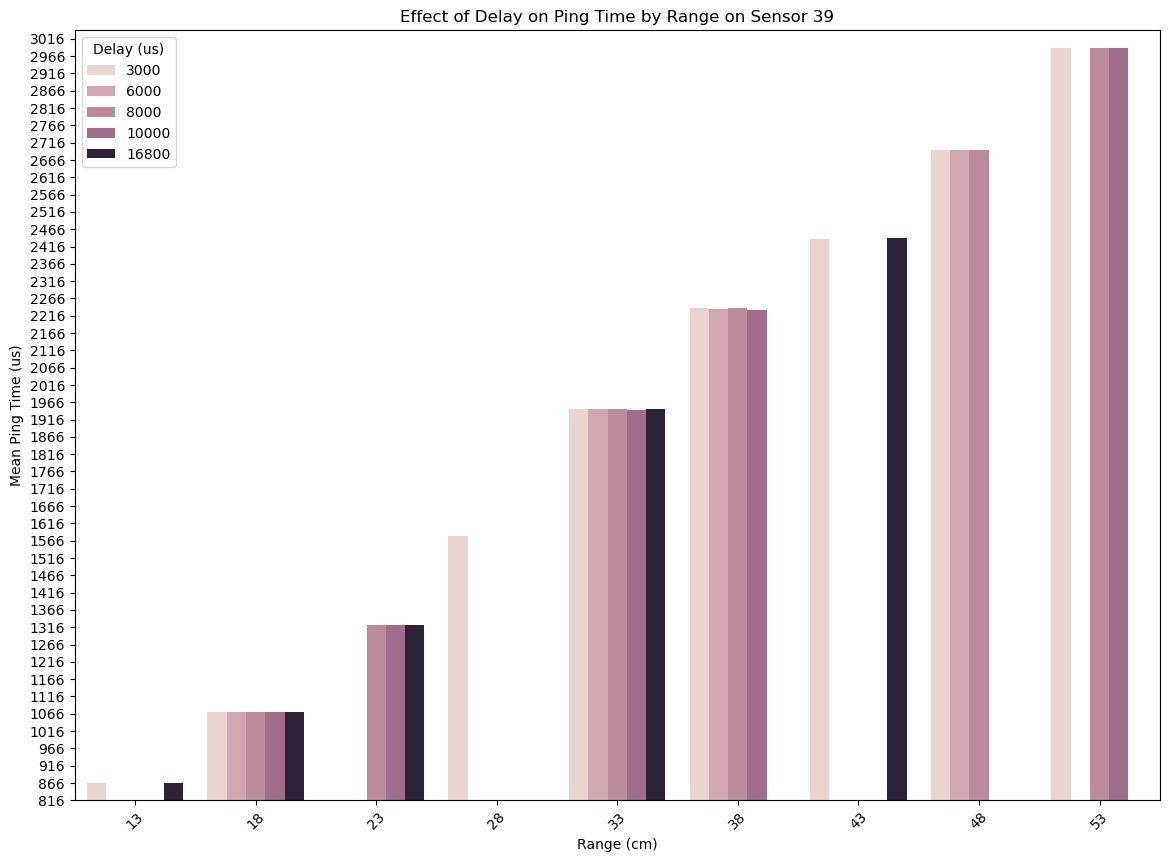

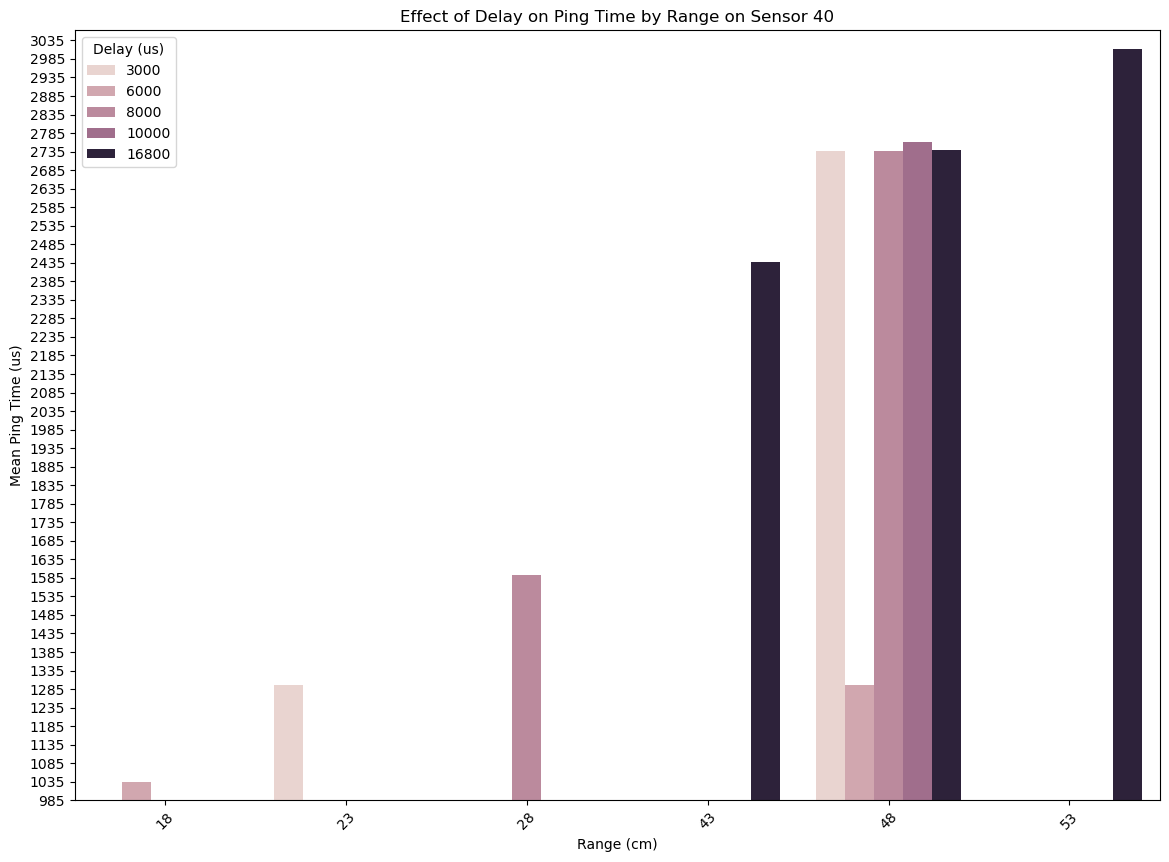

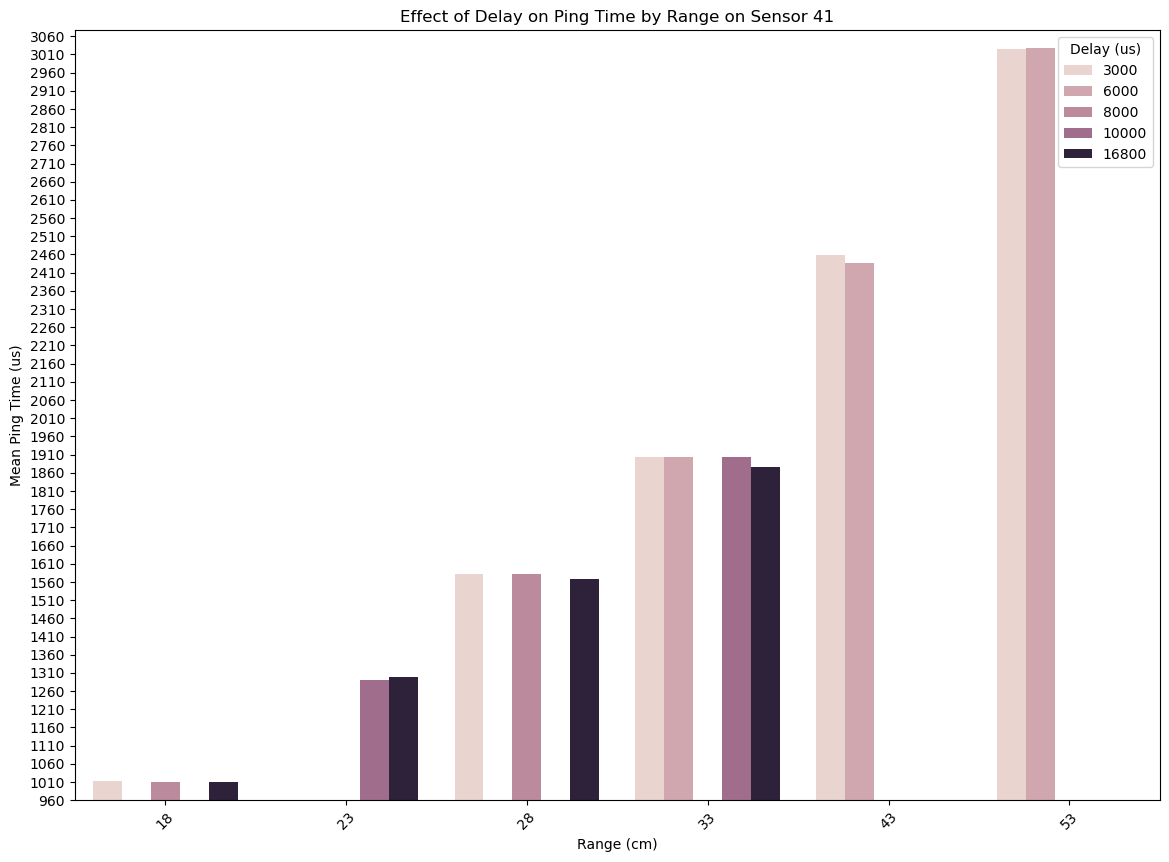

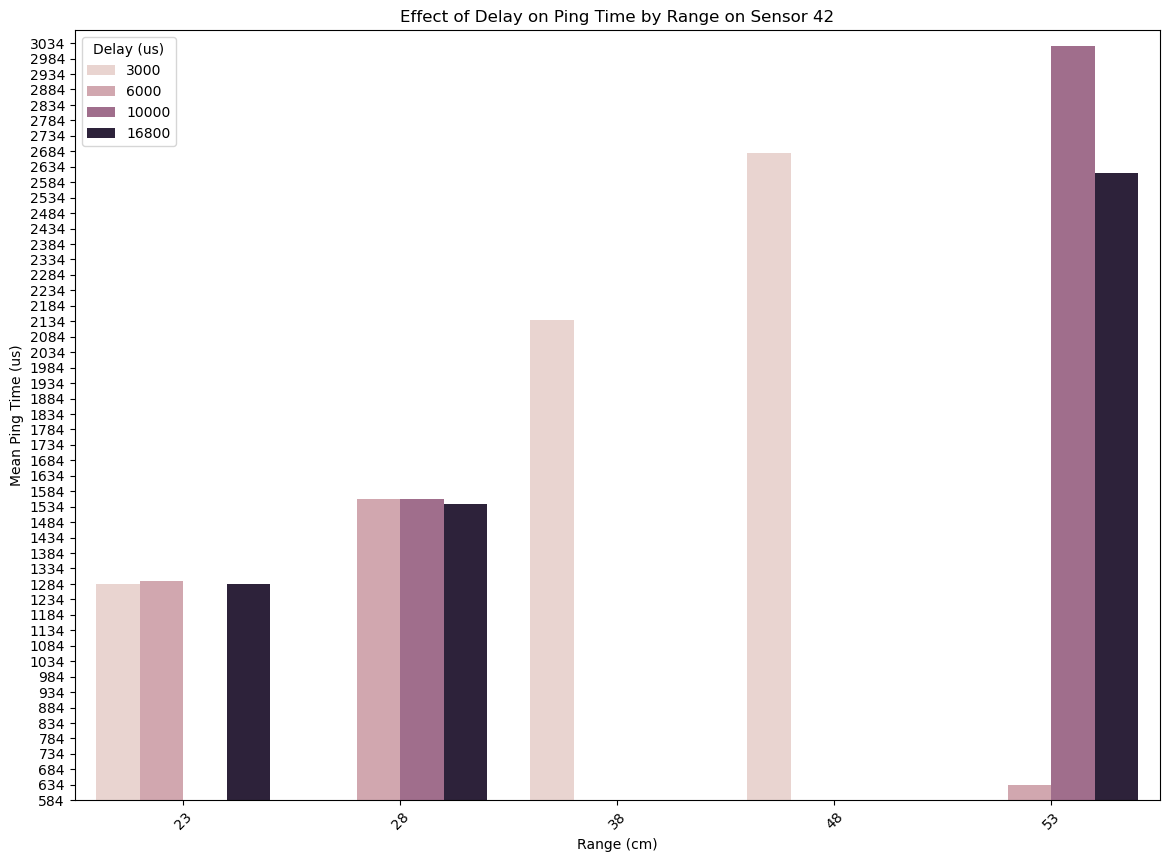

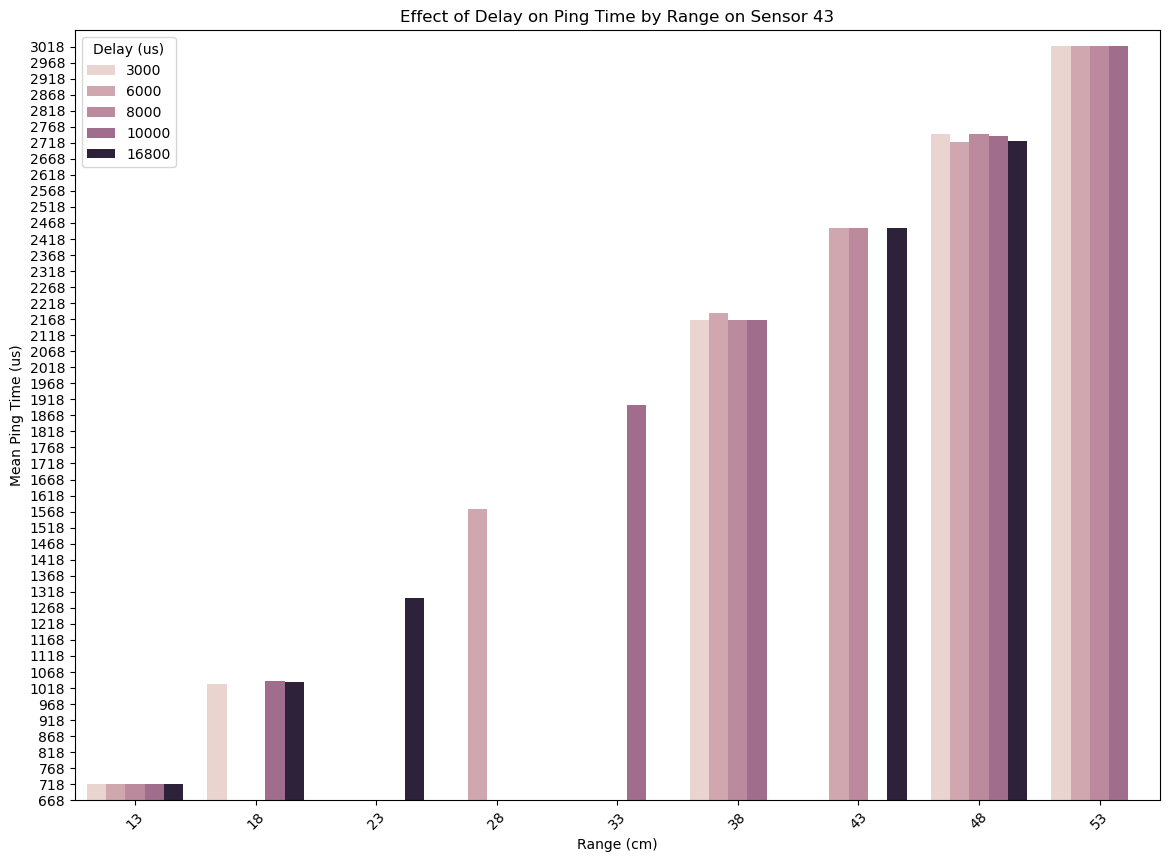

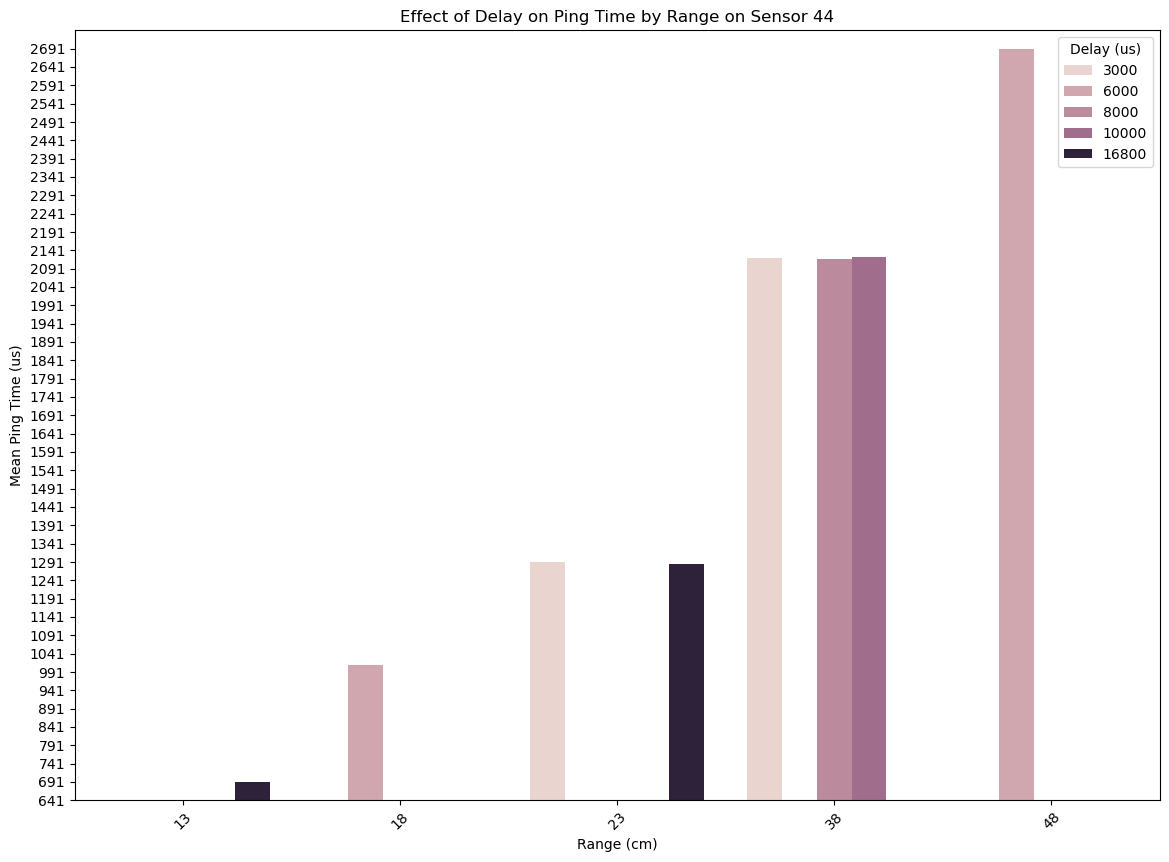

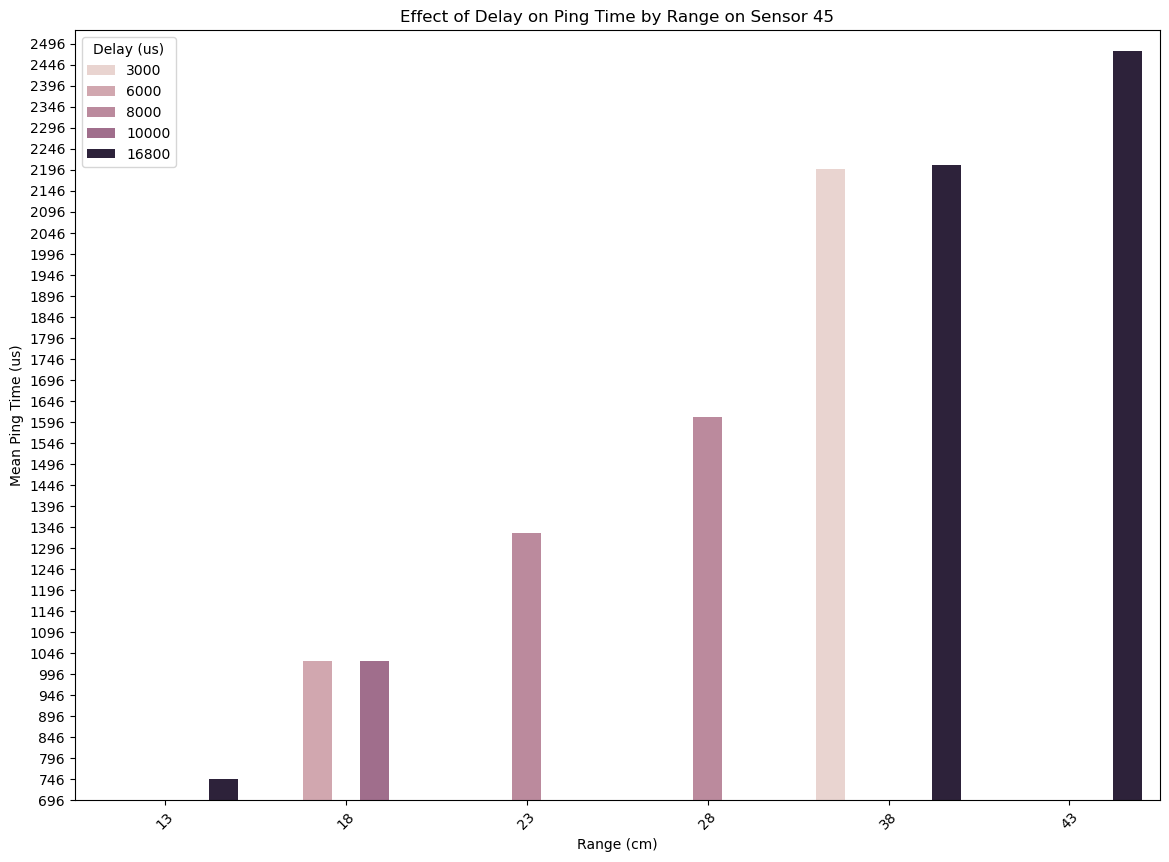

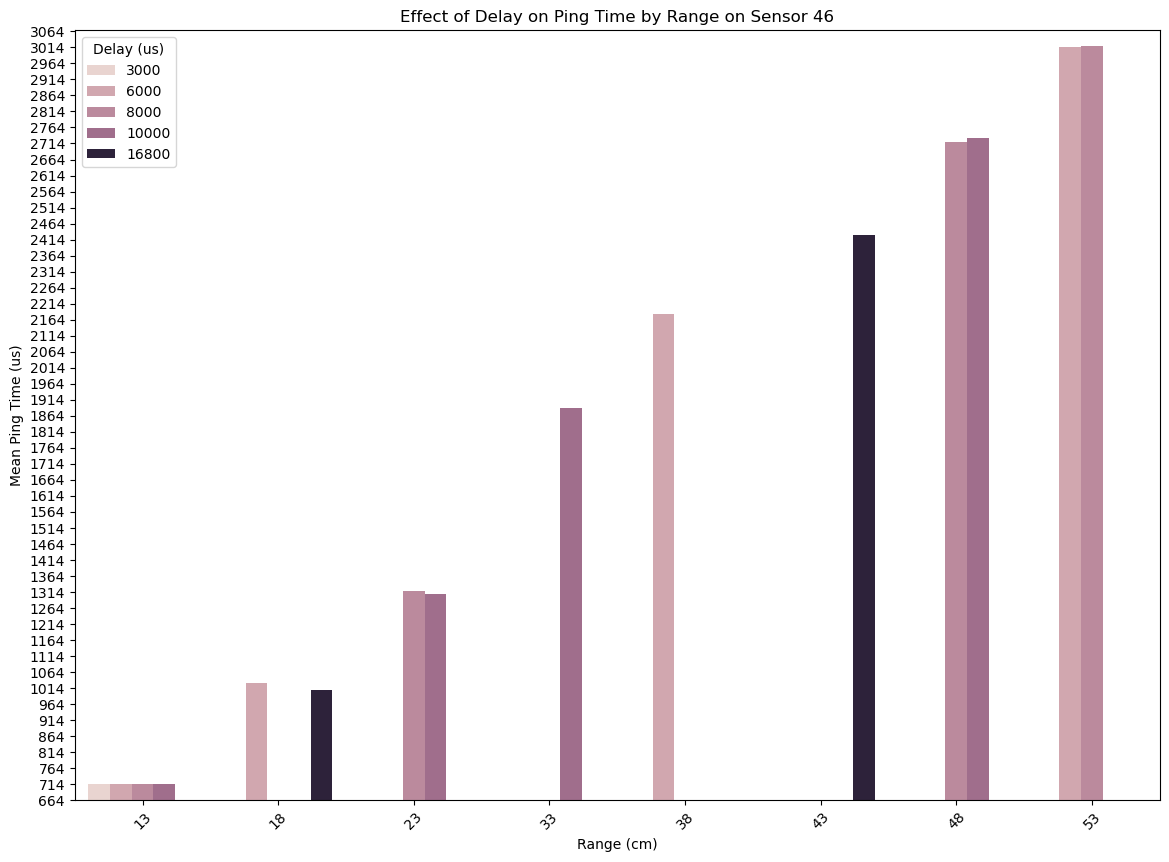

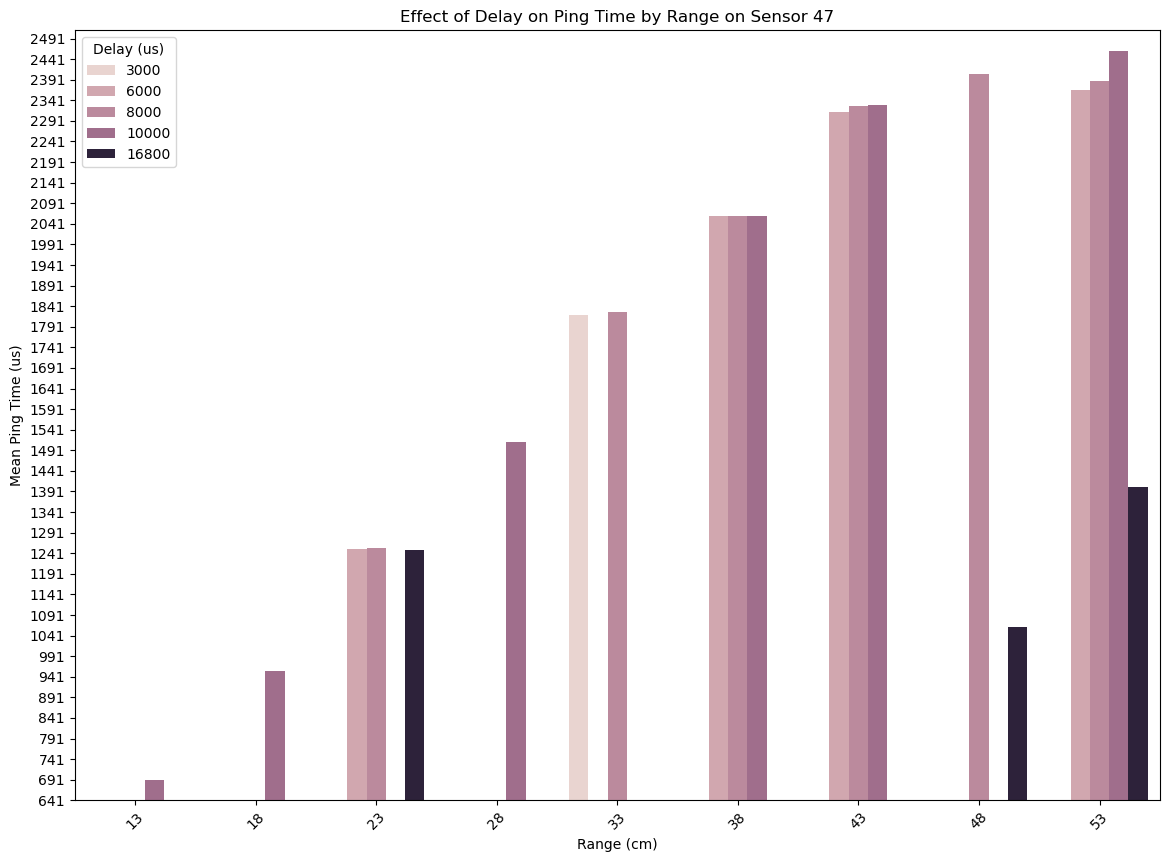

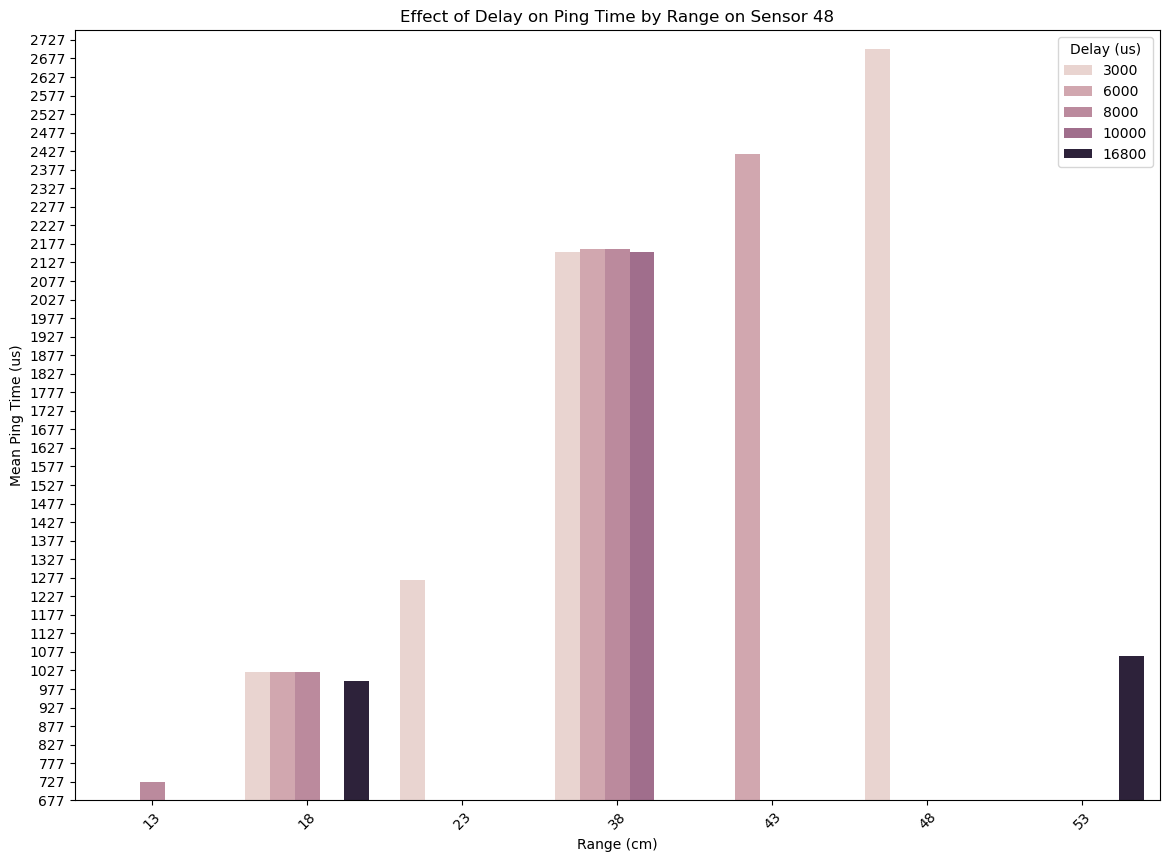

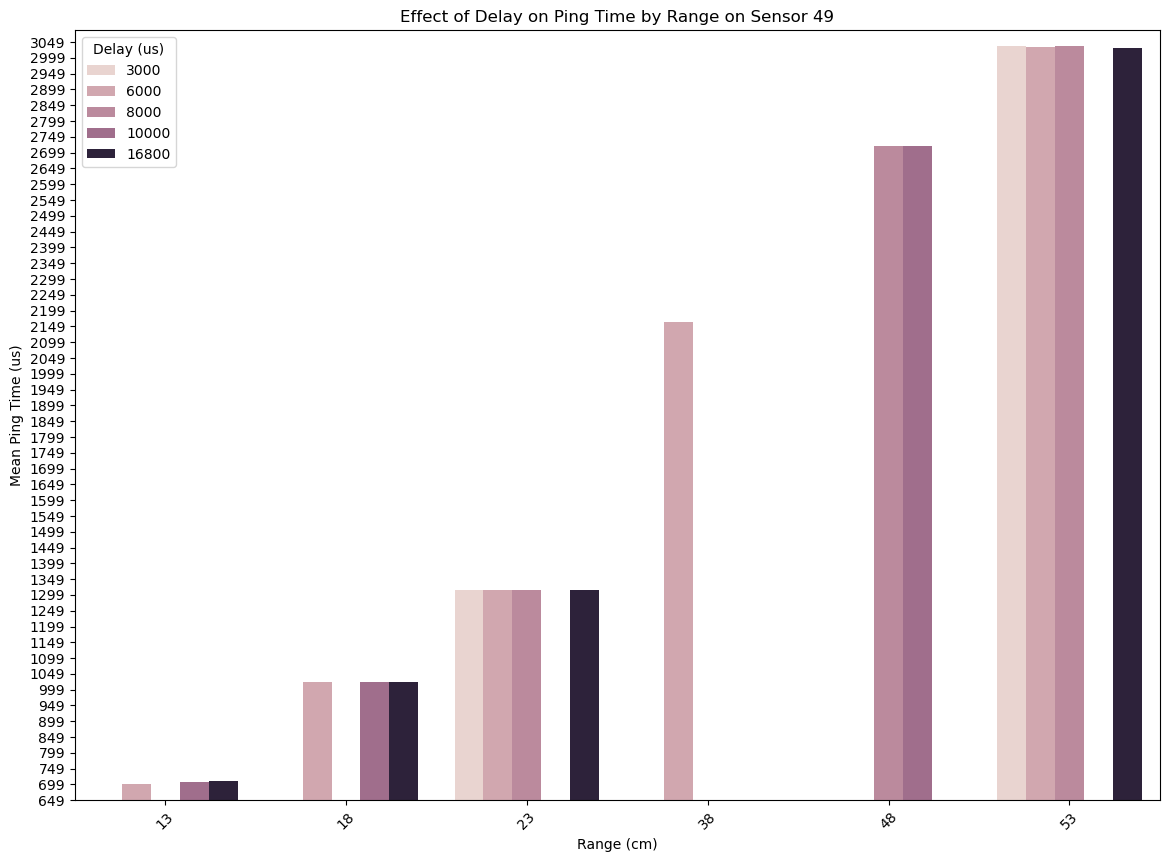

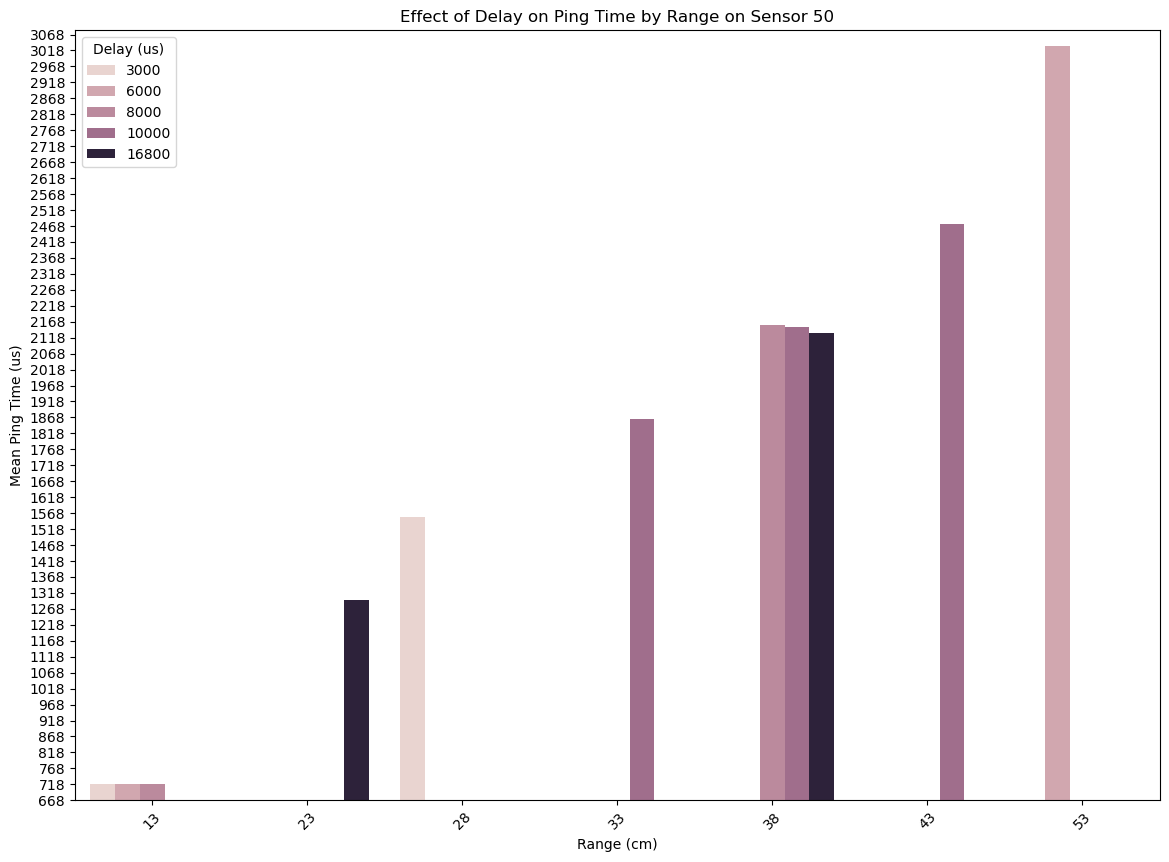

In [48]:
visualize_effect_on_ping_time_sensors(df_outliers_lower)

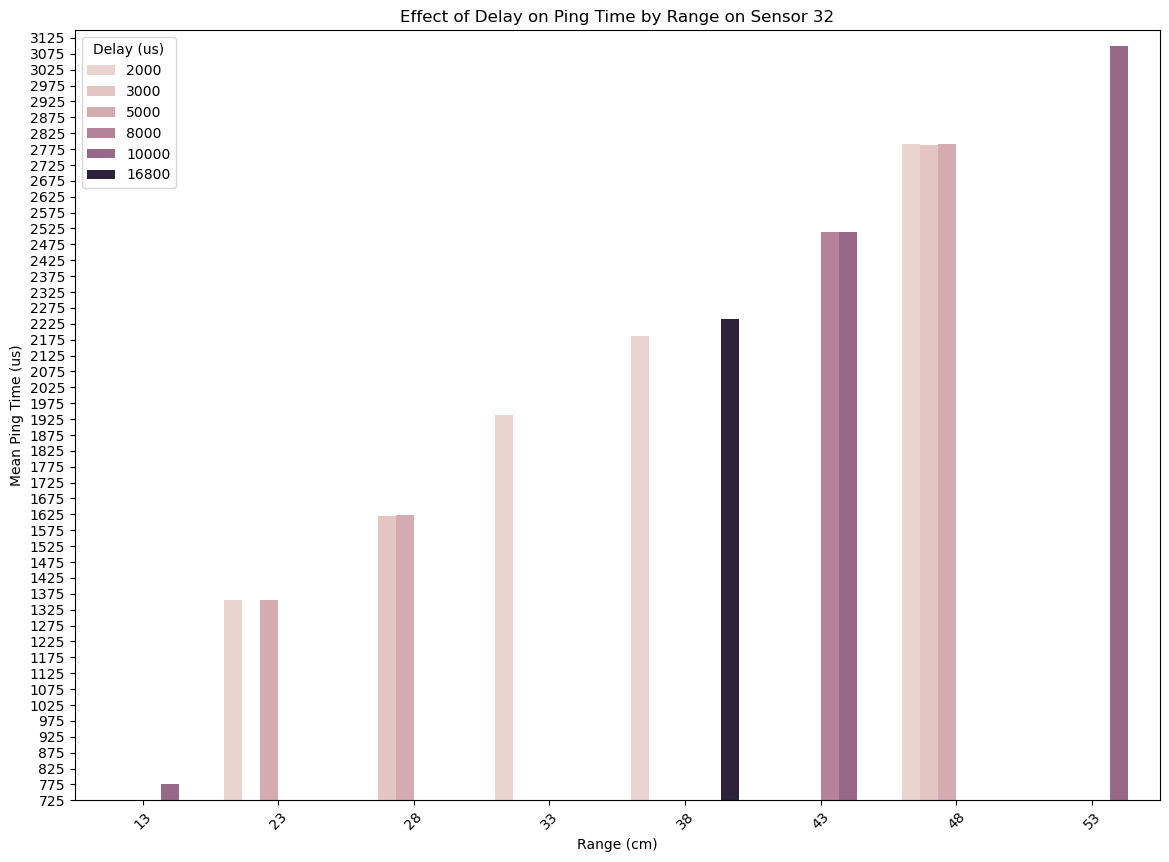

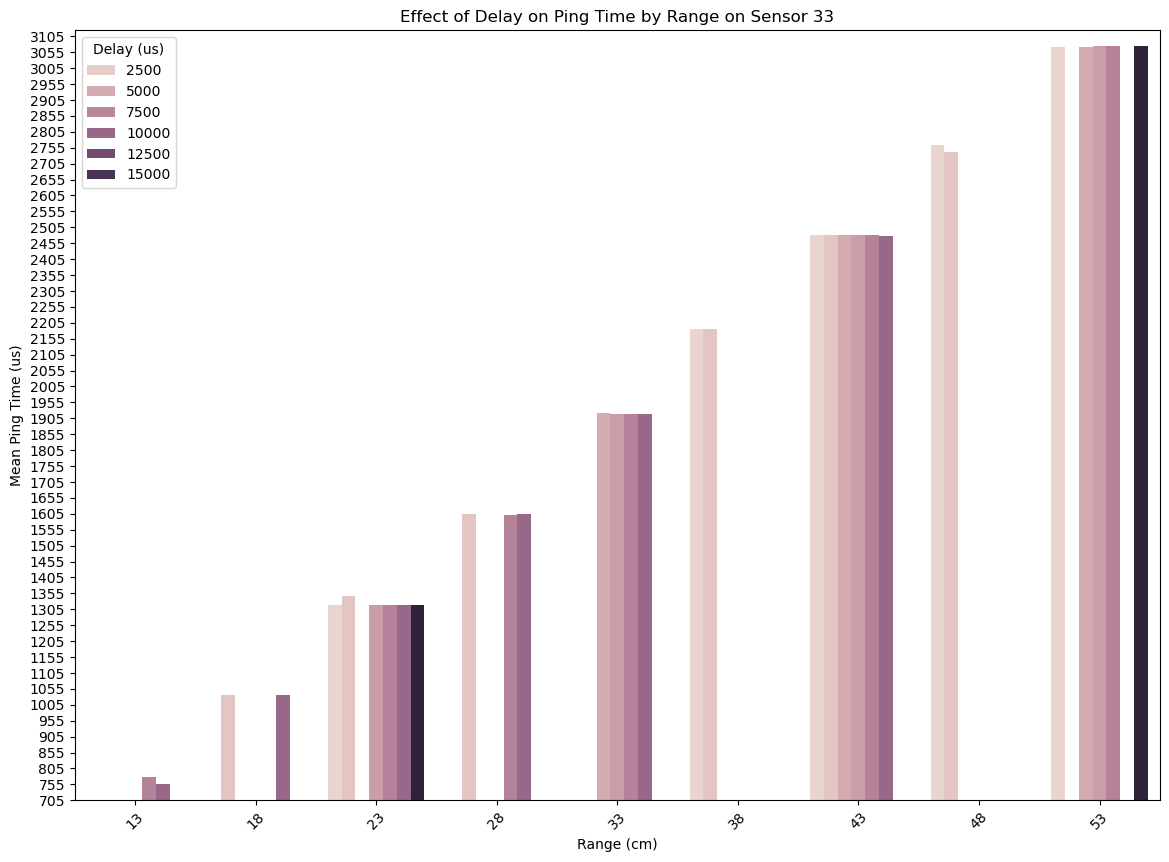

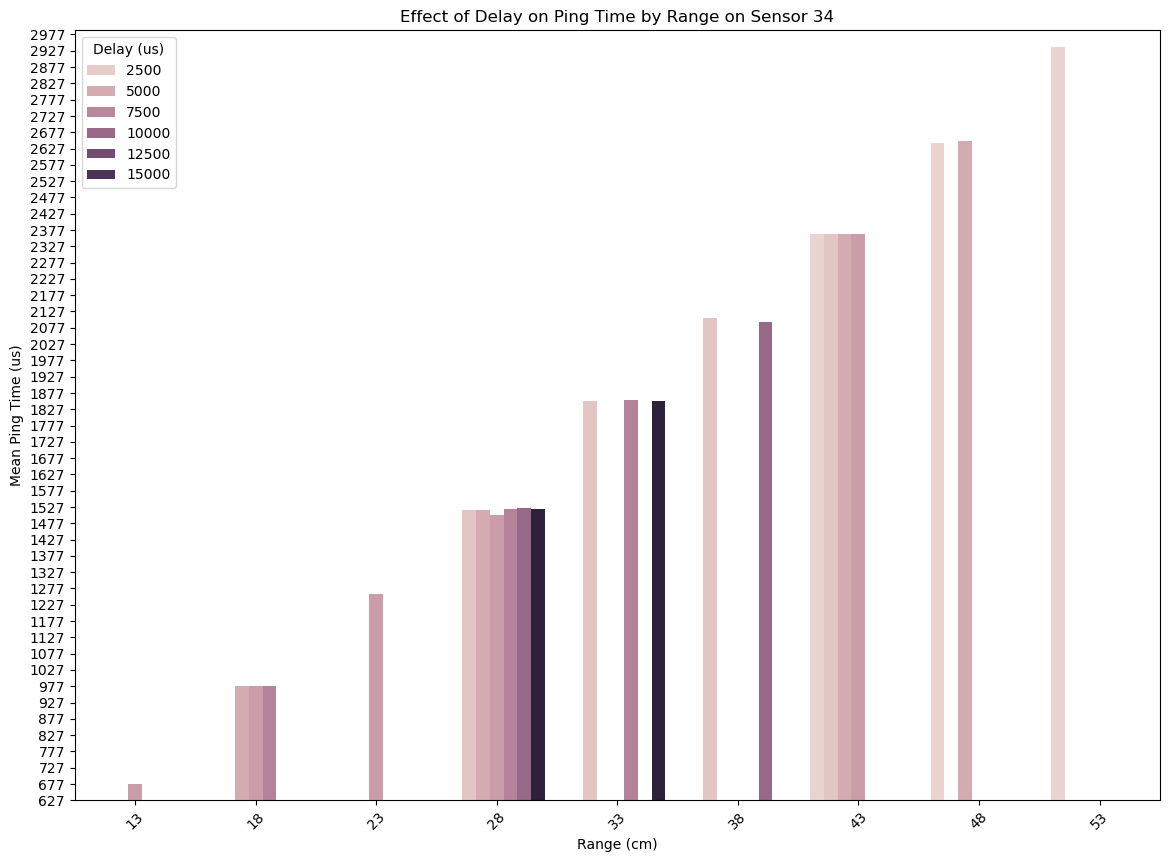

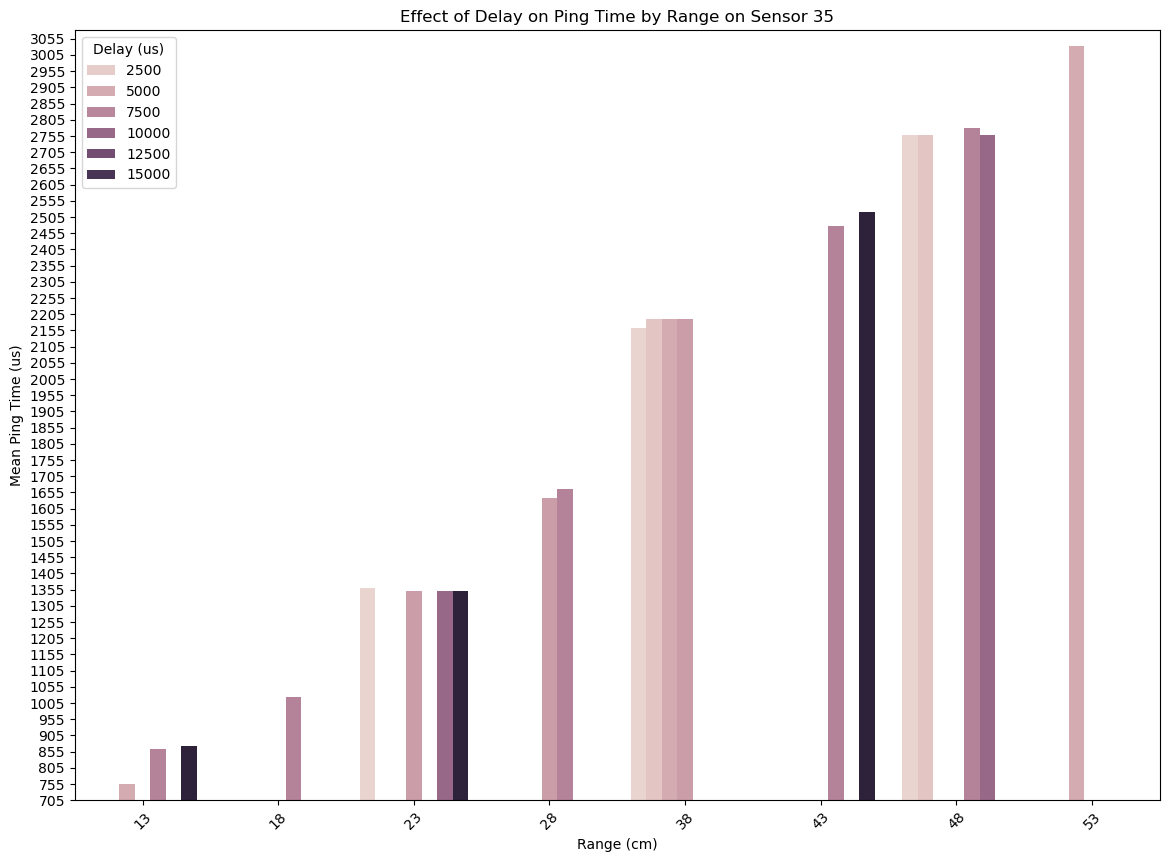

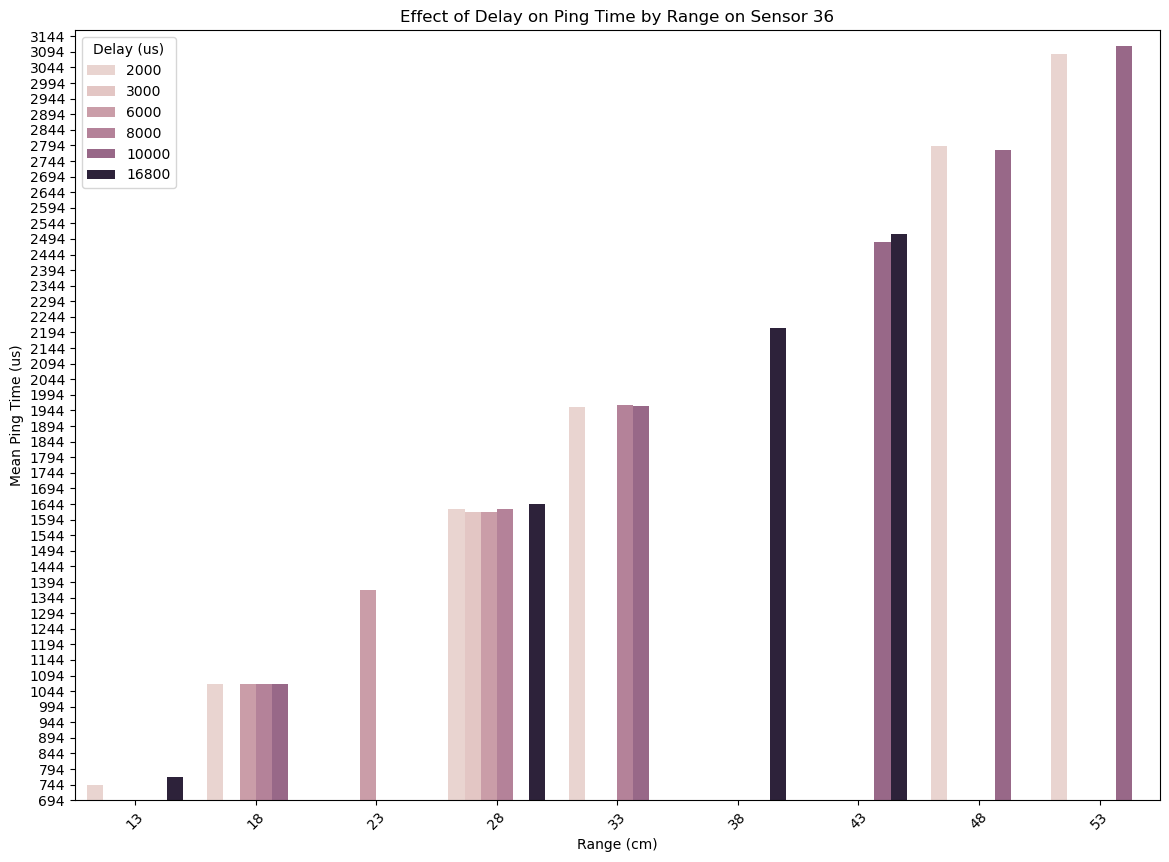

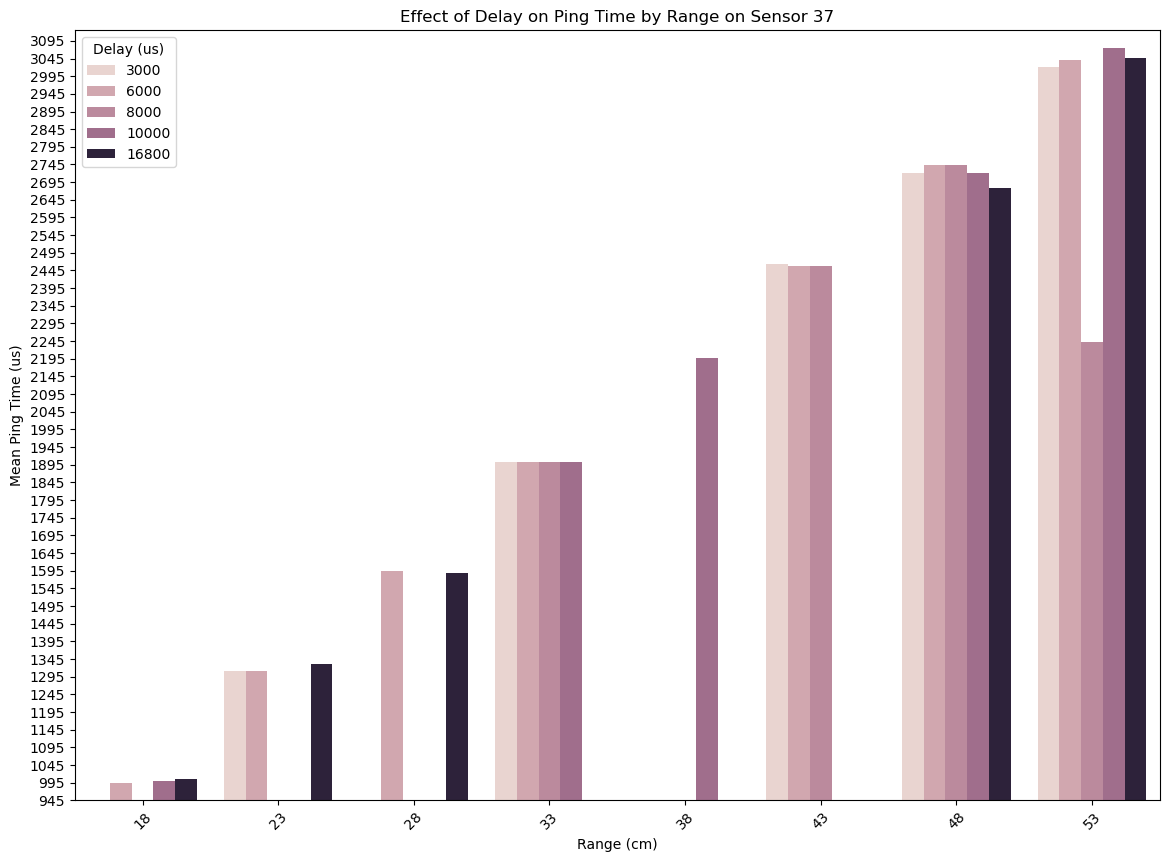

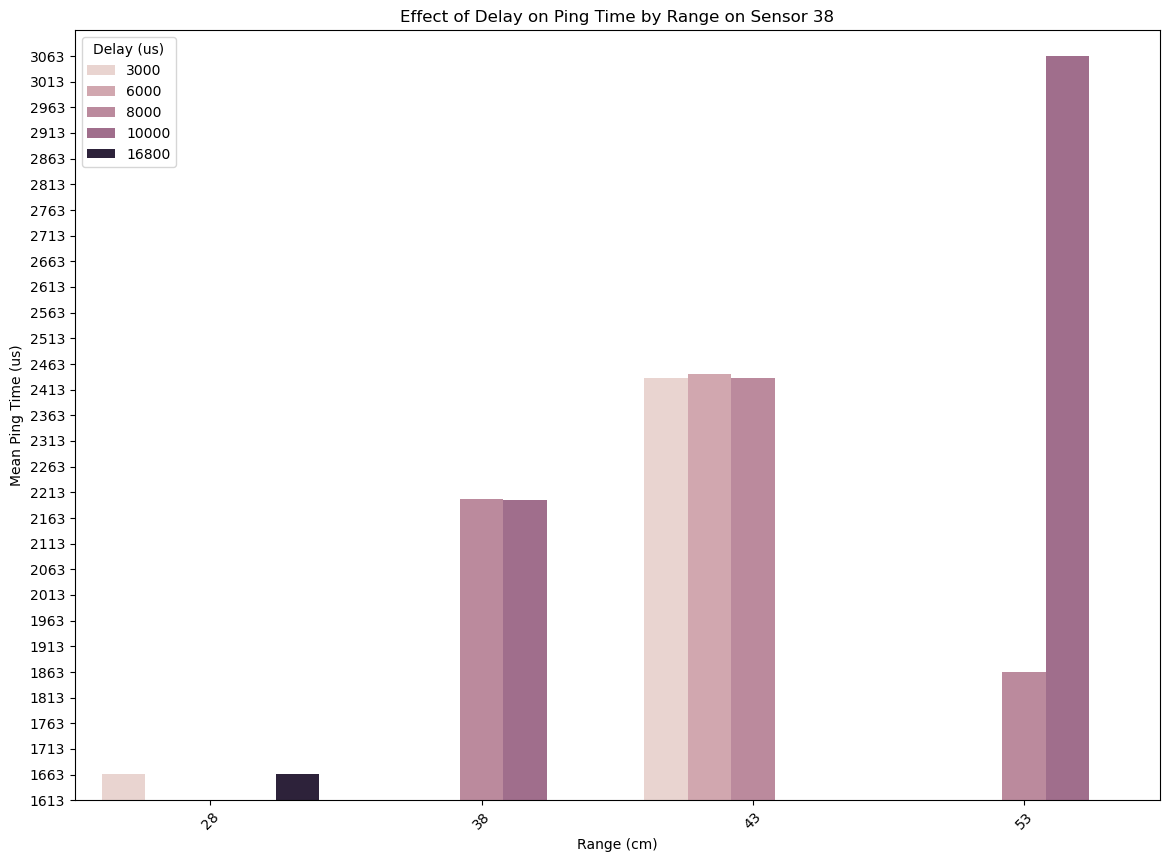

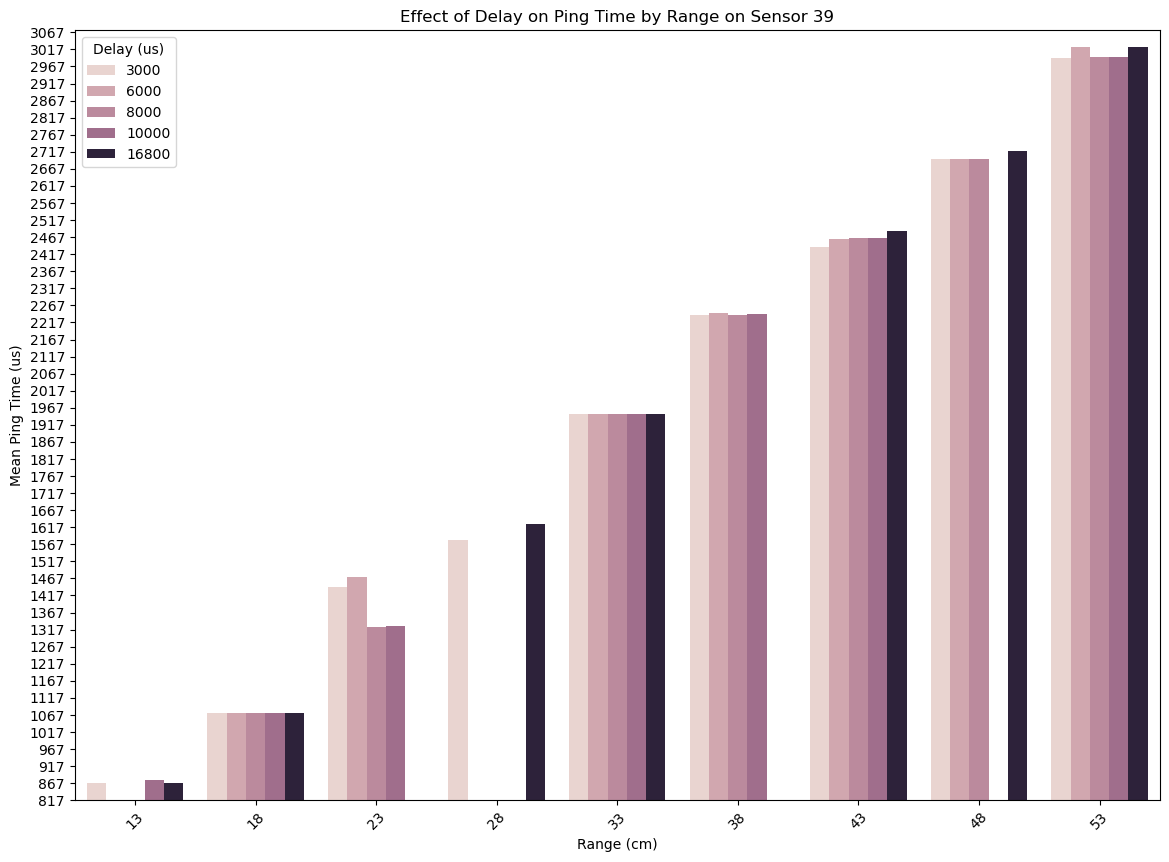

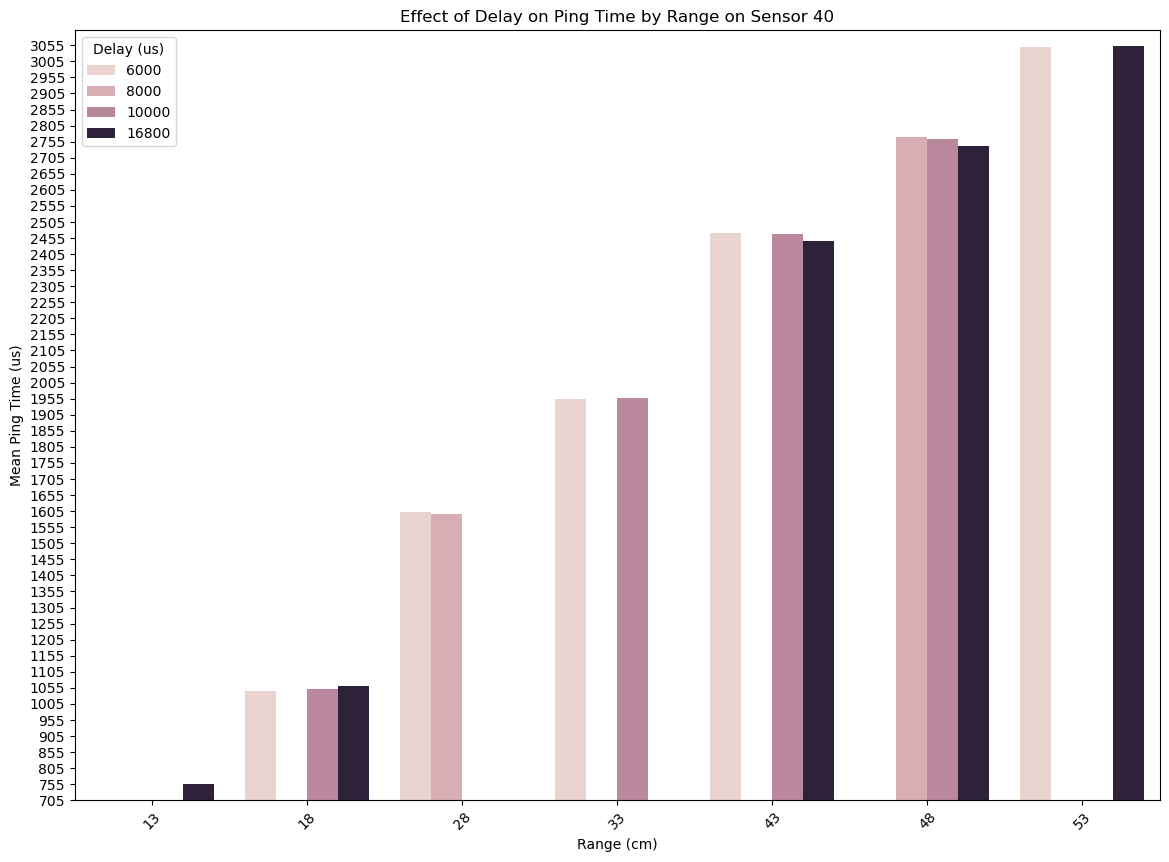

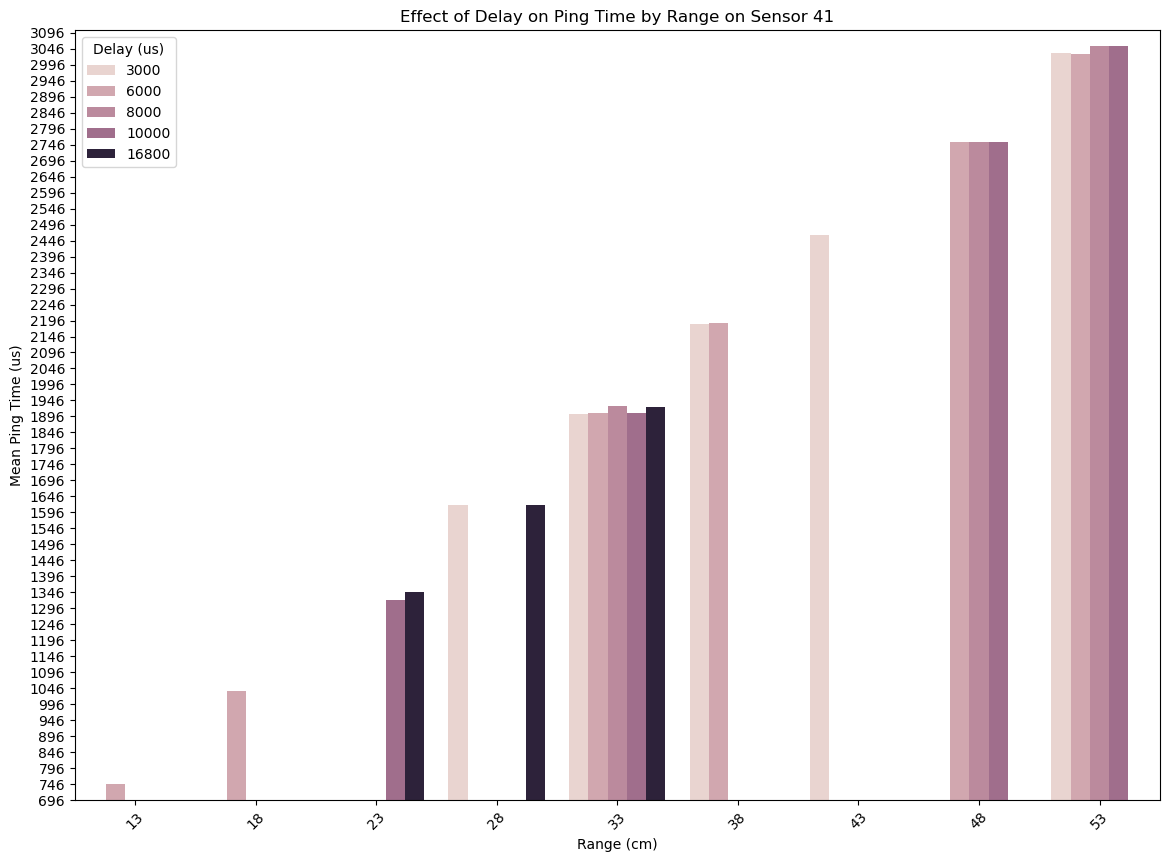

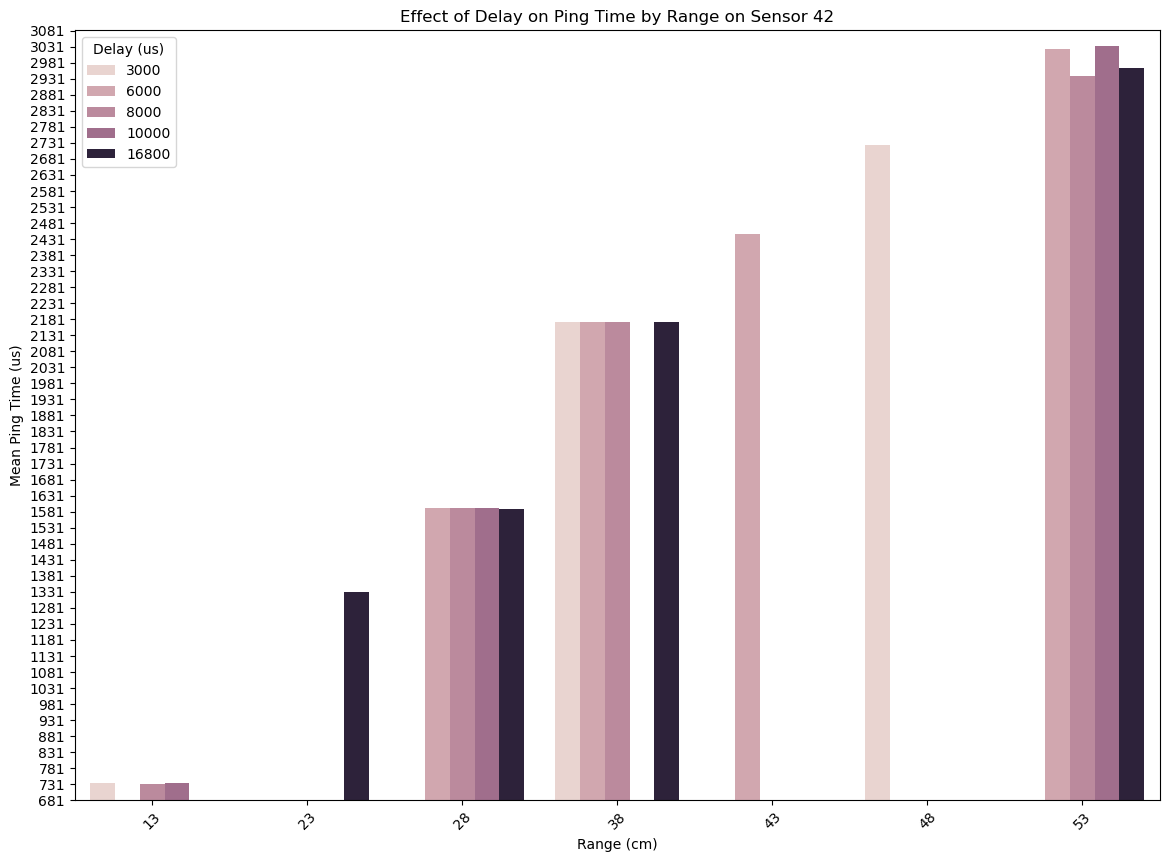

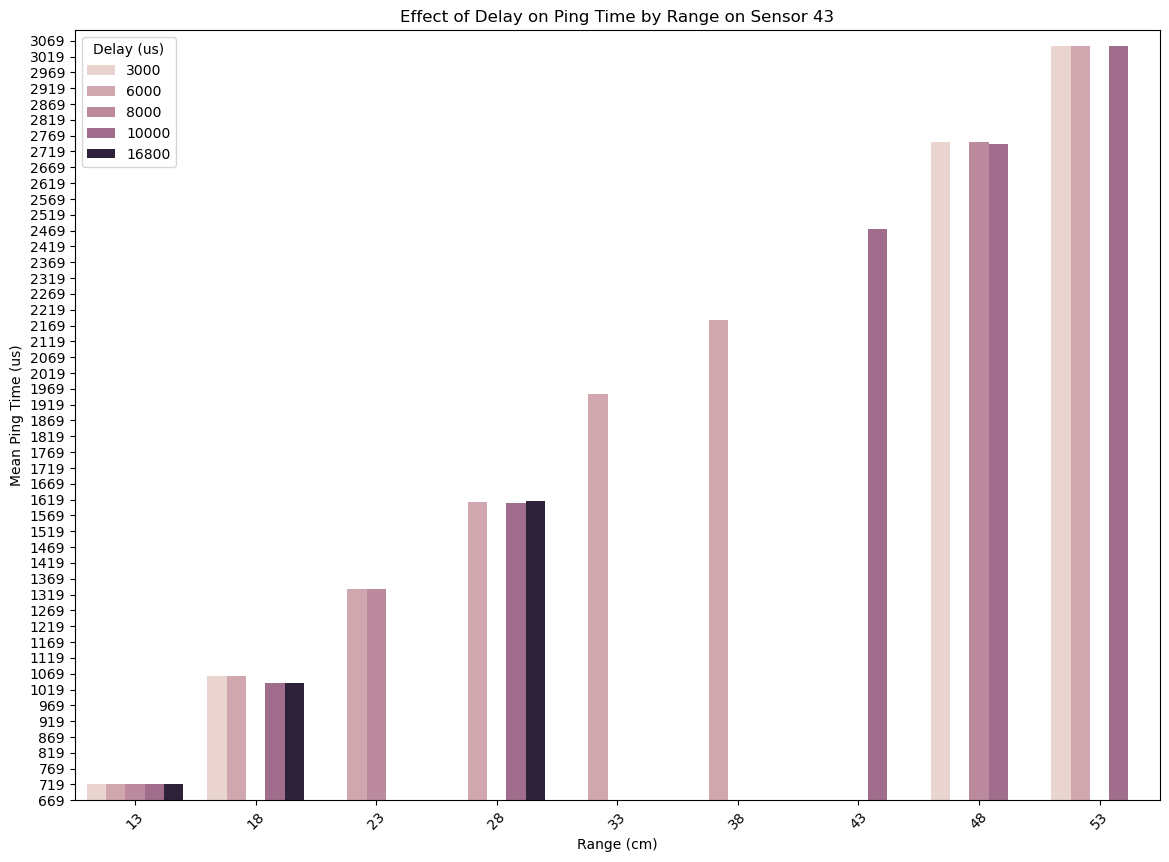

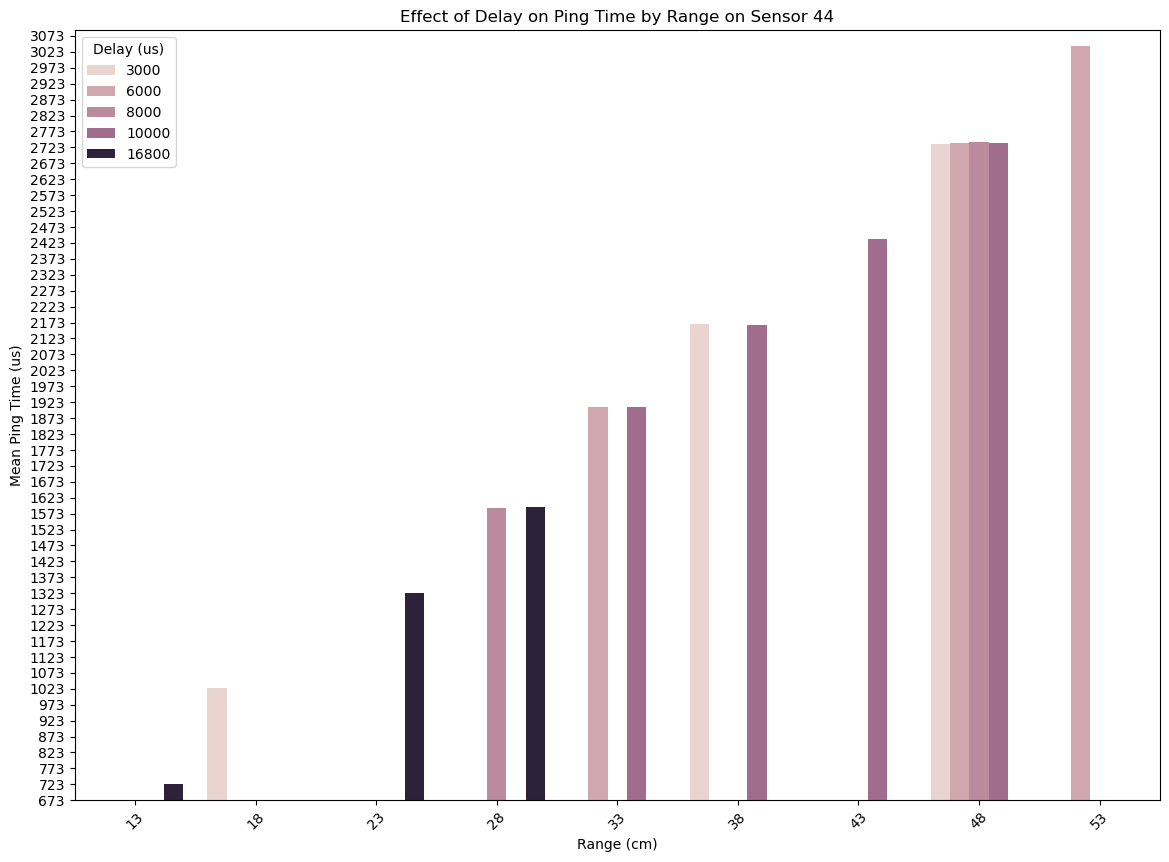

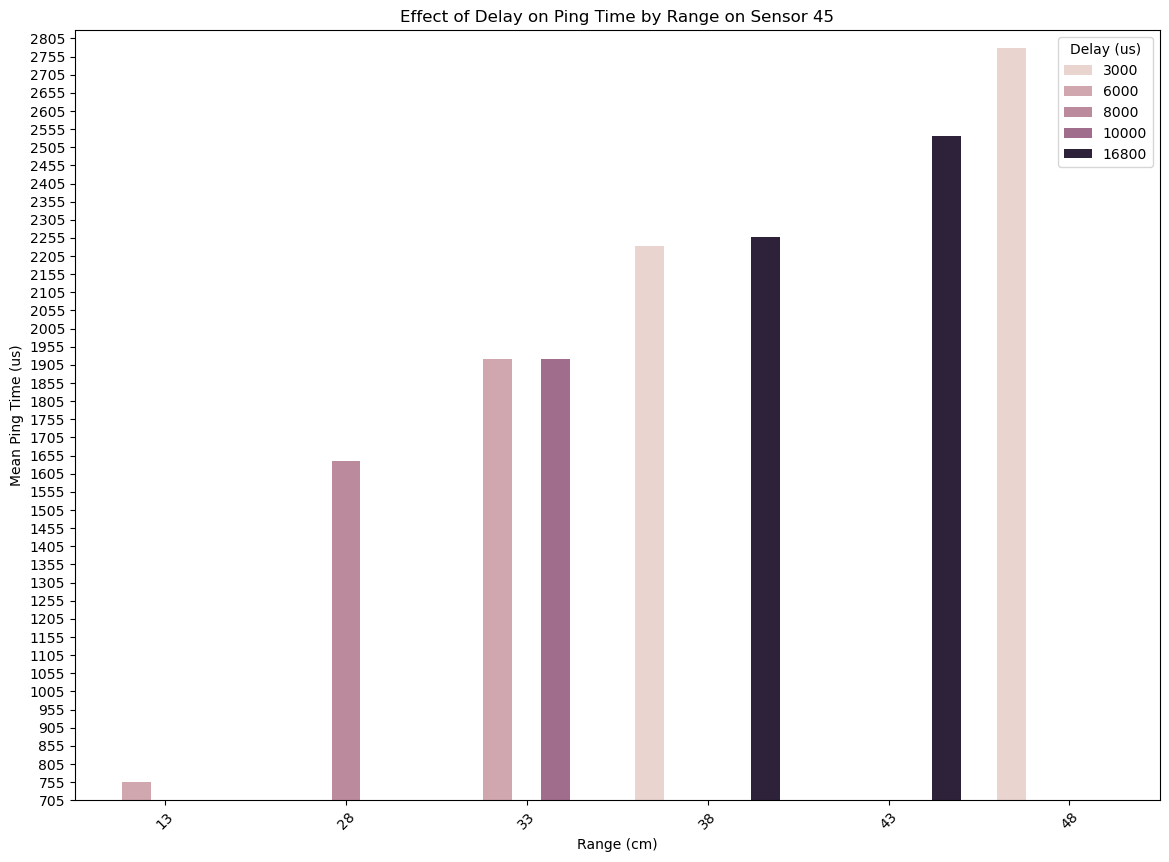

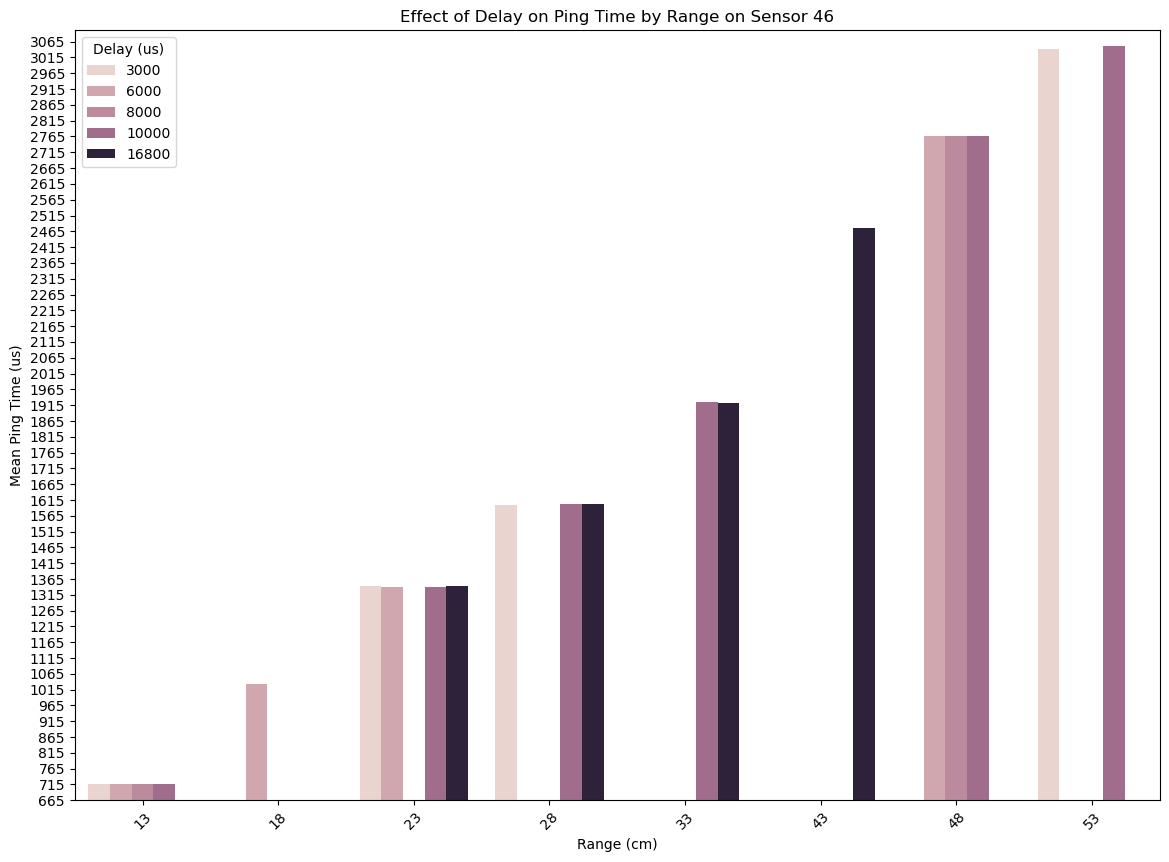

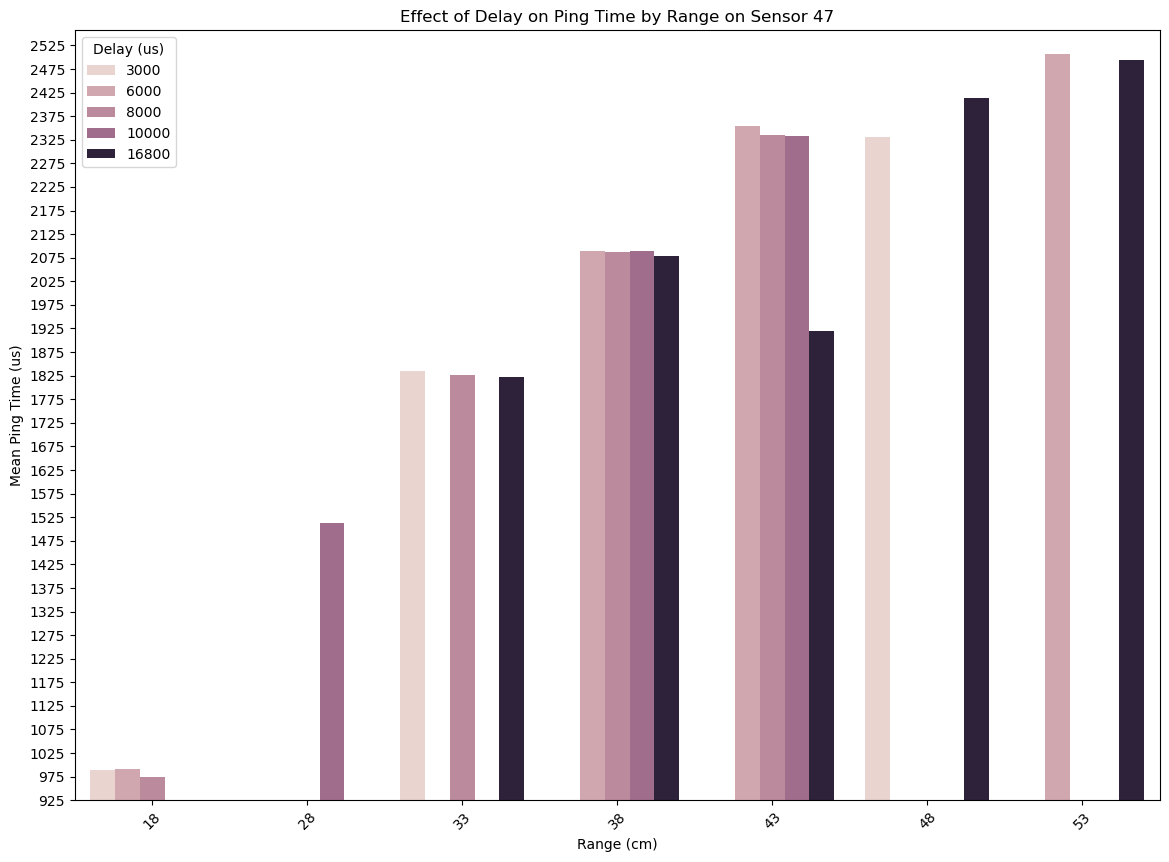

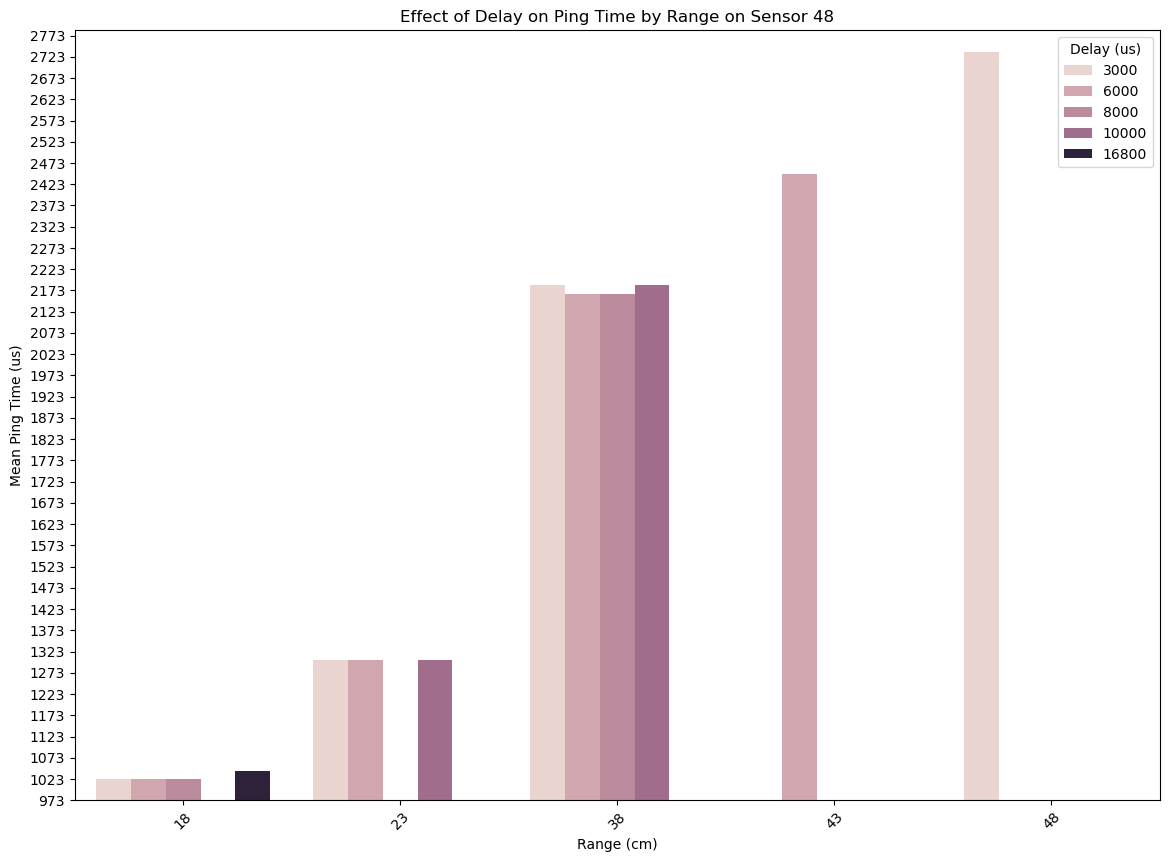

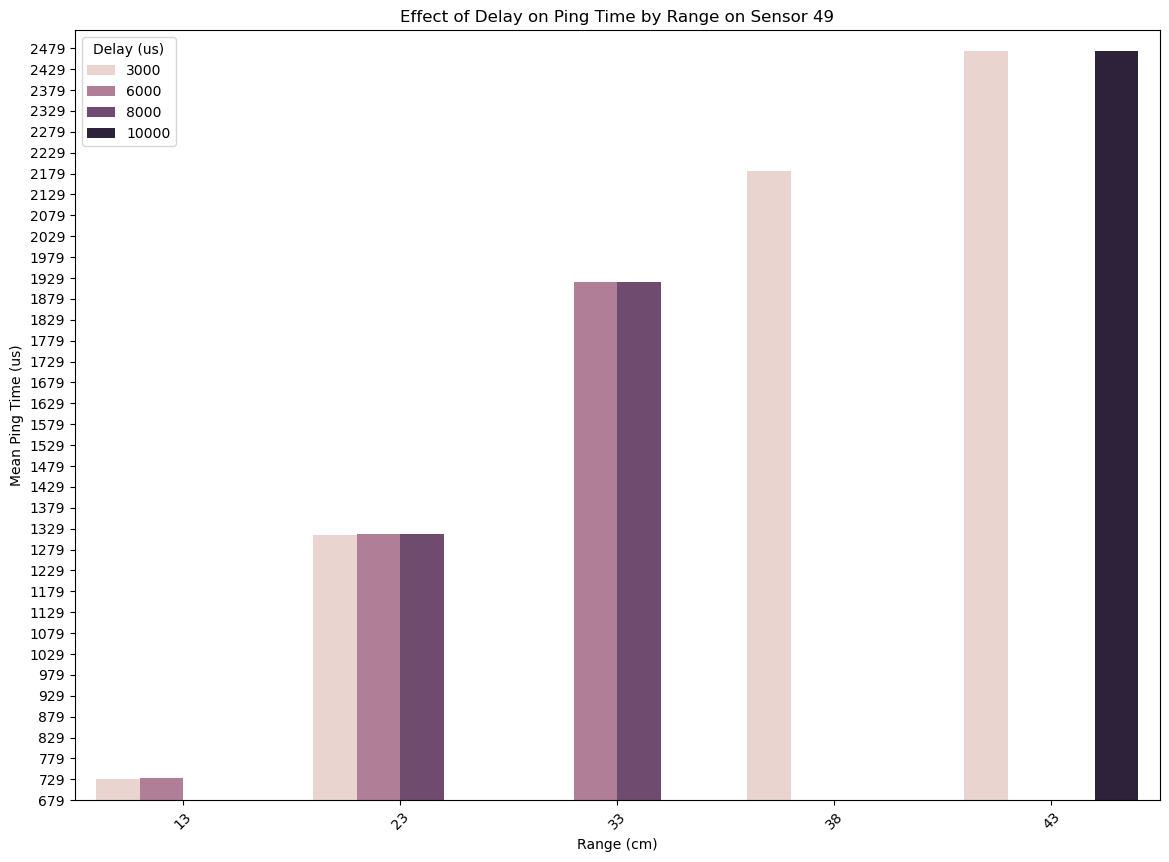

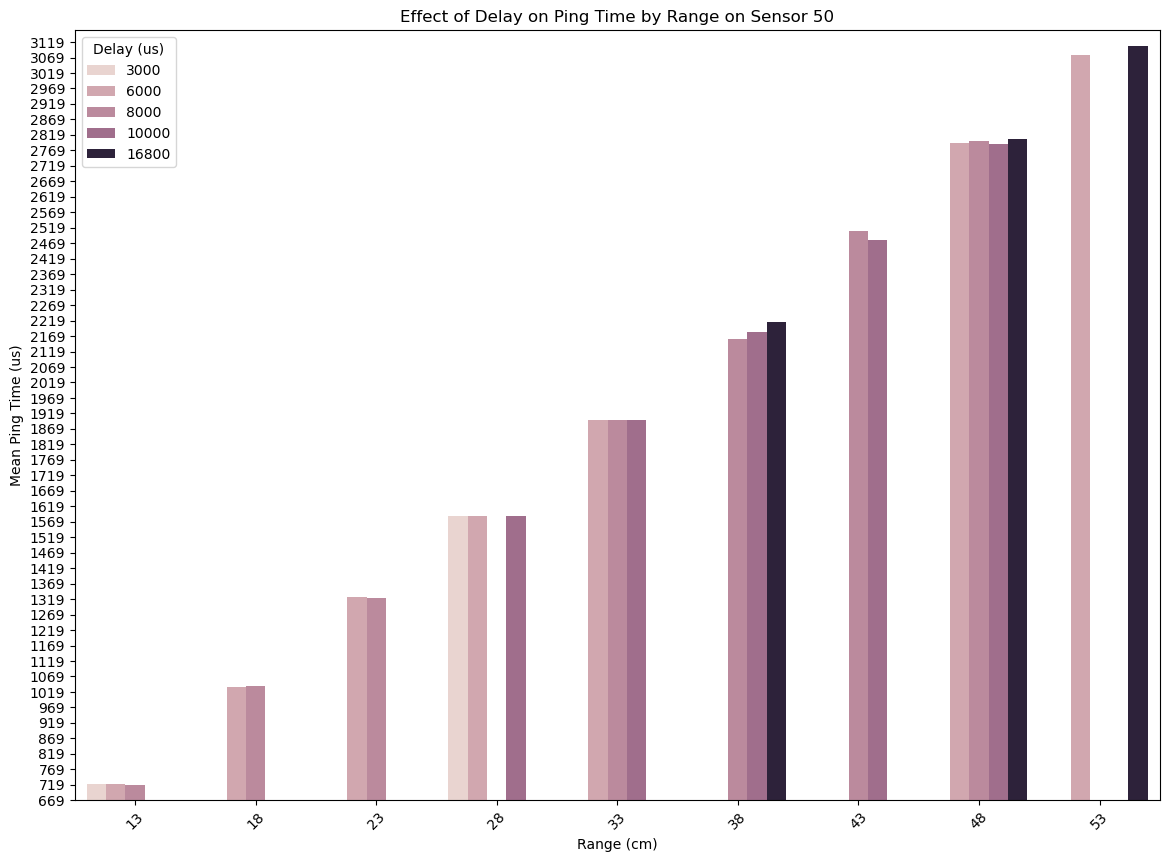

In [49]:
visualize_effect_on_ping_time_sensors(df_outliers_upper)

It does have some different patterns for each sensors this info might also be considered to be used later for characterization.

another thing that are noticable is the frequency and next we will be investigating on frequency

In [156]:
visualize_lineplot_ping_time_with_variability(df_outliers_lower)

In [157]:
visualize_lineplot_ping_time_with_variability(df_outliers_upper)

Some may start from certain range and even they don't have the line at all. Also this shows more variability within the data which characteristics. 

#### Investigate Frequency on lower and upper bound

In [158]:
df_outliers_lower.groupby(['Sensor ID', 'Delay (us)'])['Ping Time (us)'].count()

Sensor ID  Delay (us)
32         3000          78
           6000           5
           8000          39
           10000         25
           16800         10
                         ..
50         3000          39
           6000          49
           8000          86
           10000         42
           16800          9
Name: Ping Time (us), Length: 94, dtype: int64

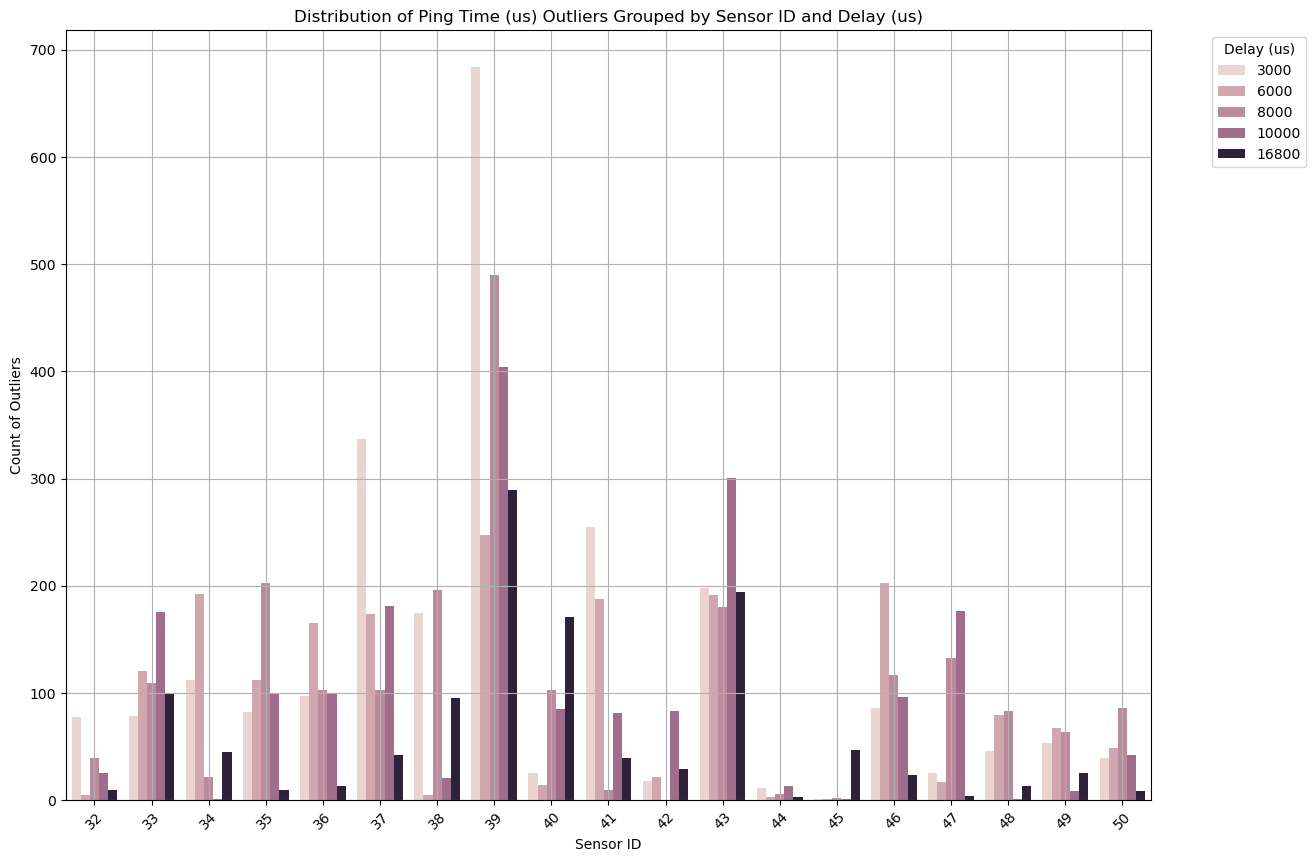

In [160]:
# Group the outliers by 'Sensor ID' and 'Delay (us)'
grouped_outliers = df_outliers_lower.groupby(['Sensor ID', 'Delay (us)'])['Ping Time (us)'].count().reset_index()

# Plot the distribution of outliers
plt.figure(figsize=(14, 10))
sns.barplot(
    x='Sensor ID', 
    y='Ping Time (us)', 
    hue='Delay (us)', 
    data=grouped_outliers
)
plt.title('Distribution of Ping Time (us) Outliers Grouped by Sensor ID and Delay (us)')
plt.xlabel('Sensor ID')
plt.ylabel('Count of Outliers')
plt.legend(title='Delay (us)', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.grid(True)
plt.xticks(rotation=45)
plt.show()

In [161]:
df_outliers_upper.groupby(['Sensor ID', 'Delay (us)'])['Ping Time (us)'].count()

Sensor ID  Delay (us)
32         3000          106
           8000            9
           10000           8
           16800           1
33         3000          110
                        ... 
50         3000           52
           6000           82
           8000          115
           10000          60
           16800           4
Name: Ping Time (us), Length: 92, dtype: int64

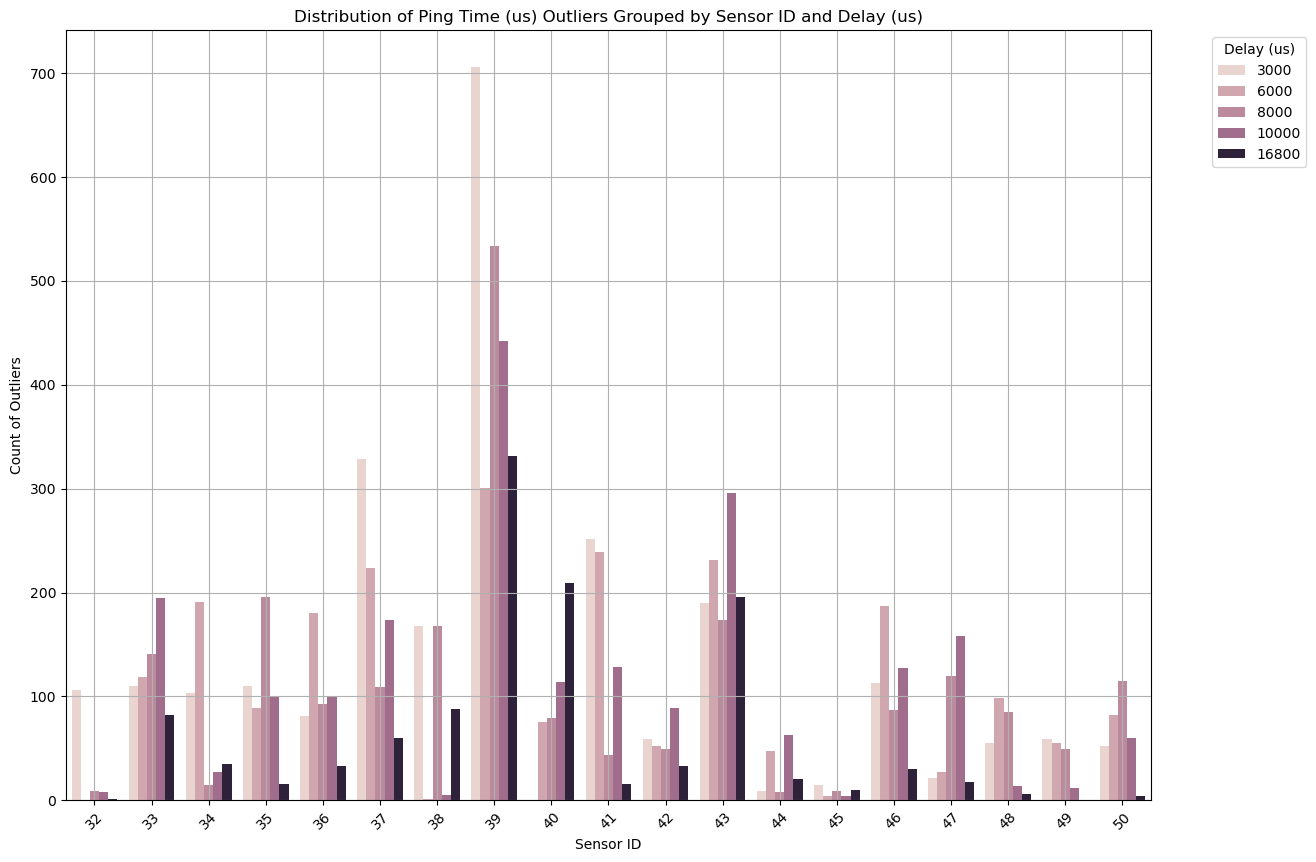

In [162]:
# Group the outliers by 'Sensor ID' and 'Delay (us)'
grouped_upper_outliers = df_outliers_upper.groupby(['Sensor ID', 'Delay (us)'])['Ping Time (us)'].count().reset_index()

# Plot the distribution of outliers
plt.figure(figsize=(14, 10))
sns.barplot(
    x='Sensor ID', 
    y='Ping Time (us)', 
    hue='Delay (us)', 
    data=grouped_upper_outliers
)
plt.title('Distribution of Ping Time (us) Outliers Grouped by Sensor ID and Delay (us)')
plt.xlabel('Sensor ID')
plt.ylabel('Count of Outliers')
plt.legend(title='Delay (us)', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.grid(True)
plt.xticks(rotation=45)
plt.show()

## Further ideas

Ideas for feature engineering:
- new features related to IQR methods: range_delay_middle, range_delay_lower,range_delay_upper
- Another features which is a product of IQR method: lower_delay_freq and upper_delay_freq 

Ideas for characterization:
- Do feature importance to find out which features are important features like L1... but theres no target. 
- Use anamoly detection without labels -> we can use clustering methods